<a href="https://colab.research.google.com/github/albertometelli/rl-phd-2020/01_intro_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym environments


## Introduction

In this notebook, you will learn how to use Gym environments and how to create your own environment following the OpenAI Gym interface. Once it is done, you can easily use any compatible (depending on the action space) RL algorithm from Stable Baselines on that environment.

## Install Dependencies and Stable Baselines3 Using Pip

In [60]:
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.4.0-py3-none-any.whl (176 kB)
Note: you may need to restart the kernel to use updated packages.


## Initializing Environments

Initializing environments in Gym and is done as follows:

In [1]:
import gym
env = gym.make('CartPole-v1')

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole environment: [https://gym.openai.com/envs/CartPole-v1/](https://gym.openai.com/envs/CartPole-v1/)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)

## Interacting with the Environment

We run an instance of `CartPole-v1` environment for 1000 timesteps, rendering the environment at each step.

In [4]:
env.reset()
for _ in range(100): 
    env.render()  # by default `mode="human"`(GUI), you can pass `mode="rgb_array"` to retrieve an image instead
    env.step(env.action_space.sample())  # take a random action
    
env.close()

A Gym environment provides to this user mainly three methods:

* `reset()`: resets the environment to its initial state $S_0 \sim d_0$ and returns the observation corresponding to the initial state.


* `step(action)`: takes an action $A_t$ as an input and executes the action in current state $S_t$ of the environment. This method returns a tuple of four values:

    * `observation` (object): an environment-specific object representation of your observation of the environment after the action is executed. It corresponds to the observation of the next state $S_{t+1} \sim p(\cdot|S_t,A_t)$
    
    * `reward` (float): immediate reward $R_{t+1} = r(S_t,A_t)$ obtained by executing action $A_t$ in state $S_t$
    
    * `done`(boolean): whether the reached next state $S_{t+1}$ is a terminal state.
    
    * `info` (dict): additional information useful for debugging and environment-specific.
    
    
*  `render(method='human')`: allows visualizing the agent in action. Note that graphical interface does not work on google colab, so we cannot use it directly (we have to rely on `method='rbg_array'` to retrieve an image of the scene)


*  `seed()`: sets the seed for this environment’s random number generator.

## Observation and Action Spaces

*  `observation_space`: this attribute provides the format of valid observations $\mathcal{S}$. It is of datatype `Space` provided by Gym. For example, if the observation space is of type `Box` and the shape of the object is `(4,)`, this denotes a valid observation will be an array of 4 numbers.

*  `action_space`: this attribute provides the format of valid actions $\mathcal{A}$. It is of datatype `Space` provided by Gym. For example, if the action space is of type `Discrete` and gives the value `Discrete(2)`, this means there are two valid discrete actions: 0 and 1.

In [5]:
print(env.observation_space)

print(env.action_space)

print(env.observation_space.high)

print(env.observation_space.low)

Box(4,)
Discrete(2)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


`Spaces` types available in Gym:

*  `Box`: an $n$-dimensional compact space (i.e., a compact subset of $\mathbb{R}^n$). The bounds of the space are contained in the `high` and `low` attributes.


*  `Discrete`: a discrete space made of $n$ elements, where $\{0,1,\dots,n-1\}$ are the possible values.


Other `Spaces` types can be used: `Dict`, `Tuple`, `MultiBinary`, `MultiDiscrete`.

In [6]:
import numpy as np

from gym.spaces import Box, Discrete, Dict, Tuple, MultiBinary, MultiDiscrete

observation_space = Box(low=-1.0, high=2.0, shape=(3,), dtype=np.float32)
print(observation_space.sample())

observation_space = Discrete(4)
print(observation_space.sample())

[ 1.3272852   1.2371271  -0.80900514]
1


## Details on the Cartpole Environment 

From [[source]](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

### Action Space
The action space is `action` in $\{0,1\}$, where `action` is used to push the cart with a fixed amount of force:

 | Num | Action                 |
    |-----|------------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |
    
Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it.
    
### Observation Space
The observation is a `ndarray` with shape `(4,)` where the elements correspond to the following:

   | Num | Observation           | Min                  | Max                |
    |-----|-----------------------|----------------------|--------------------|
    | 0   | Cart Position         | -4.8*                | 4.8*                |
    | 1   | Cart Velocity         | -Inf                 | Inf                |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°)**| ~ 0.418 rad (24°)** |
    | 3   | Pole Angular Velocity | -Inf                 | Inf                |

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

**Note:** above denotes the ranges of possible observations for each element, but in two cases this range exceeds the range of possible values in an un-terminated episode:
- `*`: the cart x-position can be observed between `(-4.8, 4.8)`, but an episode terminates if the cart leaves the `(-2.4, 2.4)` range.
- `**`: Similarly, the pole angle can be observed between  `(-.418, .418)` radians or precisely **±24°**, but an episode is  terminated if the pole angle is outside the `(-.2095, .2095)` range or precisely **±12°**
    
### Rewards
Reward is 1 for every step taken, including the termination step. The threshold is 475 for v1.

### Starting State
All observations are assigned a uniform random value between (-0.05, 0.05)

### Episode Termination
The episode terminates of one of the following occurs:
1. Pole Angle is more than ±12°
2. Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 500 (200 for v0)


## Evaluation of some Simple Policies

We now evaluate some policies on the cartpole.

* **Uniform Policy**: uniformly random policy

$$
\pi(a|s) = \mathrm{Uni}(\{0,1\})
$$

* **Reactive Policy**: simple deterministic policy that selects the action based on the pole angle

$$
\pi(s) = \begin{cases}
                0 & \text{if Pole Angle } \le 0 \\
                1 & \text{otherwise}
            \end{cases}
$$

To be used in stable-baselines3 they should comply with [BasePolicy](https://github.com/DLR-RM/stable-baselines3/blob/master/stable_baselines3/common/policies.py)

In [49]:
from stable_baselines3.common.policies import BasePolicy


class UniformPolicy(BasePolicy):
    
    def predict(self, obs):
        return np.random.randint(0, 2), obs
    
    def _predict(self, *args, **kwargs):
        pass
    
    def forward(self, *args, **kwargs):
        pass


class ReactivePolicy(BasePolicy):
    
    def predict(self, obs):
        if obs[2] <= 0:
            return 0, obs
        else:
            return 1, obs
        
    def _predict(self, *args, **kwargs):
        pass
    
    def forward(self, *args, **kwargs):
        pass

In [64]:
def evaluate(env, policy, gamma=1., num_episodes=100, render=0):
    """
    Evaluate a RL agent
    :param env: (Env object) the Gym environment
    :param policy: (BasePolicy object) the policy in stable_baselines3
    :param gamma: (float) the discount factor
    :param num_episodes: (int) number of episodes to evaluate it
    :param render: (int) number of episodes to be rendered
    :return: (float) Mean reward for the last num_episodes
    """
    discounter = 1.
    all_episode_rewards = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            if i < render:
                env.render()
            action, _ = policy.predict(obs)
            obs, reward, done, info = env.step(action)
            episode_rewards.append(reward * discounter)
            discounter *= gamma

        all_episode_rewards.append(sum(episode_rewards))
    env.close()

    mean_episode_reward = np.mean(all_episode_rewards)
    std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)
    print("Mean reward:", mean_episode_reward, 
          "Std reward:", std_episode_reward,
          "Num episodes:", num_episodes)

    return mean_episode_reward, std_episode_reward

Let us test the uniform policy.

In [65]:
uniform_policy = UniformPolicy(env.observation_space, 
                               env.action_space)

uniform_policy_mean, uniform_policy_std = evaluate(env, uniform_policy, render=10)

Mean reward: 22.74 Std reward: 1.0755895728822074 Num episodes: 100


Let us test the reactive policy.

In [66]:
reactive_policy = ReactivePolicy(env.observation_space, 
                                 env.action_space)

reactive_policy_mean, reactive_policy_std = evaluate(env, reactive_policy, render=10)

Mean reward: 43.03 Std reward: 1.03 Num episodes: 100


## Train some RL Algorithms

We now use stable-baselines3 to train some simple algorithms. We start by using [Proximal Policy Optimization](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

We use MlpPolicy that is an alias of [ActorCriticPolicy](https://github.com/DLR-RM/stable-baselines3/blob/master/stable_baselines3/common/policies.py) 

In [74]:
# Instantiate the algorithm with 32x32 NN approximator for both actor and critic
ppo_mlp = PPO("MlpPolicy", env, verbose=1, 
                learning_rate=0.01,
                policy_kwargs=dict(net_arch = [dict(pi=[32, 32], vf=[32, 32])]))

print(ppo_mlp.policy)

# Instantiate the algorithm with linear approximator for both actor and critic
ppo_linear = PPO("MlpPolicy", env, verbose=1, 
                   learning_rate=0.01,
                   policy_kwargs=dict(net_arch = [dict(pi=[], vf=[])]))

print(ppo_linear.policy)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=32, out_features=2, bias=True)
  (value_net): Linear(in_features=32, out_features=1, bias=True)
)
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)


In [63]:
from stable_baselines3.common.callbacks import EvalCallback


# Build a callback to log the reuslts
eval_callback_mlp = EvalCallback(env, log_path='./logs/results/ppo_mlp', eval_freq=2048, verbose=False)
eval_callback_linear = EvalCallback(env, log_path='./logs/results/ppo_linear', eval_freq=2048, verbose=False)

# Train the agent for 30000 steps
ppo_mlp.learn(total_timesteps=30000, callback=eval_callback_mlp)
ppo_linear.learn(total_timesteps=30000, callback=eval_callback_linear)

---------------------------------
| eval/              |          |
|    mean_ep_length  | 500      |
|    mean_reward     | 500      |
| time/              |          |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 500      |
| time/              |          |
|    fps             | 556      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 500         |
|    mean_reward          | 500         |
| time/                   |             |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010921036 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
| 

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 500         |
|    mean_reward          | 500         |
| time/                   |             |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.016842753 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.328      |
|    explained_variance   | -0.396      |
|    learning_rate        | 0.01        |
|    loss                 | -0.0215     |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.003      |
|    value_loss           | 6.54e-06    |
-----------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 511      |
|    ep_rew_mean     | 511      |
| time/              |          |
|    fps             | 493      |
|    iterations      | 9        |
|    t

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 214          |
|    mean_reward          | 214          |
| time/                   |              |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062397975 |
|    clip_fraction        | 0.0306       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.567       |
|    explained_variance   | -0.912       |
|    learning_rate        | 0.01         |
|    loss                 | 188          |
|    n_updates            | 610          |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 409          |
------------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 212      |
|    ep_rew_mean     | 212      |
| time/              |          |
|    fps             | 1156     |
|    iterations      |

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 184      |
|    ep_rew_mean     | 184      |
| time/              |          |
|    fps             | 1007     |
|    iterations      | 9        |
|    time_elapsed    | 18       |
|    total_timesteps | 18432    |
---------------------------------
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 220         |
|    mean_reward          | 220         |
| time/                   |             |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.007736886 |
|    clip_fraction        | 0.0797      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.538      |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.01        |
|    loss                 | 0.954       |
|    n_updates            | 690         |
|    policy_gradient_loss | -0

In [68]:
# Evaluate the trained models
ppo_mlp_mean, ppo_mlp_std = evaluate(env, ppo_mlp, render=1)
ppo_linear_mean, ppo_linear_std = evaluate(env, ppo_linear, render=1)

Mean reward: 500.0 Std reward: 0.0 Num episodes: 100
Mean reward: 182.5 Std reward: 3.4226370599940106 Num episodes: 100


Let us now try [DQN](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html).

In [93]:
from stable_baselines3 import DQN
from torch import nn


# Instantiate the algorithm with 32x32 NN approximator for both actor and critic
dqn_mlp = DQN("MlpPolicy", env, verbose=1, 
                learning_rate=0.01,
                learning_starts=3000,
                policy_kwargs=dict(net_arch = [32, 32], activation_fn=nn.Tanh))

print(dqn_mlp.policy)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
DQNPolicy(
  (q_net): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
)


In [94]:
# Build a callback to log the reuslts
eval_callback_dqn = EvalCallback(env, log_path='./logs/results/dqn', eval_freq=2048, verbose=False)

# Train the agent for 300000 steps
dqn_mlp.learn(total_timesteps=300000, callback=eval_callback_dqn)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5560     |
|    time_elapsed     | 0        |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6205     |
|    time_elapsed     | 0        |
|    total_timesteps  | 178      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 7224     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2058     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 7271     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2118     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.93     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 5609     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3582     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000363 |
|    n_updates        | 145      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 168      |
|    fps              | 5424     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3671     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000887 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.848    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 4058     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4804     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000268 |
|    n_updates        | 450      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.846    |
| time/               |          |
|    episodes         | 228      |
|    fps              | 4011     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4875     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000352 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 288      |
|    fps              | 3384     |
|    time_elapsed     | 1        |
|    total_timesteps  | 6095     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 6.29e-05 |
|    n_updates        | 773      |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 10       |
|    mean_reward      | 10       |
| rollout/            |          |
|    exploration_rate | 0.805    |
| time/               |          |
|    total_timesteps  | 6144     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000333 |
|    n_updates        | 785      |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.767    |
| time/               |          |
|    episodes         | 348      |
|    fps              | 3056     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7365     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000636 |
|    n_updates        | 1091     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes         | 352      |
|    fps              | 3043     |
|    time_elapsed     | 2        |
|    total_timesteps  | 7436     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0016   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.732    |
| time/               |          |
|    episodes         | 408      |
|    fps              | 2812     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8459     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000137 |
|    n_updates        | 1364     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 2807     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8516     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000651 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 18.8     |
|    exploration_rate | 0.693    |
| time/               |          |
|    episodes         | 472      |
|    fps              | 2671     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9681     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00092  |
|    n_updates        | 1670     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.69     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 2659     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9780     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000722 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 2434     |
|    time_elapsed     | 4        |
|    total_timesteps  | 10940    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.029    |
|    n_updates        | 1984     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.652    |
| time/               |          |
|    episodes         | 536      |
|    fps              | 2431     |
|    time_elapsed     | 4        |
|    total_timesteps  | 10998    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00709  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 596      |
|    fps              | 2401     |
|    time_elapsed     | 5        |
|    total_timesteps  | 12052    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00137  |
|    n_updates        | 2262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 600      |
|    fps              | 2395     |
|    time_elapsed     | 5        |
|    total_timesteps  | 12118    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0159   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 656      |
|    fps              | 2362     |
|    time_elapsed     | 5        |
|    total_timesteps  | 13192    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0064   |
|    n_updates        | 2547     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 2360     |
|    time_elapsed     | 5        |
|    total_timesteps  | 13251    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0135   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 720      |
|    fps              | 2328     |
|    time_elapsed     | 6        |
|    total_timesteps  | 14274    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00275  |
|    n_updates        | 2818     |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 9.6      |
|    mean_reward      | 9.6      |
| rollout/            |          |
|    exploration_rate | 0.546    |
| time/               |          |
|    total_timesteps  | 14336    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.017    |
|    n_updates        | 2833     |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.515    |
| time/               |          |
|    episodes         | 784      |
|    fps              | 2299     |
|    time_elapsed     | 6        |
|    total_timesteps  | 15310    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00407  |
|    n_updates        | 3077     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 788      |
|    fps              | 2298     |
|    time_elapsed     | 6        |
|    total_timesteps  | 15381    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00528  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.483    |
| time/               |          |
|    episodes         | 848      |
|    fps              | 2276     |
|    time_elapsed     | 7        |
|    total_timesteps  | 16320    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.006    |
|    n_updates        | 3329     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 852      |
|    fps              | 2275     |
|    time_elapsed     | 7        |
|    total_timesteps  | 16368    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00256  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.45     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 2208     |
|    time_elapsed     | 7        |
|    total_timesteps  | 17358    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00249  |
|    n_updates        | 3589     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.449    |
| time/               |          |
|    episodes         | 912      |
|    fps              | 2207     |
|    time_elapsed     | 7        |
|    total_timesteps  | 17401    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00778  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.418    |
| time/               |          |
|    episodes         | 972      |
|    fps              | 2179     |
|    time_elapsed     | 8        |
|    total_timesteps  | 18383    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00431  |
|    n_updates        | 3845     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.416    |
| time/               |          |
|    episodes         | 976      |
|    fps              | 2178     |
|    time_elapsed     | 8        |
|    total_timesteps  | 18431    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0074   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.384    |
| time/               |          |
|    episodes         | 1036     |
|    fps              | 2147     |
|    time_elapsed     | 9        |
|    total_timesteps  | 19461    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00557  |
|    n_updates        | 4115     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.382    |
| time/               |          |
|    episodes         | 1040     |
|    fps              | 2145     |
|    time_elapsed     | 9        |
|    total_timesteps  | 19517    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0059   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.348    |
| time/               |          |
|    episodes         | 1096     |
|    fps              | 2130     |
|    time_elapsed     | 9        |
|    total_timesteps  | 20575    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0477   |
|    n_updates        | 4393     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.347    |
| time/               |          |
|    episodes         | 1100     |
|    fps              | 2130     |
|    time_elapsed     | 9        |
|    total_timesteps  | 20621    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00172  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 17.8     |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 2113     |
|    time_elapsed     | 10       |
|    total_timesteps  | 21579    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00574  |
|    n_updates        | 4644     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.315    |
| time/               |          |
|    episodes         | 1164     |
|    fps              | 2112     |
|    time_elapsed     | 10       |
|    total_timesteps  | 21631    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00248  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 1220     |
|    fps              | 2080     |
|    time_elapsed     | 11       |
|    total_timesteps  | 23044    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00477  |
|    n_updates        | 5010     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.269    |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 2079     |
|    time_elapsed     | 11       |
|    total_timesteps  | 23097    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00415  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 19.2     |
|    exploration_rate | 0.237    |
| time/               |          |
|    episodes         | 1284     |
|    fps              | 2055     |
|    time_elapsed     | 11       |
|    total_timesteps  | 24080    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00257  |
|    n_updates        | 5269     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 18.8     |
|    exploration_rate | 0.234    |
| time/               |          |
|    episodes         | 1288     |
|    fps              | 2055     |
|    time_elapsed     | 11       |
|    total_timesteps  | 24177    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00136  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.203    |
| time/               |          |
|    episodes         | 1344     |
|    fps              | 2027     |
|    time_elapsed     | 12       |
|    total_timesteps  | 25156    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00281  |
|    n_updates        | 5538     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 17.7     |
|    exploration_rate | 0.201    |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 2027     |
|    time_elapsed     | 12       |
|    total_timesteps  | 25224    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0045   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.17     |
| time/               |          |
|    episodes         | 1408     |
|    fps              | 2012     |
|    time_elapsed     | 13       |
|    total_timesteps  | 26203    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00779  |
|    n_updates        | 5800     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 17.7     |
|    exploration_rate | 0.167    |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 2008     |
|    time_elapsed     | 13       |
|    total_timesteps  | 26306    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00198  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 17.3     |
|    exploration_rate | 0.136    |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 1965     |
|    time_elapsed     | 13       |
|    total_timesteps  | 27283    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00166  |
|    n_updates        | 6070     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.133    |
| time/               |          |
|    episodes         | 1472     |
|    fps              | 1961     |
|    time_elapsed     | 13       |
|    total_timesteps  | 27391    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00554  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.101    |
| time/               |          |
|    episodes         | 1532     |
|    fps              | 1930     |
|    time_elapsed     | 14       |
|    total_timesteps  | 28395    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0411   |
|    n_updates        | 6348     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.0987   |
| time/               |          |
|    episodes         | 1536     |
|    fps              | 1928     |
|    time_elapsed     | 14       |
|    total_timesteps  | 28461    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0101   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.0689   |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 1900     |
|    time_elapsed     | 15       |
|    total_timesteps  | 29404    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00371  |
|    n_updates        | 6600     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.0676   |
| time/               |          |
|    episodes         | 1596     |
|    fps              | 1898     |
|    time_elapsed     | 15       |
|    total_timesteps  | 29443    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0194   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1656     |
|    fps              | 1873     |
|    time_elapsed     | 16       |
|    total_timesteps  | 30359    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0943   |
|    n_updates        | 6839     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1660     |
|    fps              | 1871     |
|    time_elapsed     | 16       |
|    total_timesteps  | 30415    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00929  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1716     |
|    fps              | 1835     |
|    time_elapsed     | 17       |
|    total_timesteps  | 31674    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000415 |
|    n_updates        | 7168     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1720     |
|    fps              | 1832     |
|    time_elapsed     | 17       |
|    total_timesteps  | 31730    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.011    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1776     |
|    fps              | 1776     |
|    time_elapsed     | 18       |
|    total_timesteps  | 33010    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0227   |
|    n_updates        | 7502     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 1775     |
|    time_elapsed     | 18       |
|    total_timesteps  | 33053    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00885  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1840     |
|    fps              | 1741     |
|    time_elapsed     | 19       |
|    total_timesteps  | 34151    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.037    |
|    n_updates        | 7787     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 1739     |
|    time_elapsed     | 19       |
|    total_timesteps  | 34232    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0184   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 1711     |
|    time_elapsed     | 20       |
|    total_timesteps  | 35262    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00384  |
|    n_updates        | 8065     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1904     |
|    fps              | 1710     |
|    time_elapsed     | 20       |
|    total_timesteps  | 35349    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.066    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1964     |
|    fps              | 1693     |
|    time_elapsed     | 21       |
|    total_timesteps  | 36650    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00952  |
|    n_updates        | 8412     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1968     |
|    fps              | 1692     |
|    time_elapsed     | 21       |
|    total_timesteps  | 36690    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00588  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 1676     |
|    time_elapsed     | 22       |
|    total_timesteps  | 37755    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00466  |
|    n_updates        | 8688     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 1675     |
|    time_elapsed     | 22       |
|    total_timesteps  | 37868    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0187   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2088     |
|    fps              | 1662     |
|    time_elapsed     | 23       |
|    total_timesteps  | 38700    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.018    |
|    n_updates        | 8924     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2092     |
|    fps              | 1661     |
|    time_elapsed     | 23       |
|    total_timesteps  | 38756    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00528  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 1647     |
|    time_elapsed     | 24       |
|    total_timesteps  | 39854    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00405  |
|    n_updates        | 9213     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 1646     |
|    time_elapsed     | 24       |
|    total_timesteps  | 39969    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00382  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 1621     |
|    time_elapsed     | 25       |
|    total_timesteps  | 41289    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00937  |
|    n_updates        | 9572     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 1620     |
|    time_elapsed     | 25       |
|    total_timesteps  | 41356    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0174   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 1610     |
|    time_elapsed     | 26       |
|    total_timesteps  | 42650    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0133   |
|    n_updates        | 9912     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2276     |
|    fps              | 1608     |
|    time_elapsed     | 26       |
|    total_timesteps  | 42787    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0163   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 1592     |
|    time_elapsed     | 27       |
|    total_timesteps  | 44162    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0241   |
|    n_updates        | 10290    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 1591     |
|    time_elapsed     | 27       |
|    total_timesteps  | 44231    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0116   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2392     |
|    fps              | 1566     |
|    time_elapsed     | 29       |
|    total_timesteps  | 45446    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0133   |
|    n_updates        | 10611    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 1564     |
|    time_elapsed     | 29       |
|    total_timesteps  | 45540    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00851  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 1528     |
|    time_elapsed     | 30       |
|    total_timesteps  | 46698    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00688  |
|    n_updates        | 10924    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2460     |
|    fps              | 1526     |
|    time_elapsed     | 30       |
|    total_timesteps  | 46792    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00449  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2516     |
|    fps              | 1496     |
|    time_elapsed     | 32       |
|    total_timesteps  | 48179    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0519   |
|    n_updates        | 11294    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2520     |
|    fps              | 1495     |
|    time_elapsed     | 32       |
|    total_timesteps  | 48237    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00785  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2576     |
|    fps              | 1471     |
|    time_elapsed     | 33       |
|    total_timesteps  | 49685    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00396  |
|    n_updates        | 11671    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2580     |
|    fps              | 1470     |
|    time_elapsed     | 33       |
|    total_timesteps  | 49756    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0205   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.5     |
|    ep_rew_mean      | 30.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2636     |
|    fps              | 1435     |
|    time_elapsed     | 36       |
|    total_timesteps  | 51705    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0171   |
|    n_updates        | 12176    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.4     |
|    ep_rew_mean      | 31.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2640     |
|    fps              | 1431     |
|    time_elapsed     | 36       |
|    total_timesteps  | 51853    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00967  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.4     |
|    ep_rew_mean      | 43.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2696     |
|    fps              | 1410     |
|    time_elapsed     | 38       |
|    total_timesteps  | 54388    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00783  |
|    n_updates        | 12846    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.2     |
|    ep_rew_mean      | 44.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2700     |
|    fps              | 1409     |
|    time_elapsed     | 38       |
|    total_timesteps  | 54569    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00784  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.3     |
|    ep_rew_mean      | 39.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2756     |
|    fps              | 1393     |
|    time_elapsed     | 40       |
|    total_timesteps  | 56585    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0352   |
|    n_updates        | 13396    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 40       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 1392     |
|    time_elapsed     | 40       |
|    total_timesteps  | 56849    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.168    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.3     |
|    ep_rew_mean      | 35.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2816     |
|    fps              | 1379     |
|    time_elapsed     | 42       |
|    total_timesteps  | 58630    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0261   |
|    n_updates        | 13907    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.5     |
|    ep_rew_mean      | 34.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2820     |
|    fps              | 1378     |
|    time_elapsed     | 42       |
|    total_timesteps  | 58788    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00929  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.3     |
|    ep_rew_mean      | 41.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2876     |
|    fps              | 1362     |
|    time_elapsed     | 45       |
|    total_timesteps  | 61390    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0117   |
|    n_updates        | 14597    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 125      |
|    mean_reward      | 125      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 61440    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00831  |
|    n_updates        | 14609    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.3     |
|    ep_rew_mean      | 57.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2932     |
|    fps              | 1344     |
|    time_elapsed     | 48       |
|    total_timesteps  | 64787    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0093   |
|    n_updates        | 15446    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.5     |
|    ep_rew_mean      | 58.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2936     |
|    fps              | 1343     |
|    time_elapsed     | 48       |
|    total_timesteps  | 65086    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00495  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53       |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2988     |
|    fps              | 1329     |
|    time_elapsed     | 50       |
|    total_timesteps  | 67782    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00711  |
|    n_updates        | 16195    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.9     |
|    ep_rew_mean      | 53.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2992     |
|    fps              | 1329     |
|    time_elapsed     | 51       |
|    total_timesteps  | 68056    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00613  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.9     |
|    ep_rew_mean      | 49.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3048     |
|    fps              | 1317     |
|    time_elapsed     | 53       |
|    total_timesteps  | 70828    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00999  |
|    n_updates        | 16956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.5     |
|    ep_rew_mean      | 52.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3052     |
|    fps              | 1315     |
|    time_elapsed     | 54       |
|    total_timesteps  | 71203    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00449  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.3     |
|    ep_rew_mean      | 50.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 1305     |
|    time_elapsed     | 56       |
|    total_timesteps  | 73755    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0143   |
|    n_updates        | 17688    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.7     |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3108     |
|    fps              | 1305     |
|    time_elapsed     | 56       |
|    total_timesteps  | 73963    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0103   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.7     |
|    ep_rew_mean      | 49.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3164     |
|    fps              | 1297     |
|    time_elapsed     | 59       |
|    total_timesteps  | 76728    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0338   |
|    n_updates        | 18431    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.5     |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3168     |
|    fps              | 1297     |
|    time_elapsed     | 59       |
|    total_timesteps  | 77047    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00859  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.4     |
|    ep_rew_mean      | 54.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3220     |
|    fps              | 1286     |
|    time_elapsed     | 62       |
|    total_timesteps  | 79934    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0752   |
|    n_updates        | 19233    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.8     |
|    ep_rew_mean      | 54.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3224     |
|    fps              | 1285     |
|    time_elapsed     | 62       |
|    total_timesteps  | 80127    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0266   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.3     |
|    ep_rew_mean      | 56.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3280     |
|    fps              | 1273     |
|    time_elapsed     | 65       |
|    total_timesteps  | 83261    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0256   |
|    n_updates        | 20065    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.6     |
|    ep_rew_mean      | 55.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3284     |
|    fps              | 1272     |
|    time_elapsed     | 65       |
|    total_timesteps  | 83417    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0197   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54       |
|    ep_rew_mean      | 54       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3336     |
|    fps              | 1263     |
|    time_elapsed     | 68       |
|    total_timesteps  | 86156    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0059   |
|    n_updates        | 20788    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.7     |
|    ep_rew_mean      | 53.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3340     |
|    fps              | 1262     |
|    time_elapsed     | 68       |
|    total_timesteps  | 86345    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0101   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.7     |
|    ep_rew_mean      | 52.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3396     |
|    fps              | 1260     |
|    time_elapsed     | 70       |
|    total_timesteps  | 89197    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0209   |
|    n_updates        | 21549    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.1     |
|    ep_rew_mean      | 52.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 1260     |
|    time_elapsed     | 70       |
|    total_timesteps  | 89365    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0199   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.1     |
|    ep_rew_mean      | 59.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3452     |
|    fps              | 1254     |
|    time_elapsed     | 74       |
|    total_timesteps  | 93189    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0233   |
|    n_updates        | 22547    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59       |
|    ep_rew_mean      | 59       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3456     |
|    fps              | 1254     |
|    time_elapsed     | 74       |
|    total_timesteps  | 93391    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.206    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.1     |
|    ep_rew_mean      | 74.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3508     |
|    fps              | 1246     |
|    time_elapsed     | 78       |
|    total_timesteps  | 97276    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0437   |
|    n_updates        | 23568    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.3     |
|    ep_rew_mean      | 73.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3512     |
|    fps              | 1246     |
|    time_elapsed     | 78       |
|    total_timesteps  | 97626    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0245   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.9     |
|    ep_rew_mean      | 70.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3564     |
|    fps              | 1239     |
|    time_elapsed     | 81       |
|    total_timesteps  | 101235   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00861  |
|    n_updates        | 24558    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.7     |
|    ep_rew_mean      | 71.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3568     |
|    fps              | 1238     |
|    time_elapsed     | 81       |
|    total_timesteps  | 101506   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0302   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.7     |
|    ep_rew_mean      | 72.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3620     |
|    fps              | 1226     |
|    time_elapsed     | 85       |
|    total_timesteps  | 105388   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.504    |
|    n_updates        | 25596    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3624     |
|    fps              | 1226     |
|    time_elapsed     | 86       |
|    total_timesteps  | 105691   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0325   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.8     |
|    ep_rew_mean      | 73.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3676     |
|    fps              | 1222     |
|    time_elapsed     | 89       |
|    total_timesteps  | 109521   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.177    |
|    n_updates        | 26630    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.7     |
|    ep_rew_mean      | 72.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 1222     |
|    time_elapsed     | 89       |
|    total_timesteps  | 109713   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0551   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 69.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3732     |
|    fps              | 1218     |
|    time_elapsed     | 92       |
|    total_timesteps  | 113320   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00654  |
|    n_updates        | 27579    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.2     |
|    ep_rew_mean      | 68.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3736     |
|    fps              | 1218     |
|    time_elapsed     | 93       |
|    total_timesteps  | 113526   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0441   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.2     |
|    ep_rew_mean      | 72.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3788     |
|    fps              | 1215     |
|    time_elapsed     | 96       |
|    total_timesteps  | 117390   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0495   |
|    n_updates        | 28597    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.3     |
|    ep_rew_mean      | 72.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3792     |
|    fps              | 1215     |
|    time_elapsed     | 96       |
|    total_timesteps  | 117669   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.275    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.9     |
|    ep_rew_mean      | 74.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3844     |
|    fps              | 1212     |
|    time_elapsed     | 100      |
|    total_timesteps  | 121707   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0139   |
|    n_updates        | 29676    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | 77.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3848     |
|    fps              | 1212     |
|    time_elapsed     | 100      |
|    total_timesteps  | 122274   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.178    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.3     |
|    ep_rew_mean      | 96.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3900     |
|    fps              | 1208     |
|    time_elapsed     | 105      |
|    total_timesteps  | 128013   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0917   |
|    n_updates        | 31253    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.8     |
|    ep_rew_mean      | 98.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3904     |
|    fps              | 1208     |
|    time_elapsed     | 106      |
|    total_timesteps  | 128438   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0163   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 119      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3956     |
|    fps              | 1204     |
|    time_elapsed     | 112      |
|    total_timesteps  | 135009   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0196   |
|    n_updates        | 33002    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 90.8     |
|    mean_reward      | 90.8     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 135168   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0781   |
|    n_updates        | 33041    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4012     |
|    fps              | 1197     |
|    time_elapsed     | 117      |
|    total_timesteps  | 141234   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.106    |
|    n_updates        | 34558    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 118      |
|    mean_reward      | 118      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 141312   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0207   |
|    n_updates        | 34577    |
----------------------------------
--------------------

----------------------------------
| eval/               |          |
|    mean_ep_length   | 91.6     |
|    mean_reward      | 91.6     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 147456   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0116   |
|    n_updates        | 36113    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4068     |
|    fps              | 1191     |
|    time_elapsed     | 124      |
|    total_timesteps  | 147819   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.006    |
|    n_updates        | 36204    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.4     |
|    ep_rew_mean      | 98.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4124     |
|    fps              | 1187     |
|    time_elapsed     | 128      |
|    total_timesteps  | 152946   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0318   |
|    n_updates        | 37486    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.8     |
|    ep_rew_mean      | 96.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4128     |
|    fps              | 1186     |
|    time_elapsed     | 129      |
|    total_timesteps  | 153267   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0305   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.3     |
|    ep_rew_mean      | 96.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4180     |
|    fps              | 1178     |
|    time_elapsed     | 134      |
|    total_timesteps  | 158719   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0373   |
|    n_updates        | 38929    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.7     |
|    ep_rew_mean      | 94.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4184     |
|    fps              | 1178     |
|    time_elapsed     | 135      |
|    total_timesteps  | 159167   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.746    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4236     |
|    fps              | 1178     |
|    time_elapsed     | 139      |
|    total_timesteps  | 164427   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00805  |
|    n_updates        | 40356    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.3     |
|    ep_rew_mean      | 98.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4240     |
|    fps              | 1178     |
|    time_elapsed     | 139      |
|    total_timesteps  | 164625   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.301    |
|    n_updates      

----------------------------------
| eval/               |          |
|    mean_ep_length   | 33       |
|    mean_reward      | 33       |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 169984   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.379    |
|    n_updates        | 41745    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4292     |
|    fps              | 1177     |
|    time_elapsed     | 144      |
|    total_timesteps  | 170397   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.349    |
|    n_updates        | 41849    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4344     |
|    fps              | 1171     |
|    time_elapsed     | 150      |
|    total_timesteps  | 176903   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.213    |
|    n_updates        | 43475    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4348     |
|    fps              | 1171     |
|    time_elapsed     | 151      |
|    total_timesteps  | 177295   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.248    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4400     |
|    fps              | 1161     |
|    time_elapsed     | 157      |
|    total_timesteps  | 183191   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.132    |
|    n_updates        | 45047    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4404     |
|    fps              | 1159     |
|    time_elapsed     | 158      |
|    total_timesteps  | 183475   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0131   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.2     |
|    ep_rew_mean      | 99.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4456     |
|    fps              | 1149     |
|    time_elapsed     | 163      |
|    total_timesteps  | 188233   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0252   |
|    n_updates        | 46308    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 109      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 188416   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.227    |
|    n_updates        | 46353    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.3     |
|    ep_rew_mean      | 78.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4512     |
|    fps              | 1146     |
|    time_elapsed     | 167      |
|    total_timesteps  | 191937   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0662   |
|    n_updates        | 47234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.7     |
|    ep_rew_mean      | 79.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4516     |
|    fps              | 1146     |
|    time_elapsed     | 167      |
|    total_timesteps  | 192325   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.305    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.4     |
|    ep_rew_mean      | 64.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4568     |
|    fps              | 1145     |
|    time_elapsed     | 170      |
|    total_timesteps  | 195527   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0139   |
|    n_updates        | 48131    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.7     |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4572     |
|    fps              | 1145     |
|    time_elapsed     | 170      |
|    total_timesteps  | 195775   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0549   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.7     |
|    ep_rew_mean      | 65.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4624     |
|    fps              | 1145     |
|    time_elapsed     | 174      |
|    total_timesteps  | 199413   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0499   |
|    n_updates        | 49103    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.6     |
|    ep_rew_mean      | 66.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4628     |
|    fps              | 1145     |
|    time_elapsed     | 174      |
|    total_timesteps  | 199587   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.108    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53       |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4684     |
|    fps              | 1141     |
|    time_elapsed     | 176      |
|    total_timesteps  | 202004   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0305   |
|    n_updates        | 49750    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.1     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4688     |
|    fps              | 1141     |
|    time_elapsed     | 177      |
|    total_timesteps  | 202151   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.872    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.8     |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4744     |
|    fps              | 1140     |
|    time_elapsed     | 179      |
|    total_timesteps  | 204538   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.178    |
|    n_updates        | 50384    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41       |
|    ep_rew_mean      | 41       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4748     |
|    fps              | 1140     |
|    time_elapsed     | 179      |
|    total_timesteps  | 204665   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0143   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.2     |
|    ep_rew_mean      | 40.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4804     |
|    fps              | 1138     |
|    time_elapsed     | 181      |
|    total_timesteps  | 206683   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.147    |
|    n_updates        | 50920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4808     |
|    fps              | 1138     |
|    time_elapsed     | 181      |
|    total_timesteps  | 206818   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.601    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4860     |
|    fps              | 1137     |
|    time_elapsed     | 183      |
|    total_timesteps  | 208957   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.167    |
|    n_updates        | 51489    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.8     |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4864     |
|    fps              | 1137     |
|    time_elapsed     | 183      |
|    total_timesteps  | 209109   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.581    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.7     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4920     |
|    fps              | 1137     |
|    time_elapsed     | 186      |
|    total_timesteps  | 211936   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.935    |
|    n_updates        | 52233    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.1     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4924     |
|    fps              | 1137     |
|    time_elapsed     | 186      |
|    total_timesteps  | 212076   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.321    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.4     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4980     |
|    fps              | 1138     |
|    time_elapsed     | 188      |
|    total_timesteps  | 214484   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0904   |
|    n_updates        | 52870    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.7     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4984     |
|    fps              | 1138     |
|    time_elapsed     | 188      |
|    total_timesteps  | 214557   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.218    |
|    n_updates      

----------------------------------
| eval/               |          |
|    mean_ep_length   | 59.6     |
|    mean_reward      | 59.6     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 217088   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.179    |
|    n_updates        | 53521    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43       |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5040     |
|    fps              | 1138     |
|    time_elapsed     | 190      |
|    total_timesteps  | 217104   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0266   |
|    n_updates        | 53525    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.1     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5096     |
|    fps              | 1137     |
|    time_elapsed     | 192      |
|    total_timesteps  | 219538   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0172   |
|    n_updates        | 54134    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.2     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 1137     |
|    time_elapsed     | 193      |
|    total_timesteps  | 219758   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0106   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.3     |
|    ep_rew_mean      | 42.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5156     |
|    fps              | 1137     |
|    time_elapsed     | 195      |
|    total_timesteps  | 222222   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.837    |
|    n_updates        | 54805    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.1     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5160     |
|    fps              | 1137     |
|    time_elapsed     | 195      |
|    total_timesteps  | 222308   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.169    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.5     |
|    ep_rew_mean      | 39.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5216     |
|    fps              | 1135     |
|    time_elapsed     | 197      |
|    total_timesteps  | 224399   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0122   |
|    n_updates        | 55349    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.1     |
|    ep_rew_mean      | 39.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5220     |
|    fps              | 1135     |
|    time_elapsed     | 197      |
|    total_timesteps  | 224523   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0156   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.6     |
|    ep_rew_mean      | 38.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5276     |
|    fps              | 1132     |
|    time_elapsed     | 200      |
|    total_timesteps  | 226744   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0532   |
|    n_updates        | 55935    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.9     |
|    ep_rew_mean      | 37.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5280     |
|    fps              | 1132     |
|    time_elapsed     | 200      |
|    total_timesteps  | 226857   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.016    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.9     |
|    ep_rew_mean      | 38.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5336     |
|    fps              | 1128     |
|    time_elapsed     | 203      |
|    total_timesteps  | 229139   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.153    |
|    n_updates        | 56534    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.8     |
|    ep_rew_mean      | 38.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5340     |
|    fps              | 1128     |
|    time_elapsed     | 203      |
|    total_timesteps  | 229323   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.1     |
|    ep_rew_mean      | 43.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5392     |
|    fps              | 1124     |
|    time_elapsed     | 206      |
|    total_timesteps  | 231774   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0955   |
|    n_updates        | 57193    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.6     |
|    ep_rew_mean      | 42.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5396     |
|    fps              | 1124     |
|    time_elapsed     | 206      |
|    total_timesteps  | 231838   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.618    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.9     |
|    ep_rew_mean      | 38.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5452     |
|    fps              | 1121     |
|    time_elapsed     | 208      |
|    total_timesteps  | 233845   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0201   |
|    n_updates        | 57711    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.2     |
|    ep_rew_mean      | 38.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5456     |
|    fps              | 1121     |
|    time_elapsed     | 208      |
|    total_timesteps  | 234016   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0406   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.5     |
|    ep_rew_mean      | 36.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5516     |
|    fps              | 1122     |
|    time_elapsed     | 210      |
|    total_timesteps  | 236277   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.889    |
|    n_updates        | 58319    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.5     |
|    ep_rew_mean      | 37.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5520     |
|    fps              | 1122     |
|    time_elapsed     | 210      |
|    total_timesteps  | 236439   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.293    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.6     |
|    ep_rew_mean      | 40.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5576     |
|    fps              | 1119     |
|    time_elapsed     | 213      |
|    total_timesteps  | 238866   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.654    |
|    n_updates        | 58966    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.3     |
|    ep_rew_mean      | 40.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5580     |
|    fps              | 1118     |
|    time_elapsed     | 213      |
|    total_timesteps  | 239042   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00453  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.3     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5632     |
|    fps              | 1116     |
|    time_elapsed     | 216      |
|    total_timesteps  | 242038   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.19     |
|    n_updates        | 59759    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.6     |
|    ep_rew_mean      | 52.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5636     |
|    fps              | 1116     |
|    time_elapsed     | 216      |
|    total_timesteps  | 242207   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.116    |
|    n_updates      

----------------------------------
| eval/               |          |
|    mean_ep_length   | 91.2     |
|    mean_reward      | 91.2     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 245760   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0591   |
|    n_updates        | 60689    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63       |
|    ep_rew_mean      | 63       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5692     |
|    fps              | 1113     |
|    time_elapsed     | 220      |
|    total_timesteps  | 245894   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.218    |
|    n_updates        | 60723    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.8     |
|    ep_rew_mean      | 68.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5748     |
|    fps              | 1113     |
|    time_elapsed     | 224      |
|    total_timesteps  | 249764   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00518  |
|    n_updates        | 61690    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 61       |
|    mean_reward      | 61       |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 249856   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.675    |
|    n_updates        | 61713    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72       |
|    ep_rew_mean      | 72       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5804     |
|    fps              | 1111     |
|    time_elapsed     | 228      |
|    total_timesteps  | 253813   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.112    |
|    n_updates        | 62703    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 109      |
|    mean_reward      | 109      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 253952   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.36     |
|    n_updates        | 62737    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.9     |
|    ep_rew_mean      | 71.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5860     |
|    fps              | 1110     |
|    time_elapsed     | 232      |
|    total_timesteps  | 258015   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.788    |
|    n_updates        | 63753    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 92.6     |
|    mean_reward      | 92.6     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 258048   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.72     |
|    n_updates        | 63761    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.9     |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5916     |
|    fps              | 1108     |
|    time_elapsed     | 236      |
|    total_timesteps  | 262689   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.463    |
|    n_updates        | 64922    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.8     |
|    ep_rew_mean      | 81.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5920     |
|    fps              | 1108     |
|    time_elapsed     | 237      |
|    total_timesteps  | 263164   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0458   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.9     |
|    ep_rew_mean      | 95.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5972     |
|    fps              | 1108     |
|    time_elapsed     | 241      |
|    total_timesteps  | 268195   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00688  |
|    n_updates        | 66298    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 101      |
|    mean_reward      | 101      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 268288   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.036    |
|    n_updates        | 66321    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6028     |
|    fps              | 1106     |
|    time_elapsed     | 247      |
|    total_timesteps  | 273944   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0193   |
|    n_updates        | 67735    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6032     |
|    fps              | 1107     |
|    time_elapsed     | 247      |
|    total_timesteps  | 274301   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0038   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6084     |
|    fps              | 1107     |
|    time_elapsed     | 252      |
|    total_timesteps  | 279796   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.176    |
|    n_updates        | 69198    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.8     |
|    ep_rew_mean      | 99.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6088     |
|    fps              | 1107     |
|    time_elapsed     | 252      |
|    total_timesteps  | 280059   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0648   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 114      |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6140     |
|    fps              | 1108     |
|    time_elapsed     | 258      |
|    total_timesteps  | 286535   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.396    |
|    n_updates        | 70883    |
----------------------------------
----------------------------------
| eval/               |          |
|    mean_ep_length   | 78.2     |
|    mean_reward      | 78.2     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 286720   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.266    |
|    n_updates        | 70929    |
----------------------------------
--------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 132      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6192     |
|    fps              | 1107     |
|    time_elapsed     | 265      |
|    total_timesteps  | 293997   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00796  |
|    n_updates        | 72749    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 131      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6196     |
|    fps              | 1107     |
|    time_elapsed     | 265      |
|    total_timesteps  | 294490   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.441    |
|    n_updates      

In [95]:
# Evaluate the trained models
dqn_mlp_mean, dqn_mlp_std = evaluate(env, dqn_mlp, render=1)

Mean reward: 102.21 Std reward: 0.34853082700636023 Num episodes: 100


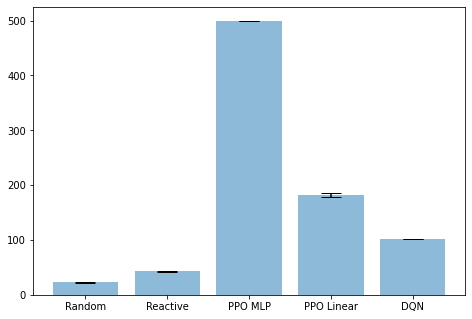

In [96]:
import matplotlib.pyplot as plt

#Plot the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

algs = ['Random', 'Reactive', 'PPO MLP', 'PPO Linear', 'DQN']
means = [uniform_policy_mean, reactive_policy_mean, ppo_mlp_mean, ppo_linear_mean, dqn_mlp_mean]
errors = [uniform_policy_std, reactive_policy_std, ppo_mlp_std, ppo_linear_std, dqn_mlp_std]

ax.bar(algs, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()

# Implementing a Custom Environment

We now implement a custom environment with the Gym interface.

The `Dam` environment models a lake water reservoir where the objective is to learn a per-day water **release** policy that meets a given **demand** while keeping the water level below a **flooding** threshold. The reservoir dynamics is governed by the massconservation equation:

$$
x_{t+1} = x_t + i_t - a_t \qquad \text{with} \qquad t \in \{0,\dots,359\},
$$

where $x_t$ is the storage volume of the water reservoir at the beginning of day $t$, $i_t$ is the net inflow volume during day $t$, and $a_{t}$ is the release volume during day $t$. The state of the environment is represented by the pair $s_t=(x_t,i_{t-1})^\mathtt{T}$. The inflow $i_t$ is a memoryless cyclostationary stochstic process, governed by the equation:

$$
i_t = \overline{i}_t + \epsilon_t \qquad \text{where} \qquad \epsilon_t \sim \mathcal{N}(0,\sigma^2_i=2.0) \qquad \text{and} \qquad  \overline{i}_t = 4 + 8 \begin{cases}
                         3 \sin\left( \frac{3 \pi t}{359} \right) + 0.25  & \text{if } 0 \le t < 120 \\
                         0.25 \sin\left( \frac{3 \pi t}{359} \right) + 0.25  & \text{if } 120 \le t < 240 \\
                         0.5 \sin\left( \frac{3 \pi t}{359} \right) + 0.25               & \text{otherwise}
                                    \end{cases}
$$

The water reservoir is supposed to have capacity of $X_{\max} = 500\, Mm^3$, minimum storage of $X_{\min}=50\, Mm^3$. A **flooding** occurs when the storage volume is above $X_{\text{flood}}=300\, Mm^3$. The per-day **demand** is $A_{\text{demand}} = 10 Mm^3$. The reward function penalizes floodings and demands that are not satisfied:

$$
r(s,a) = -\alpha \max\{0, x_t - X_{\text{flood}}\} - \beta \max\{0, A_{\text{demand}} - a_t\}^2,
$$

where $\alpha=\beta=0.5$.

**References**

Castelletti, A., Stefano Galelli, Marcello Restelli, and Rodolfo Soncini‐Sessa. "Tree‐based reinforcement learning for optimal water reservoir operation." Water Resources Research 46, no. 9 (2010).


Parisi, Simone, Matteo Pirotta, Nicola Smacchia, Luca Bascetta, and Marcello Restelli. "Policy gradient approaches for multi-objective sequential decision making." In 2014 International Joint Conference on Neural Networks (IJCNN), pp. 2323-2330. IEEE, 2014.


Tirinzoni, Andrea, Andrea Sessa, Matteo Pirotta, and Marcello Restelli. "Importance weighted transfer of samples in reinforcement learning." In International Conference on Machine Learning, pp. 4936-4945. PMLR, 2018.

In [166]:
class Dam(gym.Env):
    """
    The Dam problem.
    
    """

    def __init__(self, alpha = 0.5, beta = 0.5):
        super(Dam, self).__init__()
        
        self.DEMAND = 10.0  # Water demand -> At least DEMAND/day must be supplied or a cost is incurred
        self.FLOODING = 300.0  # Flooding threshold -> No more than FLOODING can be stored or a cost is incurred
        self.MIN_STORAGE = 50.0 # Minimum storage capacity -> At most max{S - MIN_STORAGE, 0} must be released
        self.MAX_STORAGE = 500.0  # Maximum storage capacity -> At least max{S - MAX_STORAGE, 0} must be released
        self.INFLOW_STD = 2.0 # Random inflow std
        
        assert alpha + beta == 1.0 # Check correctness
        self.alpha = alpha
        self.beta = beta
        
        self.action_space = Box(low=np.array([0]),
                                high=np.array([np.inf]),
                                dtype=np.float32)
        
        self.observation_space = Box(low=np.array([0, 0]),
                                     high=np.array([np.inf, np.inf]),
                                     dtype=np.float32)

                                                           
    def _inflow(self, day):
        if day < 120:
            inflow_mean = 3 * np.sin(day * 3 * np.pi / 359) + 0.25
        elif day < 240:
            inflow_mean = 0.5 * np.sin(day * 3 * np.pi / 359) + 0.25
        else:
            inflow_mean = 0.25 * np.sin(day * 3 * np.pi / 359) + 0.25
        
        return 4 + 8 * inflow_mean + np.random.randn() * self.INFLOW_STD
                                                           

    def reset(self):
        
        self.day = np.random.randint(0, 360)
        self.inflow = self._inflow(self.day)
        self.storage = np.random.uniform(self.MIN_STORAGE, self.MAX_STORAGE)
                                                           
        return np.array([self.storage, self.inflow]).astype(np.float32)

                                                           
    def step(self, action):
        
        action = float(action)
        
        # Bound the action
        actionLB = max(self.storage - self.MAX_STORAGE, 0.0)
        actionUB = max(self.storage - self.MIN_STORAGE, 0.0)
        bounded_action = min(max(action, actionLB), actionUB)
                                                           
        # Transition dynamics
        action = bounded_action
        nextinflow = self._inflow(self.day)
        nextstorage = max(self.storage + nextinflow - action, 0.0)

        # Cost due to the excess level wrt the flooding threshold
        reward_flooding = -max(self.storage - self.FLOODING, 0.0) / 4

        # Deficit in the water supply wrt the water demand
        reward_demand = -max(self.DEMAND - action, 0.0) ** 2
        
        # The final reward is a weighted average of the two costs
        reward = self.alpha * reward_flooding + self.beta * reward_demand

        # Get next day
        nextday = self.day + 1 if self.day < 360 else 1
                                                           
        self.storage = nextstorage
        self.inflow = nextinflow
        self.day = nextday

        return np.array([self.storage, self.inflow]).astype(np.float32), reward, False, {}

To be able to instance the environment with `gym.make`, we need to register the environment

In [168]:
from gym.envs.registration import register


register(
    id="Dam-v4",
    entry_point="__main__:Dam",
    max_episode_steps=500,
    reward_threshold=0,
)

### Validate the environment

Stable Baselines3 provides a [helper](https://stable-baselines3.readthedocs.io/en/master/common/env_checker.html) to check that your environment follows the Gym interface. It also optionally checks that the environment is compatible with Stable-Baselines (and emits warning if necessary).

In [169]:
from stable_baselines3.common.env_checker import check_env

In [178]:
env = Dam()

# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

/home/alberto/.local/lib/python3.8/site-packages/stable_baselines3/common/env_checker.py:272: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


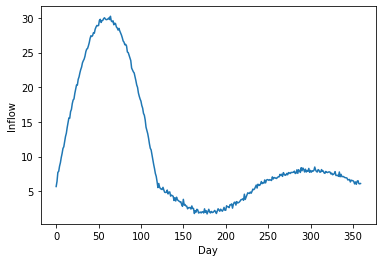

In [179]:
import matplotlib.pyplot as plt


N_TRIALS = 100
x = np.arange(0, 360)
Y = []
for _ in range(N_TRIALS):
    y = np.array([env._inflow(xx) for xx in x])
    Y.append(y)

plt.plot(x, np.mean(Y, axis=0))
plt.xlabel('Day')
plt.ylabel('Inflow')
plt.show()

In [180]:
class NoReleasePolicy(BasePolicy):
    
    def predict(self, obs):
        return 0, obs
    
    def _predict(self, *args, **kwargs):
        pass
    
    def forward(self, *args, **kwargs):
        pass


class AllReleasePolicy(BasePolicy):
    
    def predict(self, obs):
        return np.inf, obs
    
    def _predict(self, *args, **kwargs):
        pass
    
    def forward(self, *args, **kwargs):
        pass
    

class ZeroMeanGaussianPolicy(BasePolicy):
    
    def predict(self, obs):
        return np.random.randn(), obs
    
    def _predict(self, *args, **kwargs):
        pass
    
    def forward(self, *args, **kwargs):
        pass

### Evaluate some simple Policies

* **No-release policy**: a policy that releases the minimum allowed amount of water

$$
\pi(s) = 0
$$


* **All-release policy**: a policy that releases the maximum allowed amount of water

$$
\pi(s) = +\infty
$$


* **Zero-mean Gaussian policy**: a policy that selects the action sampled from a Gaussian policy with zero mean and variance $\sigma^2=1$

$$
\pi(a|s) = \mathcal{N}(0,\sigma^2)
$$

Let us evaluate these policies.

In [182]:
env = gym.make("Dam-v4")

no_release_policy = NoReleasePolicy(env.observation_space, 
                                    env.action_space)

all_release_policy = AllReleasePolicy(env.observation_space, 
                                    env.action_space)

gauss_policy = ZeroMeanGaussianPolicy(env.observation_space, 
                                    env.action_space)


no_release_mean, no_release_std = evaluate(env, no_release_policy, render=0)
all_release_mean, all_release_std = evaluate(env, all_release_policy, render=0)
gauss_policy_mean, gauss_policy_std = evaluate(env, gauss_policy, render=0)

/usr/local/lib/python3.8/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Mean reward: -18793.54026444128 Std reward: 88.28050275509321 Num episodes: 100
Mean reward: -5133.330439267212 Std reward: 98.67297314827863 Num episodes: 100
Mean reward: -18538.215838395714 Std reward: 80.13567139100478 Num episodes: 100


### Train PPO, DDPG, and SAC

In [190]:
from stable_baselines3 import DDPG, SAC


ppo = PPO("MlpPolicy", env, verbose=1, policy_kwargs=dict(net_arch=[64, 64], log_std_init=2.))
ddpg = DDPG("MlpPolicy", env, verbose=1, policy_kwargs=dict(net_arch=[64, 64]))
sac = SAC("MlpPolicy", env, verbose=1, policy_kwargs=dict(net_arch=[64, 64]))

print(ppo.policy)
print(ddpg.policy)
print(sac.policy)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (policy_net): Sequential()
    (value_net): Sequential()
  )
  (action_net): Linear(in_features=64, out_features=1, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)
TD3Policy(
  (actor): Actor(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (mu): Sequential(
      (0): Linear(in_feature

In [193]:
ppo.learn(total_timesteps=10000, callback=None)
sac.learn(total_timesteps=10000, callback=None)
ddpg.learn(total_timesteps=10000, callback=None)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 500       |
|    ep_rew_mean     | -1.87e+04 |
| time/              |           |
|    fps             | 2213      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | -1.87e+04    |
| time/                   |              |
|    fps                  | 1719         |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0004065793 |
|    clip_fraction        | 0.000146     |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.43        |
|    explained_variance   | 0.000108     |
|    

ValueError: Expected parameter loc (Tensor of shape (1, 1)) of distribution Normal(loc: tensor([[nan]]), scale: tensor([[nan]])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan]])

In [186]:
def evaluate2(env, policy, gamma=1., num_episodes=100, render=0):
    """
    Evaluate a RL agent
    :param env: (Env object) the Gym environment
    :param policy: (BasePolicy object) the policy in stable_baselines3
    :param gamma: (float) the discount factor
    :param num_episodes: (int) number of episodes to evaluate it
    :param render: (int) number of episodes to be rendered
    :return: (float) Mean reward for the last num_episodes
    """
    discounter = 1.
    all_episode_rewards = []
    for i in range(num_episodes):
        episode_rewards = []
        done = False
        obs = env.reset()
        while not done:
            if i < render:
                env.render()
            action, _ = policy.predict(obs)
            print(obs, action)
            obs, reward, done, info = env.step(action)
            episode_rewards.append(reward * discounter)
            discounter *= gamma

        all_episode_rewards.append(sum(episode_rewards))
    env.close()

    mean_episode_reward = np.mean(all_episode_rewards)
    std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)
    print("Mean reward:", mean_episode_reward, 
          "Std reward:", std_episode_reward,
          "Num episodes:", num_episodes)

    return mean_episode_reward, std_episode_reward

In [187]:
evaluate2(env, ppo, render=0)

[176.67113    8.830267] [0.53934157]
[184.09521     7.9634314] [0.]
[189.4148     5.319577] [0.]
[197.0101      7.5953135] [1.2281572]
[203.19237     7.4104257] [1.1160406]
[207.64388     5.5675383] [1.6885324]
[212.30031    6.344966] [0.6180292]
[222.4967    10.814428] [0.]
[227.37672   4.88002] [1.6754215]
[233.876      8.174714] [1.0476604]
[240.52872    7.700358] [0.7124689]
[242.63356     2.8173218] [1.0869449]
[248.1885      6.6418924] [1.1424054]
[251.54364     4.4975405] [1.0145794]
[260.91833   10.389281] [1.3955464]
[266.42648     6.9036703] [2.7244234]
[269.90192     6.1998806] [0.61466765]
[275.45898     6.1717257] [0.]
[282.9483     7.489319] [1.1034151]
[293.4492  11.6043] [1.8935548]
[297.2757      5.7200475] [0.9587538]
[302.92587     6.6089306] [1.500793]
[309.69568   8.27061] [1.0430052]
[319.552     10.899337] [0.16636509]
[329.4767    10.091083] [0.70173615]
[339.5059    10.730892] [0.341106]
[349.1396     9.974809] [0.]
[356.8546     7.715031] [0.]
[365.7261      8

[505.2593      5.2593083] [1.5237604]
[505.32648    5.326491] [0.]
[501.48264     1.4826226] [1.3286709]
[507.32892    7.328905] [0.]
[502.661      2.661006] [1.0572326]
[505.83322    5.833222] [2.3550446]
[506.08493    6.084942] [0.32338363]
[503.39975    3.399742] [1.2514923]
[504.24115     4.2411494] [0.68096846]
[505.9973      5.9973145] [0.6557296]
[507.81595     7.8159575] [0.]
[505.8179      5.8179064] [1.016748]
[502.73657     2.7365632] [0.9750892]
[505.01227    5.012268] [1.1236254]
[506.6166      6.6166115] [0.26726162]
[506.87866     6.8786697] [1.0264734]
[506.7831     6.783123] [1.1881917]
[502.36572     2.3657303] [0.7028235]
[505.5938      5.5938163] [0.51105344]
[503.0432      3.0432217] [2.1801448]
[506.23334     6.2333455] [0.]
[507.19812     7.1981163] [0.5562072]
[503.6154     3.615386] [0.]
[507.12006    7.120056] [0.686817]
[506.01382     6.0138283] [1.4033674]
[508.0806     8.080591] [1.5532423]
[506.3523      6.3522944] [1.5523427]
[506.32373     6.3237195] [1.

[520.04614   20.046173] [1.150857]
[521.50104   21.501032] [0.81960315]
[523.29083  23.29082] [1.5832565]
[522.00476   22.004786] [0.1783421]
[521.8569   21.85689] [2.861609]
[520.53845   20.538424] [1.2537619]
[520.8342   20.83425] [1.1784614]
[521.09595   21.095955] [0.]
[522.59326   22.593254] [2.7866204]
[523.70966   23.709677] [1.100421]
[523.22955   23.229568] [0.8971222]
[526.8225   26.82248] [0.57573044]
[524.97614   24.976143] [0.0295645]
[525.8466    25.846611] [1.56939]
[524.49396  24.49397] [0.46044502]
[523.5582    23.558237] [1.7475386]
[524.7598   24.75981] [1.0577354]
[526.0221    26.022118] [2.278231]
[524.75824   24.758228] [1.691875]
[527.3644    27.364357] [0.]
[527.15607   27.156061] [1.0877523]
[527.96606   27.966072] [0.92117953]
[526.7167    26.716688] [0.7216424]
[527.03314  27.03316] [1.4578229]
[525.89075   25.890757] [0.]
[527.78815   27.788147] [1.1726058]
[528.6981    28.698118] [1.169177]
[529.2219   29.22192] [0.29717213]
[528.0563    28.056246] [2.06838

[508.77954    8.779528] [1.7422454]
[506.17856     6.1785502] [0.9522007]
[507.60184    7.601826] [0.0440644]
[506.6729     6.672914] [0.99439526]
[508.65402    8.654032] [3.0492935]
[505.9244      5.9244003] [0.]
[509.2048     9.204816] [0.44571224]
[505.19324    5.193226] [1.5648384]
[505.15152     5.1515055] [0.24086869]
[508.71533    8.715329] [0.35013002]
[508.5148     8.514796] [0.617485]
[511.39413    11.3941345] [0.44205183]
[507.4734      7.4733915] [2.037867]
[506.4485      6.4485006] [0.02807969]
[506.64847     6.6484823] [0.9543358]
[507.12915    7.129136] [1.0275162]
[509.29095    9.290945] [0.37028795]
[507.732      7.731982] [2.1813836]
[508.02036     8.0203495] [0.]
[504.50015     4.5001645] [0.73182607]
[505.43665     5.4366384] [1.3739755]
[507.22598    7.225991] [0.]
[507.2279      7.2278943] [1.0327282]
[507.5025      7.5025063] [0.00900376]
[504.11377     4.1137547] [0.7270162]
[507.5153      7.5152984] [1.8037575]
[506.38654    6.386532] [1.8234516]
[509.01233    

[506.80963     6.8096366] [0.6253726]
[508.0673     8.067283] [1.1619582]
[509.99075    9.990739] [1.738343]
[511.28796   11.287965] [0.]
[505.4524      5.4523873] [0.83757794]
[506.71918     6.7191725] [1.7859514]
[503.66223     3.6622417] [2.0772328]
[508.65405    8.654067] [0.88932663]
[508.28598    8.285992] [1.6165689]
[505.01843    5.018429] [1.9102308]
[507.64197    7.641973] [0.]
[508.50482    8.504829] [1.4741429]
[507.37537     7.3753715] [0.]
[507.0259      7.0258965] [0.]
[506.64777    6.647763] [1.1022273]
[506.40475    6.404761] [1.2253563]
[507.9488    7.94879] [1.8217365]
[507.75034    7.750335] [0.05049771]
[507.91266    7.912656] [0.48880833]
[504.45526    4.455251] [0.3383336]
[507.27783    7.277832] [0.9022924]
[505.7689     5.768878] [1.2482048]
[509.64005   9.64003] [0.20903969]
[505.02988     5.0298624] [0.]
[507.2792     7.279205] [0.97445655]
[506.33624    6.336246] [0.]
[508.57285    8.572843] [1.4820161]
[507.2132      7.2132106] [0.26378065]
[506.94705   6.9

[517.5743    17.574295] [0.49407157]
[521.94727   21.947235] [1.3766564]
[519.32104   19.321047] [0.64571345]
[519.8566    19.856632] [0.]
[519.0746    19.074554] [1.1091442]
[520.79224   20.792215] [1.178473]
[522.1383    22.138294] [0.4266475]
[523.2591    23.259079] [0.849041]
[522.95514   22.955114] [0.]
[525.99677   25.996767] [1.715828]
[523.3352    23.335184] [1.706162]
[522.4906    22.490622] [1.9950897]
[528.4623    28.462276] [0.]
[522.72235   22.722374] [1.2606573]
[522.73      22.729996] [1.1972151]
[526.8995    26.899464] [0.49327672]
[523.02826   23.028236] [0.9295516]
[525.227     25.226969] [1.6966953]
[530.0799    30.079891] [1.3155913]
[525.5886    25.588621] [0.1905508]
[526.50354  26.50353] [0.]
[526.945    26.94499] [1.0542086]
[529.4033    29.403336] [0.36292976]
[524.1862    24.186216] [1.5387719]
[528.9729    28.972876] [0.22687238]
[529.21747   29.217499] [0.]
[530.56323   30.563204] [2.127543]
[529.96533   29.965357] [0.8239994]
[529.5177    29.517729] [0.6469

[507.96497     7.9649534] [0.48300123]
[509.32468    9.324686] [1.0259175]
[508.83182    8.831809] [0.]
[508.85678     8.8567705] [0.01057792]
[507.2832      7.2832007] [2.021191]
[506.20847    6.208464] [1.1165868]
[504.7844      4.7844048] [2.6267042]
[505.60648     5.6064873] [0.2072928]
[508.39758     8.3975935] [0.4620273]
[505.12057     5.1205716] [0.39670706]
[506.5392      6.5392103] [0.46512464]
[504.93774     4.9377456] [1.3565409]
[505.77267     5.7726808] [1.7454703]
[508.4039     8.403891] [1.6321409]
[502.89938     2.8993764] [1.6359245]
[505.2517     5.251712] [1.9713783]
[504.9501     4.950095] [0.8521986]
[508.0863     8.086319] [1.9035572]
[507.14758    7.147582] [1.7438872]
[505.26126     5.2612476] [0.05619586]
[506.66827     6.6682863] [0.3037886]
[509.40152    9.401531] [0.26978314]
[504.04337     4.0433655] [0.71693313]
[506.47937     6.4793835] [0.24246615]
[504.68643     4.6864243] [0.7620635]
[506.23627     6.2362733] [1.7879902]
[507.62494    7.624927] [1.746

[498.66104    -1.3389472] [0.]
[ 4.982217e+02 -4.393462e-01] [1.0922664]
[500.60382    3.474369] [0.]
[501.68015     1.6801564] [0.8557022]
[502.517      2.517006] [1.1842593]
[502.23883     2.2388177] [0.20546484]
[505.92575    5.925752] [0.6239792]
[506.24417     6.2441697] [0.19640791]
[505.7122     5.712182] [0.]
[505.77338    5.773376] [2.024654]
[506.09125    6.091254] [1.4469676]
[501.593       1.5929794] [2.6676502]
[507.53442   8.60911] [0.]
[503.59116     3.5911517] [1.3024547]
[503.69852     3.6985104] [0.28986198]
[504.98508    4.985081] [2.6860664]
[506.4217      6.4216857] [0.]
[504.3144     4.314401] [0.81641316]
[507.0985      7.0985045] [0.84476167]
[505.17422    5.174219] [2.9718566]
[504.31522     4.3152175] [0.7705394]
[505.9423      5.9423065] [1.0352144]
[503.05045     3.0504375] [0.8618126]
[507.0829      7.0828834] [0.37618142]
[498.82867    -1.1713204] [0.73871416]
[502.08096     3.9909914] [1.4370768]
[510.9334    10.933401] [0.]
[502.137       2.1369817] [0.6

[508.58057    8.580556] [0.2907188]
[508.80978    8.809776] [0.89477396]
[506.58963     6.5896406] [2.0317502]
[506.29733     6.2973466] [1.3638394]
[504.75577     4.7557697] [0.25869238]
[509.489      9.488999] [0.67405677]
[506.20087    6.200868] [0.9031771]
[503.84604    3.846029] [0.08337766]
[507.99393     7.9939146] [2.2608566]
[508.2694     8.269411] [0.]
[506.07886     6.0788717] [0.1244514]
[505.52908     5.5290837] [1.2755662]
[507.73065     7.7306395] [0.]
[507.19638     7.1963863] [1.0662417]
[506.70004    6.700045] [2.553063]
[504.57913     4.5791173] [0.58568835]
[507.0675    7.06751] [1.0010414]
[509.291       9.2909975] [1.7680066]
[505.274      5.274001] [2.1551502]
[506.57007     6.5700774] [0.]
[507.06238     7.0623913] [0.84505755]
[505.85867     5.8586745] [0.]
[506.82098    6.820979] [0.]
[507.16156     7.1615543] [1.3040326]
[507.43173     7.4317274] [1.7042416]
[507.1756     7.175602] [0.9407487]
[504.57437     4.5743847] [0.5812292]
[510.90665   10.906636] [0.6

[506.20416    6.204155] [1.5761614]
[513.3012    13.301231] [1.7881336]
[510.2628  10.2628] [1.8908793]
[508.14807    8.148069] [1.1369691]
[508.56668    8.566682] [3.0838158]
[505.37814    5.378145] [1.2463762]
[507.14523     7.1452427] [0.]
[508.40955    8.409545] [0.]
[507.8701    7.87008] [1.1423581]
[508.29846    8.298463] [2.4050765]
[509.83408    9.834072] [0.9474658]
[512.5556    12.555584] [0.]
[508.11423    8.114223] [2.0503001]
[507.28653     7.2865324] [0.]
[505.01077    5.010782] [1.0021464]
[509.06464    9.064632] [1.4069916]
[506.5041      6.5040846] [0.27678287]
[508.15054    8.150548] [0.968313]
[505.05746   5.05747] [0.85118383]
[509.71103    9.711035] [1.7294711]
[506.4242      6.4241915] [0.]
[508.6519     8.651886] [0.6628466]
[507.59357     7.5935626] [0.78033733]
[511.3761    11.376087] [0.9475355]
[508.7079     8.707872] [0.]
[506.02744    6.027435] [1.2930603]
[509.97357    9.973587] [0.]
[508.2475     8.247505] [3.2442524]
[507.48587     7.4858756] [2.0589855]

[500.54388     0.5438971] [0.5408255]
[503.0791      3.0790982] [1.3813819]
[500.67484     0.6748424] [1.1290756]
[500.53592     0.9901462] [0.6527389]
[500.93594     1.0527784] [1.2734035]
[503.87485    4.212305] [0.61172163]
[501.93784     1.9378414] [0.06329095]
[504.8166     4.816597] [0.8225065]
[497.57123    -2.4287786] [0.]
[501.39914     3.8279085] [0.24528944]
[503.27875     3.2787552] [1.0025327]
[501.61285     1.6128567] [0.]
[504.30746     4.3074675] [1.0687246]
[503.17386     3.1738513] [0.4119895]
[503.92886     3.9288673] [0.10055923]
[504.3032      4.3031993] [1.1696687]
[503.45303     3.4530468] [1.5852461]
[502.80286     2.8028624] [2.0010557]
[502.46545     2.4654598] [2.5683422]
[496.67584    -3.2212691] [0.]
[501.78992    5.114069] [0.]
[503.64346     3.6434636] [0.12663895]
[500.97528     0.9752918] [0.9979296]
[501.60757     1.6302251] [0.63909817]
[500.63705     0.6370454] [1.186033]
[503.43076     3.9797475] [0.7687279]
[501.9697     1.969683] [0.]
[499.41272  

[514.61597   14.615987] [0.530043]
[515.7702    15.770211] [3.2239285]
[515.05347   15.053488] [2.6979656]
[517.3258   17.32583] [1.398886]
[512.0953    12.095247] [1.5321684]
[514.31604   14.316016] [0.]
[512.829      12.8289995] [1.1161833]
[510.30884   10.308845] [1.6286922]
[513.40497   13.404994] [0.]
[506.86884     6.8688445] [2.0259721]
[509.2526     9.252592] [0.]
[511.12903   11.129023] [0.51074505]
[511.90732   11.907313] [1.6666336]
[506.43637    6.436368] [1.3186634]
[509.48544    9.485429] [0.6029264]
[505.3092      5.3091936] [0.]
[504.80872    4.808723] [0.]
[503.48386     3.4838514] [0.4386793]
[505.5873      5.5873137] [2.8001468]
[507.47537    7.475385] [0.]
[503.1509      3.1509166] [1.0960745]
[505.71545     5.7154474] [1.150317]
[504.81055    4.810546] [1.7228771]
[505.89267     5.8926773] [2.1086173]
[505.47824    5.478253] [0.9795441]
[506.5825     6.582491] [0.45122242]
[502.74768     2.7476907] [2.246932]
[503.91013     3.9101343] [1.1955074]
[504.5956      4.5

[504.21494     4.2149367] [1.1571681]
[502.8946      2.8946023] [0.]
[503.70016     3.7001758] [1.5371528]
[504.9602      4.9601936] [0.9711303]
[501.35983     1.3598186] [2.554153]
[499.3942      0.5885277] [0.4323296]
[500.6493      1.6874237] [0.10485256]
[505.51932    5.519329] [0.6971444]
[503.53882    3.538804] [1.0365214]
[ 4.9987988e+02 -1.2011034e-01] [0.47441125]
[500.0557       0.65020996] [1.3095669]
[501.15457     2.4084566] [1.9989088]
[503.762       4.6063347] [0.]
[502.39108     2.3910718] [1.0517426]
[502.56866     2.5686677] [0.15542924]
[ 4.9971307e+02 -2.8691992e-01] [1.2928503]
[502.04083     3.6206148] [1.3586593]
[505.36987    5.369864] [2.1839838]
[503.9685     3.968493] [0.8606398]
[504.2911     4.291105] [2.2602963]
[506.8684      6.8684072] [1.8183527]
[5.0041510e+02 4.1510862e-01] [0.8877412]
[505.80884     6.2814817] [1.2640904]
[506.54276    6.542762] [0.6676651]
[ 4.999294e+02 -7.058732e-02] [1.2004721]
[4.9893607e+02 2.0712103e-01] [1.109686]
[501.03604 

[215.75018     3.2712047] [1.4749343]
[217.25516     2.9799006] [0.7963815]
[218.33789     1.8791205] [0.]
[220.0719      1.7340142] [0.7783228]
[223.77686     4.4832726] [2.9078467]
[223.51083     2.6418285] [0.38253373]
[226.77747     3.6491585] [0.]
[228.19553     1.4180629] [0.]
[229.25565    1.060124] [1.1665907]
[232.91277   4.82371] [0.9176434]
[236.33665    4.341534] [0.4099893]
[239.1972      3.2705324] [1.6828548]
[240.80649     3.2921486] [2.1764257]
[241.23305     2.6029778] [0.]
[243.15948     1.9264413] [1.9718868]
[246.65405    5.466455] [0.5367276]
[245.6429      -0.47442597] [0.]
[246.70898    1.066079] [2.5970798]
[245.99422     1.8823133] [1.2952898]
[ 2.4450987e+02 -1.8905646e-01] [0.5788268]
[247.0313      3.1002514] [1.5647509]
[249.19826     3.7317128] [0.]
[257.15826     7.9600205] [0.6383246]
[260.01306     3.4931054] [0.42116988]
[260.23343     0.6415326] [0.38935357]
[264.39148    4.547413] [0.41836876]
[268.14487     4.1717687] [0.2915818]
[274.00433    6.15

[ 4.9943320e+02 -3.6669743e-01] [1.0110686]
[502.08133    3.659196] [1.9493837]
[503.86166     3.8616557] [1.4041196]
[ 4.997821e+02 -2.178964e-01] [2.2557707]
[499.08554     1.5592095] [1.7202296]
[498.36288      0.99757826] [1.9850389]
[499.30148     2.9236333] [0.]
[498.64127     -0.66021484] [0.6856637]
[500.51535   2.55974] [1.6532063]
[500.2725      1.4103401] [0.]
[502.4691      2.4690769] [0.14079046]
[502.81223     2.8122377] [0.]
[503.8915      3.8914974] [1.2020566]
[498.38702    -1.6129783] [2.1095793]
[497.4751     1.197641] [0.]
[500.0603    2.58523] [2.857543]
[502.72284    5.520061] [0.94946706]
[506.7934      6.7933817] [0.6295204]
[5.0045462e+02 4.5463192e-01] [0.7372816]
[501.24948     1.5321314] [0.8625605]
[501.2798      1.2797866] [0.985647]
[501.5838      1.5837976] [0.6889417]
[504.1129      4.1129107] [1.0145972]
[505.90845     5.9084454] [0.10014439]
[5.0007053e+02 7.0525810e-02] [2.0031128]
[499.975       1.9075791] [0.64222276]
[502.29913     2.9663758] [0.3

[508.88504    8.885043] [0.26846373]
[505.69153     5.6915293] [2.1428974]
[506.38498    6.384984] [1.1969569]
[502.72845    2.728448] [0.2877608]
[509.70944    9.709433] [2.0002089]
[504.8496     4.849604] [1.0445257]
[506.7751      6.7750783] [0.]
[505.52878    5.528772] [0.9927803]
[504.4256     4.425585] [2.1769927]
[509.4556    9.45559] [0.77274346]
[509.0333     9.033304] [1.3594657]
[507.89413    7.894131] [0.90302473]
[508.10623    8.106226] [1.272462]
[507.85025     7.8502407] [1.8699298]
[506.20068    6.200682] [0.136617]
[506.0625      6.0624886] [0.9667935]
[504.22577    4.225757] [0.5309552]
[506.05405    6.054061] [1.5076557]
[508.8393     8.839308] [0.]
[510.55002   10.550034] [0.81931055]
[510.2666    10.266604] [1.1693437]
[507.03296    7.032958] [0.]
[506.1993     6.199299] [0.5248407]
[508.09964    8.099626] [0.48169065]
[508.0227     8.022698] [0.]
[505.3738      5.3738146] [1.4567752]
[505.72214     5.7221384] [0.2644056]
[510.18475   10.184742] [1.0617279]
[506.41

[525.60956   25.609537] [0.07803643]
[523.326    23.32598] [2.1333647]
[525.18854   25.188564] [0.96940833]
[525.63544   25.635422] [1.0230497]
[521.418     21.418013] [0.4624387]
[525.12146   25.121433] [1.9466964]
[526.7824    26.782423] [0.4373144]
[529.36     29.35998] [0.8938328]
[525.3545    25.354506] [0.8063141]
[527.4693    27.469294] [0.]
[528.2674    28.267412] [1.7331213]
[532.9653    32.965298] [1.9235362]
[528.74915  28.74912] [0.48461837]
[528.2903    28.290289] [0.]
[530.76935   30.769373] [2.535925]
[525.2047   25.20472] [1.7461151]
[528.39453   28.394505] [0.]
[528.0765    28.076496] [3.2041028]
[529.04193   29.041914] [0.9185137]
[531.57227   31.572254] [1.1672316]
[529.8974    29.897373] [0.01900464]
[527.7023    27.702251] [1.1128216]
[528.8483    28.848356] [2.934721]
[528.25      28.249971] [0.1967622]
[530.19147   30.191484] [1.5903504]
[529.2035    29.203487] [0.7361326]
[528.3387    28.338657] [0.6691603]
[528.89905   28.899076] [0.3103603]
[530.43134  30.4313

[521.9323    21.932308] [0.9978672]
[526.6765    26.676538] [0.18529475]
[524.6065    24.606504] [2.3490696]
[522.9487    22.948704] [0.]
[526.2552  26.2552] [2.2211852]
[527.65704  27.65705] [0.08134586]
[528.0014    28.001387] [0.38907224]
[525.86816   25.868174] [0.]
[526.04724   26.047264] [1.5754712]
[527.0716    27.071617] [2.6033945]
[525.6804    25.680416] [0.8375632]
[527.61316   27.613132] [1.8877211]
[526.34033   26.340311] [0.04945374]
[526.70544   26.705433] [0.61579263]
[527.00226  27.00225] [0.36011398]
[528.433     28.432991] [1.1108968]
[529.55585   29.555838] [1.2824242]
[530.10754   30.107548] [3.1412733]
[530.6347    30.634682] [0.1871289]
[529.14844   29.148453] [1.7848505]
[527.4531    27.453152] [0.5716632]
[530.645     30.644995] [0.]
[533.09424   33.094246] [0.77108574]
[530.60913   30.609125] [0.9841087]
[528.965     28.965023] [1.7421706]
[529.5928  29.5928] [1.3186085]
[526.3945    26.394445] [0.29969198]
[531.1628    31.162811] [0.8997601]
[529.222     29.2

[503.66736     3.6673493] [0.]
[504.27945    4.279464] [0.6241392]
[509.18332    9.183325] [3.3834858]
[507.90375     7.9037457] [0.8650879]
[507.01248    7.012471] [0.]
[506.1677     6.167685] [0.93884814]
[507.82788     7.8278666] [1.0450412]
[505.70163    5.701622] [1.1990402]
[504.26178     4.2617927] [0.]
[505.63214    5.632144] [1.4491553]
[508.8029      8.8028755] [2.0605583]
[510.10483   10.104836] [0.89428514]
[506.02133    6.021334] [1.3494467]
[509.27084    9.270853] [1.0849166]
[505.0571      5.0570965] [0.8943547]
[505.98383     5.9838266] [0.]
[506.08658    6.086573] [0.287982]
[508.7507     8.750704] [1.1897011]
[508.3618     8.361789] [0.]
[506.46442     6.4644117] [1.7530239]
[504.81326     4.8132615] [1.3410567]
[509.0442    9.04418] [1.2760174]
[506.52414    6.524154] [2.0833673]
[509.98114    9.981136] [0.]
[505.56863    5.568621] [0.08974516]
[508.95517    8.955183] [0.]
[507.57306     7.5730696] [0.]
[509.1577     9.157702] [0.46033543]
[508.09747    8.097467] [1.

[503.8843      3.8843155] [0.5032668]
[508.4132     8.413209] [0.1339736]
[508.13275    8.132759] [0.30346322]
[509.81165    9.811656] [0.7674681]
[513.2137  13.2137] [0.73535657]
[508.41943    8.419422] [0.9461223]
[507.89212     7.8921084] [0.41460383]
[506.9829     6.982912] [0.]
[511.7498    11.749791] [0.7703789]
[511.18903  11.18903] [0.21313566]
[511.39374   11.393724] [0.07962662]
[505.55585     5.5558534] [1.1941446]
[507.1677      7.1676908] [0.17622817]
[508.421      8.420987] [0.22569281]
[506.86072     6.8607264] [0.40415663]
[507.0955      7.0954795] [0.]
[509.57227    9.572274] [0.]
[509.86877    9.868776] [3.977529]
[506.63196     6.6319427] [1.7489803]
[506.4824      6.4823856] [0.]
[511.49475   11.494746] [0.20772803]
[508.31427    8.314281] [2.0396333]
[507.87772     7.8777127] [0.]
[506.2847      6.2846932] [0.6679424]
[508.94977    8.949777] [0.4354487]
[507.04337     7.0433526] [0.5315416]
[508.88486    8.884843] [0.]
[510.88416  10.88417] [0.924037]
[505.033     

[509.62592    9.625903] [0.99938214]
[511.18774   11.187753] [2.3662987]
[507.12027     7.1202583] [0.8637713]
[508.33136    8.331371] [0.9715751]
[509.84393    9.843921] [1.5506678]
[506.07697     6.0769672] [0.]
[506.79263   6.79262] [3.6073372]
[506.4579      6.4578815] [1.0422838]
[508.64706    8.647072] [0.04055017]
[505.34134     5.3413463] [0.3911808]
[509.65524    9.655253] [2.6678884]
[505.2341     5.234104] [0.]
[508.72104     8.7210455] [0.53152335]
[508.7777     8.777705] [0.]
[510.63715    10.6371355] [0.48671123]
[504.45078    4.450775] [1.103243]
[506.63757    6.637568] [0.8848648]
[507.5104     7.510398] [1.4738386]
[507.72784     7.7278485] [1.945047]
[507.5714      7.5713987] [1.5338686]
[508.30566   8.30567] [0.]
[334.73907     7.9710345] [0.]
[346.12085   11.381784] [1.7276853]
[352.00928    7.616122] [2.340641]
[357.03378    7.365124] [0.38147175]
[364.54825    7.895934] [1.0296106]
[376.7149    13.196281] [0.382304]
[384.55344    8.220819] [0.]
[391.36026    6.806

[505.52347    5.523461] [0.]
[507.31403    7.314041] [0.]
[507.01566     7.0156574] [1.1508031]
[507.30814   7.30815] [0.05902636]
[510.98837   10.988366] [0.]
[508.23502    8.235009] [0.61059093]
[507.67264     7.6726317] [2.013258]
[504.69736     4.6973553] [0.4535686]
[508.96573    8.965737] [1.884702]
[508.45053    8.450522] [0.8830259]
[507.70804    7.708038] [0.9333129]
[506.55658    6.556592] [0.23219311]
[509.94116    9.941168] [2.316919]
[511.07187    11.0718565] [1.3093234]
[512.2559    12.255891] [0.]
[509.23935    9.239347] [0.]
[509.74838    9.748367] [2.0847855]
[505.39938    5.399385] [0.]
[506.02975     6.0297647] [1.8464725]
[509.64127    9.641262] [2.8788648]
[507.7766     7.776619] [1.5941327]
[505.90533     5.9053493] [1.5014911]
[507.15793     7.1579185] [1.9897032]
[506.513       6.5129986] [0.]
[506.3632      6.3631783] [0.]
[508.18906    8.189059] [0.38654095]
[510.21765   10.217653] [1.2098958]
[509.5502     9.550196] [1.149829]
[506.54068    6.540677] [1.04264

[530.0395    30.039463] [0.9801601]
[528.3252    28.325186] [1.7082773]
[533.2572   33.25722] [3.278029]
[527.64056   27.640574] [1.3781863]
[525.8806    25.880634] [0.3711002]
[534.3905    34.390503] [2.129541]
[529.09784   29.097841] [0.5431571]
[530.0579   30.05794] [0.5884476]
[530.4427   30.44266] [2.0231116]
[530.6105    30.610474] [1.3440025]
[531.43195   31.431929] [1.3440381]
[525.17224  25.17223] [1.4488151]
[526.15845   26.158417] [1.2211185]
[528.91296   28.912977] [0.8958097]
[531.5723    31.572317] [2.1366591]
[529.63666  29.63667] [0.55441076]
[527.3112    27.311201] [1.9152125]
[527.73035  27.73034] [1.49032]
[524.5627    24.562677] [0.]
[523.8989    23.898916] [1.2346252]
[525.50226   25.502258] [0.20074219]
[525.22614   25.226137] [0.90210724]
[524.8976    24.897573] [0.22968388]
[527.4778    27.477783] [2.123622]
[524.55963   24.559628] [0.]
[525.43756   25.437592] [0.8384582]
[527.20703   27.207016] [0.9009197]
[522.1534    22.153355] [0.09608012]
[523.65247   23.65

[216.61226     1.2259434] [0.5767362]
[220.9989      4.9633718] [1.2716205]
[223.2549      3.5276232] [1.7810669]
[224.85089     3.3770623] [0.9533613]
[231.15442     7.2568784] [0.]
[237.13832     5.9839015] [1.4852147]
[239.27324     3.6201353] [1.1785684]
[242.6708     4.576136] [0.8855206]
[248.29837     6.5130816] [0.05755419]
[249.50793     1.2671161] [1.2306331]
[249.06265     0.7853552] [2.3142781]
[254.09546     7.3470955] [1.47564]
[257.88837    5.268529] [2.0601215]
[260.67752     4.8493013] [1.3730879]
[267.59164    8.287183] [1.5771782]
[269.90405     3.8896153] [1.2338619]
[271.25626     2.5860443] [0.00614685]
[273.473       2.2228918] [0.4054364]
[276.37918     3.3116093] [0.28714973]
[282.61203     6.5200224] [2.4366639]
[284.54788     4.3725142] [1.5886785]
[288.95615     5.9969363] [0.254952]
[295.72028     7.0190797] [0.52246207]
[298.6465      3.4486985] [0.65040445]
[305.96066    7.964549] [0.]
[310.00995     4.0492783] [1.737013]
[313.95364    5.680714] [0.563976

[498.99094    -1.0090497] [0.34477282]
[502.81082     4.1646495] [0.75257814]
[505.50427    5.504259] [0.59840727]
[504.38837    4.388353] [0.07768196]
[502.65396    2.653947] [0.240861]
[504.64664     4.6466475] [1.4912486]
[506.11505     6.1150546] [1.853507]
[5.002546e+02 2.546083e-01] [0.81761265]
[503.3983      3.9612982] [1.2190233]
[504.9149     4.914891] [0.]
[505.76144     5.7614565] [1.5096073]
[505.0924     5.092397] [1.7108177]
[505.30264    5.302639] [0.8826938]
[500.90796      0.90795153] [1.1991905]
[501.6686      1.9598445] [0.09344536]
[500.8403      0.8402962] [2.5962353]
[506.47946    8.235397] [1.2234873]
[507.7286     7.728606] [1.4792163]
[504.24796    4.247969] [0.9737587]
[502.2596      2.2596028] [0.6174514]
[506.5054     6.505404] [0.]
[504.47638   4.47638] [0.4186464]
[504.05438     4.0543685] [1.8056521]
[ 4.9970621e+02 -2.9379836e-01] [1.7979808]
[503.40323     5.4950013] [0.99876624]
[501.95047     1.9504747] [2.429443]
[503.74033    4.219292] [0.47243455]

[509.3577     9.357688] [0.7014286]
[505.6867      5.6866937] [0.6290569]
[508.0546     8.054583] [0.32304734]
[508.017      8.017006] [0.66971153]
[508.97833    8.978347] [0.7678401]
[507.20047    7.200455] [0.]
[507.45743     7.4574175] [2.0997894]
[508.05032    8.050329] [0.90652037]
[510.52853   10.528541] [0.4966348]
[509.93765   9.93766] [2.0253325]
[506.00867    6.008652] [1.646123]
[506.31998     6.3199825] [0.]
[507.22745     7.2274494] [1.7030869]
[504.99734    4.997338] [0.12461835]
[509.20593    9.205937] [1.1877046]
[507.31412    7.314105] [2.226181]
[505.8602     5.860198] [0.]
[504.3511     4.351114] [0.03523338]
[504.47012     4.4701104] [0.]
[505.666       5.6659856] [0.20155609]
[506.44458     6.4445696] [0.]
[507.29462    7.294619] [0.8502382]
[503.28528     3.2852764] [0.01214361]
[506.41898     6.4189725] [1.044953]
[505.29776   5.29777] [0.]
[508.5126     8.512619] [0.]
[509.733      9.733011] [2.6232882]
[508.78967    8.789671] [0.16753805]
[502.7811      2.78109

[228.96678     4.1932707] [0.27306426]
[234.91817    6.224446] [0.]
[236.09933     1.1811737] [0.9355142]
[239.82748     4.6636715] [1.9222579]
[244.02078     6.1155562] [1.57898]
[246.9225      4.4806886] [2.0177927]
[245.51657      0.61186695] [0.13763273]
[251.02097     5.6420274] [0.20201057]
[256.63528     5.8163414] [1.7060866]
[261.453      6.523797] [1.7354937]
[263.96417     4.2466474] [0.6302217]
[265.54965     2.2157097] [0.465806]
[266.55087     1.4670415] [0.]
[270.56757    4.016678] [0.5551034]
[272.79742     2.7849765] [1.2191418]
[274.04938     2.4710763] [1.2772708]
[275.35507     2.5829859] [0.6733695]
[276.58527    1.903555] [0.53231835]
[278.5265      2.4735405] [2.2786975]
[275.63794     -0.60986537] [1.3643143]
[275.36102     1.0874102] [1.3916094]
[274.98907     1.0196546] [1.3192258]
[271.76788    -1.9019513] [0.]
[272.65695     0.8890568] [0.59713906]
[276.34756     4.2877464] [0.]
[278.87357     2.5260158] [0.57936907]
[281.73108     3.4368842] [0.6939157]
[28

[362.86606    2.583167] [1.7143345]
[367.5749     6.423151] [0.]
[375.28458     7.7097034] [2.8953419]
[376.7452     4.355968] [1.5230579]
[382.23285     7.0106926] [2.3385785]
[385.54956     5.6552877] [2.5709953]
[391.95532    8.976775] [1.1718082]
[395.44022     4.6567006] [2.3735762]
[399.51364    6.446974] [0.2847706]
[406.61096   7.3821 ] [0.12378484]
[412.00873     5.5215673] [1.0544611]
[416.65137    5.697081] [0.40526462]
[421.9666     5.720533] [1.7227926]
[427.00293     6.7591023] [0.]
[437.45978   10.456853] [2.5882149]
[441.25183     6.3802643] [0.7983198]
[443.79816     3.3446457] [0.]
[451.86       8.061809] [0.]
[459.15668     7.2966933] [0.5606071]
[467.03275    8.436686] [0.03744537]
[476.4391     9.443799] [2.4001155]
[479.63983     5.6008444] [1.9268636]
[486.69254    8.979572] [0.]
[492.54224    5.849705] [2.2080462]
[497.17792     6.8437347] [1.8323154]
[503.38126    8.035648] [1.614464]
[506.7149      6.7149134] [1.6976244]
[507.31674     7.3167315] [0.5016829]
[

[504.94662     4.9466143] [2.1429877]
[503.3171     3.317112] [0.04418969]
[505.65344    5.653445] [1.3569313]
[502.8852      2.8852022] [0.5727097]
[506.45615     6.4561553] [2.5634756]
[503.92438    3.924381] [0.]
[504.18997    4.189959] [0.5969756]
[503.0046      3.0045981] [1.377958]
[504.3161     4.316099] [0.9383293]
[505.54346     5.5434475] [0.48373237]
[501.46576     1.4657516] [1.0328767]
[501.88046     1.8804708] [1.0644978]
[503.76102     3.7610319] [0.]
[507.5651      7.5650926] [0.50606525]
[5.0020978e+02 2.0978250e-01] [1.940033]
[502.84985    4.580116] [0.5552187]
[503.58212     3.5821269] [1.7234826]
[505.20288     5.2028937] [0.64117825]
[506.03177     6.0317745] [1.9295484]
[506.3814      6.3814044] [1.8657281]
[504.47797    4.477965] [1.7082131]
[507.42612     7.4261146] [1.0515686]
[504.48126    4.481277] [0.]
[504.64948    4.649481] [2.13291]
[503.68903     3.6890194] [0.9550268]
[501.39227   1.39227] [1.811116]
[503.42523   3.84407] [0.]
[505.13892    5.138912] [

[322.7411     6.914227] [1.6826854]
[328.6269      7.5684943] [1.7867935]
[336.10883    9.268728] [1.8734082]
[343.76523    9.529809] [1.987739]
[349.02896    7.251486] [0.]
[358.654      9.625018] [1.5091194]
[362.73773     5.5928807] [0.]
[371.56924    8.831494] [2.3314197]
[374.40317     5.1653414] [1.1602186]
[380.2455      7.0025563] [2.3270857]
[387.98108    10.0626545] [1.224117]
[394.56287    7.805913] [1.7806358]
[399.5275     6.745254] [0.92100036]
[407.22485    8.618354] [0.9146958]
[414.36697    8.056819] [0.32423812]
[421.76706    7.724334] [0.20388496]
[430.48288     8.9197035] [1.2108778]
[434.84195     5.5699472] [0.]
[441.50424    6.662311] [0.9845671]
[449.44266    8.922973] [1.6924098]
[453.4124      5.6621556] [0.]
[462.7182      9.3057785] [0.]
[473.3537    10.635509] [0.]
[480.2871      6.9334207] [2.8341622]
[482.7664      5.3134227] [2.412951]
[489.5617     9.208293] [1.4600973]
[495.89142   7.78979] [1.7070274]
[501.91693   7.73254] [0.7299233]
[508.6961     8.

[506.11258    6.112587] [1.875454]
[506.36862    6.368623] [0.]
[507.18326    7.183258] [0.]
[508.43222    8.432208] [0.9665718]
[505.92923    5.929228] [1.3161676]
[508.90958    8.909589] [0.8438593]
[507.0087      7.0086894] [0.7156614]
[506.59082    6.590833] [1.4602575]
[507.04678    7.046795] [0.]
[508.20477    8.204765] [2.5189657]
[511.3984    11.398417] [1.9001095]
[507.13214     7.1321464] [0.76187056]
[504.1043     4.104318] [0.1318177]
[506.7168     6.716807] [2.5709968]
[508.7706     8.770609] [0.54568756]
[505.13376    5.133745] [0.8873879]
[508.72177    8.721779] [0.7017112]
[504.999      4.998985] [2.3006358]
[505.12024     5.1202483] [1.2838075]
[502.80673     2.8067374] [1.7849972]
[505.50687     5.5068545] [0.]
[509.519      9.519018] [0.23098838]
[502.71924     2.7192264] [0.715215]
[505.32773     5.3277307] [1.2438537]
[505.5556     5.555597] [0.]
[503.50998     3.5099797] [0.]
[504.89615     4.8961596] [1.884333]
[507.69543    7.695443] [2.0236335]
[505.50476     5

[505.4415      5.4415107] [4.738427]
[506.98328    6.983263] [0.]
[512.4469    12.446881] [1.3128012]
[507.39914     7.3991528] [0.10758972]
[506.9812      6.9811945] [1.4969893]
[509.97873    9.978733] [1.2465867]
[508.56265    8.562658] [1.0154661]
[503.73746     3.7374709] [0.02182347]
[501.88168    1.881691] [1.2307701]
[504.41907    4.419079] [1.7567779]
[504.11157     4.1115584] [1.6236072]
[507.5995     7.599474] [0.46830374]
[504.85617     4.8561845] [2.0100355]
[507.7285      7.7284946] [1.5935446]
[507.23508     7.2350655] [2.4946375]
[506.09225     6.0922556] [0.6618942]
[507.97165     7.9716377] [0.]
[505.05716     5.0571733] [0.]
[508.68393   8.68392] [0.]
[504.1856     4.185613] [0.26520526]
[509.00522    9.005203] [2.17735]
[507.5801     7.580109] [1.3831066]
[506.42038    6.420392] [0.6457015]
[506.94244   6.94245] [0.40005016]
[502.65976     2.6597672] [1.4439712]
[507.52545     7.5254374] [1.4328346]
[509.9279     9.927897] [0.]
[510.02768   10.027685] [1.3029443]
[51

[510.57968   10.579683] [0.93751866]
[505.46338    5.463389] [0.0433467]
[507.84396     7.8439746] [0.16086769]
[508.07736     8.0773535] [1.6714379]
[507.67023     7.6702266] [1.8179493]
[508.47003    8.470033] [0.22140789]
[505.54822     5.5482187] [1.4182338]
[509.90356    9.903562] [0.3388701]
[506.723      6.722987] [0.0373314]
[506.20682     6.2068143] [1.2472657]
[509.27844    9.278448] [1.3038886]
[503.36255     3.3625543] [1.1694849]
[510.26794  10.26793] [0.9321075]
[509.20605    9.206042] [1.5025032]
[506.17435     6.1743393] [1.5147369]
[507.06522     7.0652156] [0.51835036]
[507.47906    7.479071] [1.362652]
[512.3501    12.350107] [0.47442484]
[507.16974     7.1697326] [1.9422324]
[506.3035      6.3035107] [0.]
[504.65912     4.6591043] [0.16977072]
[511.76837   11.768366] [0.43119925]
[507.5791     7.579101] [0.17885113]
[508.02487    8.024876] [1.0447721]
[506.09445    6.094441] [0.]
[510.47604   10.476058] [1.409785]
[508.42114    8.421155] [0.74836314]
[506.39862     

[ 1.7227325e+02 -7.5058960e-03] [0.83574337]
[172.75739     1.3198779] [0.29269123]
[174.5282      2.0635011] [0.]
[174.74223      0.21403635] [0.8587587]
[172.11612   -1.767358] [0.4744016]
[175.89925   4.25753] [1.6995766]
[171.85316    -2.3465009] [2.6101937]
[173.09494     3.8519664] [0.8081972]
[ 1.7213763e+02 -1.4911337e-01] [2.2680082]
[170.80385     0.9342216] [0.]
[175.38724     4.5833983] [0.]
[176.01942     0.6321833] [0.]
[177.6597      1.6402707] [1.2090417]
[177.04803      0.59737957] [0.0839293]
[176.02965    -0.9344542] [0.7498921]
[180.75612     5.4763594] [0.]
[184.51466    3.758549] [1.8864449]
[184.57025     1.9420376] [1.5500759]
[185.75537     2.7351813] [0.]
[189.39893     3.6435604] [1.739397]
[190.17583     2.5162983] [0.28148425]
[193.17557    3.281228] [2.4205487]
[193.7221     2.967085] [0.18707424]
[199.70515    6.170122] [1.6820804]
[199.08905     1.0659782] [0.]
[200.0154      0.9263496] [1.4568816]
[204.75488     6.1963615] [1.4689987]
[208.12857     4.8

[504.18817     4.1881676] [2.0167613]
[502.36603    2.366035] [0.10888296]
[505.3987      5.3987226] [3.1896608]
[505.33054   5.33054] [2.198554]
[ 4.9954016e+02 -4.5983118e-01] [0.]
[498.45056    -1.0895993] [0.87666106]
[500.38763     2.8137329] [1.6319965]
[501.81662     3.0609632] [2.2831628]
[498.33765    -1.1957849] [0.67746246]
[497.1398     -0.5203935] [0.4333162]
[499.19537     2.4888852] [0.7010615]
[4.9898364e+02 4.8932895e-01] [1.6396842]
[502.0325      4.6885543] [2.4979315]
[501.0254      1.4908265] [0.45464224]
[5.0042511e+02 4.2510226e-01] [0.9456988]
[ 4.9903934e+02 -4.4007012e-01] [0.]
[501.42444     2.3850982] [1.2250748]
[502.6811      2.6810899] [0.04867822]
[502.37494   2.37495] [0.]
[503.72055     3.7205458] [0.]
[504.35547     4.3554797] [2.1997128]
[501.97748     1.9774882] [0.7621806]
[ 4.9958282e+02 -4.1718343e-01] [0.32430792]
[4.9954913e+02 2.9063645e-01] [1.2232867]
[501.3637      3.0378366] [1.145767]
[502.7607    2.76072] [0.8177583]
[500.73444     0.734

[508.3587    8.35871] [0.]
[507.49506    7.495042] [0.5427078]
[508.71143    8.711436] [2.2781324]
[509.4279     9.427893] [0.98656666]
[507.53278    7.532762] [0.9243373]
[510.6902    10.690188] [0.07722372]
[507.09195    7.091939] [1.464764]
[511.1922   11.19219] [0.58502793]
[514.6521    14.652098] [2.1522958]
[514.728     14.728015] [0.]
[514.83466   14.834653] [2.4047866]
[513.07556   13.075577] [0.]
[515.1304    15.130342] [0.]
[517.0245    17.024464] [0.8786217]
[513.6933   13.69327] [2.0332997]
[515.3227    15.322681] [0.]
[516.2575    16.257507] [1.4111131]
[520.4631   20.46307] [1.2895651]
[517.1961    17.196121] [0.]
[517.4423   17.44234] [0.]
[519.5502    19.550167] [1.6967958]
[518.10986   18.109875] [0.845588]
[520.77606   20.776041] [1.7871187]
[518.80145   18.801455] [0.]
[521.6743    21.674326] [0.79646444]
[521.96027   21.960255] [0.01313454]
[521.3732    21.373201] [2.0731103]
[524.32086   24.320837] [0.66414356]
[522.2879    22.287933] [0.]
[523.03046   23.030466] [

[505.4883      5.4883223] [1.3400198]
[505.89108     5.8910933] [1.4010582]
[505.6556      5.6556096] [0.8104708]
[507.92233    7.922321] [0.9561454]
[503.5465      3.5465064] [2.8660464]
[505.17633     5.1763444] [1.4300373]
[503.08917     3.0891657] [1.1625103]
[502.70306     2.7030585] [1.7407305]
[501.61746     1.6174667] [0.]
[505.73605   5.73606] [1.4790723]
[505.21487     5.2148623] [1.4423788]
[506.43768   6.43769] [0.9743907]
[505.83096     5.8309736] [1.0969237]
[508.38852    8.388509] [0.9627669]
[504.83618    4.836182] [1.7160486]
[505.55014     5.5501423] [0.806522]
[504.26968    4.269688] [0.6693161]
[509.72092    9.720907] [0.69199157]
[506.46176     6.4617734] [1.2690666]
[506.6865      6.6864824] [1.4847028]
[506.72046   6.72046] [0.17134762]
[510.82928   10.829297] [2.2108407]
[508.9672     8.967185] [0.39020807]
[508.9964     8.996389] [1.1444991]
[505.04697     5.0469546] [1.9351809]
[509.8377     9.837711] [1.6242888]
[513.06616   13.066177] [0.]
[512.60266   12.60

[508.54623    8.546221] [0.]
[510.22253   10.222527] [1.468936]
[509.0013     9.001311] [0.]
[510.763     10.762991] [0.91952044]
[507.03168     7.0316854] [0.55331206]
[504.82214     4.8221545] [0.29265082]
[505.3753      5.3753185] [0.02702951]
[503.46207   3.46207] [0.5361633]
[509.53555    9.535559] [0.]
[503.08093     3.0809426] [1.1827261]
[505.99066    5.990669] [0.]
[508.44882    8.448808] [0.32411093]
[507.63242    7.632421] [1.3743495]
[504.6593      4.6593122] [2.177425]
[509.50153    9.501513] [0.]
[507.64667    7.646669] [1.4443843]
[507.93768     7.9376945] [0.]
[506.8719      6.8718996] [0.]
[506.24185    6.241859] [0.]
[504.27853     4.2785277] [1.3397326]
[506.17398    6.173985] [1.3487619]
[509.95093    9.950931] [0.]
[507.27655     7.2765617] [1.1544732]
[505.65433   5.65434] [0.]
[506.65317     6.6531687] [2.0784802]
[506.44766    6.447657] [0.]
[508.77646    8.776468] [1.8997813]
[508.79184    8.791846] [0.4293054]
[506.45413     6.4541407] [0.54216933]
[509.1947  

[515.362      15.3619995] [0.5340445]
[518.20715   18.207155] [2.6212783]
[516.8093    16.809332] [0.82261395]
[517.05237  17.05237] [0.40756243]
[519.06256   19.062582] [0.]
[523.0917   23.09169] [1.2769622]
[519.4471    19.447079] [0.29254138]
[521.57556   21.575548] [0.]
[521.085     21.085009] [1.9373949]
[523.26135   23.261333] [1.7692444]
[525.6554   25.65539] [1.6239101]
[523.42145   23.421423] [0.46273288]
[524.98425  24.98424] [0.]
[522.896     22.895998] [2.241368]
[527.47253   27.472538] [0.8539823]
[522.43756   22.437534] [0.]
[524.1989    24.198935] [0.8796482]
[526.74457   26.744572] [1.5870523]
[527.6007    27.600687] [0.]
[528.07837   28.078375] [1.1387603]
[528.0649    28.064894] [0.89118403]
[529.0991    29.099129] [0.]
[525.7973    25.797276] [0.8279065]
[526.692     26.692001] [2.08918]
[528.77374   28.773735] [1.913357]
[527.08746   27.087442] [1.2456014]
[526.1792    26.179192] [1.3107316]
[531.5139    31.513912] [1.3523941]
[527.04224   27.042234] [0.39988506]
[5

[522.90186   22.901869] [0.97605944]
[526.1373    26.137323] [0.5623685]
[526.05286  26.05288] [1.5918331]
[527.9217    27.921673] [0.46118757]
[528.7389    28.738913] [0.]
[527.1569    27.156918] [2.1232808]
[527.63275  27.63277] [0.]
[527.1532    27.153229] [1.1465719]
[531.3939    31.393938] [0.]
[526.77155   26.771542] [0.00063765]
[526.32117   26.321142] [1.5588641]
[533.3104    33.310436] [1.5273976]
[529.9628    29.962837] [1.9512377]
[530.4425   30.44251] [2.101413]
[530.987     30.986979] [0.8360419]
[527.433     27.432985] [0.43903193]
[533.49194  33.49194] [0.5642427]
[530.53174   30.531721] [2.175004]
[531.58     31.58002] [0.27251804]
[530.43787   30.437874] [0.]
[525.9144   25.91444] [1.3757746]
[530.21796   30.217974] [0.5640365]
[529.664     29.663988] [0.5654739]
[530.5783  30.5783] [1.7405534]
[529.9649    29.964886] [1.0289713]
[533.05     33.04999] [0.00338656]
[529.5235    29.523474] [1.925766]
[528.3073    28.307283] [0.02863413]
[531.88654  31.88652] [0.20419097]

[504.46323    4.463225] [0.6639068]
[507.33508     7.3350773] [0.13608551]
[507.263      7.262988] [0.]
[507.84845     7.8484473] [2.2946072]
[506.8134      6.8133783] [1.5873007]
[504.7308     4.730805] [0.]
[510.87762   10.877618] [0.]
[506.30298     6.3029933] [0.427424]
[505.48294     5.4829426] [2.4501896]
[507.55917    7.559174] [0.]
[511.3211    11.321107] [2.9471874]
[505.0836     5.083574] [1.9113333]
[504.73505   4.73506] [0.]
[507.81006    7.810045] [0.13579452]
[510.16962  10.16963] [0.]
[506.29477     6.2947674] [0.]
[507.0619     7.061888] [0.03798026]
[506.11426     6.1142488] [2.2989154]
[509.7902     9.790182] [0.4065346]
[506.1492      6.1491885] [2.6378741]
[509.29236    9.292365] [0.7837704]
[508.4913     8.491305] [0.9430928]
[504.96655     4.9665594] [2.7713895]
[507.6736     7.673603] [1.3257041]
[504.8926     4.892598] [1.1921668]
[509.9938    9.99381] [0.8971404]
[508.6588     8.658813] [0.50423014]
[508.99857     8.9985695] [1.69926]
[506.13876    6.138758] [1

[516.7173    16.717293] [0.52687484]
[518.4436    18.443611] [1.2166854]
[519.44305   19.443073] [1.3278482]
[516.8761    16.876095] [2.1889024]
[519.48254   19.482544] [2.0852628]
[516.95416   16.954165] [0.]
[516.1633    16.163342] [0.7225065]
[515.4036    15.403628] [0.6328318]
[514.09314   14.093146] [0.09057057]
[513.9497     13.9496975] [1.476181]
[512.926    12.92605] [1.8286602]
[516.18054   16.180517] [0.]
[516.7457    16.745703] [0.]
[509.98547    9.985467] [2.1392148]
[512.00574    12.0057335] [0.80962384]
[512.1565    12.156482] [1.8250779]
[508.26767    8.267659] [0.]
[509.7031     9.703105] [2.461059]
[512.81573  12.81571] [1.5039924]
[510.76636   10.766354] [1.190461]
[507.20895    7.208943] [0.93186295]
[505.39407    5.394061] [1.7225332]
[504.52725    4.527246] [1.971861]
[505.0238      5.0238175] [1.047118]
[510.6491    10.649102] [0.36438257]
[503.50027    3.500285] [1.4129765]
[509.63785     9.6378565] [1.2984316]
[499.42365     -0.57635367] [2.4913707]
[502.52582  

[526.529     26.528963] [0.9813823]
[526.04486   26.044886] [0.26829678]
[529.725     29.724983] [1.617123]
[530.9381    30.938082] [1.7263211]
[533.67145   33.671436] [1.0357128]
[532.8233    32.823322] [0.77314246]
[530.6667    30.666693] [0.66560066]
[529.472     29.471956] [1.5621891]
[528.4029    28.402882] [0.]
[529.8946   29.89462] [0.36551183]
[526.77893   26.778925] [1.4975278]
[528.8378   28.83782] [0.4288169]
[527.73145   27.731455] [1.1981037]
[524.8708    24.870789] [0.82092005]
[528.3968    28.396788] [1.8196437]
[527.62427   27.624256] [1.147233]
[531.4726    31.472595] [0.]
[530.84845  30.84845] [0.6181916]
[526.24445   26.244417] [0.]
[530.354     30.353996] [0.]
[529.7462    29.746191] [0.12386978]
[150.67944    8.178729] [0.]
[162.36545   11.686003] [0.]
[174.89171  12.52627] [0.]
[186.52478   11.633061] [0.00481844]
[196.37173    9.851773] [0.20294487]
[207.20804    11.0392475] [0.]
[218.43188   11.223859] [0.65252566]
[228.88527  11.1059 ] [1.2180333]
[233.33841   

[503.25656     3.2565656] [0.9658426]
[501.69556     1.6955633] [1.7114866]
[504.2453      4.2612286] [1.0578076]
[506.163      6.163002] [2.0275507]
[5.0031094e+02 3.1093782e-01] [1.8709164]
[502.26935     3.8293273] [0.]
[503.49762    3.497631] [2.5528746]
[504.4398      4.4397798] [0.42524487]
[504.0462     4.046208] [0.54061973]
[501.15515     1.1551632] [1.1384639]
[504.50174    4.501742] [1.0481219]
[505.4971     5.497107] [1.1532897]
[503.43726    3.437256] [2.0468156]
[502.92355     2.9235513] [0.]
[500.57043     0.5704385] [1.3839434]
[503.7184      4.5319157] [0.34927082]
[501.0907      1.0907102] [0.7479681]
[502.9339      2.9339023] [1.4544389]
[501.03824     1.0382477] [1.0576223]
[503.35703    3.376401] [1.3454329]
[506.47086     6.4708424] [0.5631002]
[506.3794     6.379404] [1.3159351]
[507.289       7.2890115] [0.]
[507.9548     7.954793] [0.]
[501.9741      1.9740998] [0.]
[505.18878     5.1887684] [0.]
[504.2535     4.253496] [0.]
[506.61725    6.617252] [0.]
[504.02

[507.3676      7.3676157] [0.60334873]
[505.28424    5.284231] [0.25705963]
[501.03064     1.0306457] [0.7661501]
[504.48834     4.4883394] [0.2868802]
[505.27335    5.273347] [1.11656]
[501.75684   1.75685] [1.6375439]
[503.48062     3.4806106] [0.12972534]
[504.3868     4.386823] [0.13310426]
[503.94754     3.9475422] [1.0901408]
[503.10138    3.101367] [0.51647806]
[504.41223     4.4122233] [1.2715526]
[505.98907    5.989062] [0.16873181]
[507.9788      7.9787846] [1.1686213]
[504.14343     4.1434245] [1.6156563]
[502.94037     2.9403608] [1.3133364]
[502.862       2.8619845] [1.8369577]
[505.57196     5.5719595] [1.9489094]
[504.2768      4.2767854] [0.9366997]
[507.59875    7.598744] [1.3472728]
[503.4428      3.4427965] [0.47171608]
[5.004965e+02 4.965016e-01] [0.]
[503.5001      3.5000827] [0.9530415]
[500.62875    0.628764] [2.2165258]
[503.03317     4.6209464] [0.24941099]
[500.68472     0.6847166] [0.]
[501.23157     1.2315685] [0.]
[505.47665     5.4766426] [0.]
[506.31848  

[505.28546    5.285448] [0.81255525]
[503.95947     3.9594817] [0.30818844]
[503.89343     3.8934433] [0.8694556]
[508.13992    8.139921] [1.8896377]
[506.25385     6.2538595] [1.417107]
[502.84814     2.8481321] [0.]
[506.46643     6.4664426] [0.3180141]
[506.6082      6.6081777] [0.]
[508.812      8.812018] [0.00304681]
[508.32114    8.321135] [1.856001]
[507.05093     7.0509477] [0.3642763]
[509.62753    9.627519] [2.5644674]
[510.7702    10.770196] [0.34879512]
[513.1055    13.105517] [0.]
[511.23892   11.238921] [1.6569898]
[512.9075    12.907467] [1.0897517]
[514.79926   14.799266] [0.]
[510.11945   10.119437] [1.6953259]
[511.8157    11.815692] [0.9134831]
[514.4999    14.499868] [0.]
[515.904     15.904004] [2.4351907]
[515.46234   15.462342] [1.5728004]
[516.322     16.322033] [0.1090728]
[517.9524    17.952385] [0.6513039]
[518.938     18.937962] [1.7352045]
[516.8213    16.821287] [1.0133235]
[517.7306    17.730595] [0.02282095]
[514.02136   14.021361] [1.9409438]
[514.37836

[509.1205     9.120501] [1.5272944]
[507.31592    7.315933] [2.672026]
[508.1002     8.100176] [0.]
[509.49673   9.49672] [1.4992428]
[507.54727     7.5472608] [0.]
[507.29968     7.2996736] [1.1295927]
[511.25275  11.25274] [1.1011596]
[506.34338    6.343389] [0.10447031]
[509.04965    9.049643] [1.0223545]
[508.9857     8.985672] [0.83344615]
[508.3716     8.371625] [1.3435619]
[511.47144   11.471424] [0.]
[508.48163    8.481628] [1.217155]
[505.9239     5.923891] [0.9462152]
[510.88162   10.881623] [0.07747054]
[507.09647    7.096456] [2.73335]
[507.83908    7.839067] [1.5853269]
[515.44385    15.4438715] [1.2970464]
[510.10965   10.109661] [0.37864852]
[510.50873   10.508733] [0.37897837]
[510.4765    10.476491] [2.730266]
[509.50644    9.506447] [0.]
[505.8842      5.8841844] [0.91642886]
[508.88095    8.880939] [0.5299679]
[507.55817     7.5581627] [1.3649013]
[506.43094     6.4309263] [0.9288674]
[507.90878     7.9087734] [1.7497921]
[507.71588     7.7158723] [1.2365891]
[509.41

[504.03357    4.033561] [0.72769195]
[506.55103     6.5510206] [1.3901963]
[505.26584     5.2658477] [0.3901726]
[501.95035     1.9503613] [1.1538332]
[505.27313     5.2731233] [0.5932691]
[501.76416     1.7641575] [0.]
[505.2824      5.2824097] [2.0140705]
[502.00674    2.006733] [1.801438]
[503.55673     3.5567417] [1.9486581]
[502.19223     2.1922193] [2.1526153]
[498.5109     -1.4890944] [0.01565021]
[501.01215     2.5168757] [1.0044696]
[505.60272   5.60272] [0.58513266]
[505.77438    5.774386] [0.6892755]
[506.7259     6.725887] [0.9577673]
[496.4603    -3.539718] [0.9531657]
[501.01172    5.504606] [1.4496663]
[501.74414   2.18208] [1.8013282]
[505.83524     5.8924394] [0.96803874]
[502.52914     2.5291567] [1.1909459]
[503.60947     3.6094675] [0.]
[502.28073     2.2807455] [2.20754]
[502.44962     2.4496295] [2.04571]
[503.37814     3.3781517] [0.]
[501.53323     1.5332296] [1.5290375]
[504.83096    4.830965] [0.3161046]
[506.35794    6.357951] [1.1098913]
[504.03812    4.0381

[512.2457    12.245748] [0.13338631]
[512.2485    12.248475] [1.9335196]
[507.05383    7.053848] [2.7088766]
[511.55582   11.555803] [0.0568096]
[504.94296     4.9429584] [0.31979662]
[504.93185     4.9318523] [0.]
[506.71152     6.7115045] [1.9573596]
[504.34738     4.3473954] [1.3628398]
[507.9484      7.9483824] [0.59921896]
[505.4218      5.4218225] [1.4436643]
[504.28537     4.2853556] [1.5263515]
[505.75253     5.7525253] [0.]
[509.43607    9.436054] [0.98575175]
[506.85648     6.8564878] [1.1226523]
[508.06674    8.066744] [0.]
[506.95816    6.958162] [0.15387535]
[ 4.9961612e+02 -3.8389114e-01] [0.]
[506.9243      7.3081684] [0.6667448]
[505.0391      5.0390835] [0.7162527]
[500.982        0.98198503] [1.0507507]
[505.20572     5.2744737] [0.7457551]
[501.95673     1.9567169] [0.]
[504.47388    4.473872] [1.0255483]
[504.73386    4.733842] [1.6602648]
[504.95294    4.952934] [0.]
[504.07977     4.0797806] [0.56996083]
[504.06204     4.0620384] [0.785724]
[504.7535      4.753524

[503.78577     3.7857702] [1.3049453]
[509.2649     9.264903] [0.4948215]
[505.2504      5.2504025] [0.]
[504.0249      4.0249104] [0.]
[504.2148      4.2148232] [0.]
[505.07364    5.073652] [0.42460814]
[507.67        7.6700144] [0.8763976]
[506.12683     6.1268334] [1.1083612]
[505.85242     5.8524303] [0.]
[508.39752    8.397524] [1.1056672]
[503.8625      3.8624842] [0.]
[505.97983   5.97983] [1.0661278]
[508.76535    8.765344] [1.6195564]
[505.18015     5.1801314] [0.]
[509.4122     9.412213] [0.08936298]
[506.48727    6.487267] [0.33590537]
[506.64386     6.6438665] [1.2259402]
[504.266      4.265988] [1.4238594]
[508.96732   8.9673 ] [0.6240672]
[504.9918      4.9917855] [0.]
[507.82343     7.8234396] [0.92997915]
[506.06625    6.066256] [0.]
[508.7971     8.797102] [0.26650327]
[508.1603     8.160306] [1.1951978]
[507.70425    7.704255] [2.7923632]
[504.52722    4.527214] [0.5658479]
[508.5673     8.567295] [0.2677163]
[509.54764   9.54764] [0.04921681]
[507.30637     7.3063674

[469.0962      1.1434258] [0.5449525]
[469.88718     1.3359224] [0.35493028]
[475.0731      5.5408525] [2.1021767]
[479.78906     6.8181443] [0.63796353]
[482.97797     3.8268628] [2.0184865]
[487.0031     6.043635] [0.]
[489.22577     2.2226732] [1.8951305]
[489.908      2.577348] [0.]
[497.79916     7.8911605] [1.1417286]
[500.2883      3.6308775] [0.]
[502.5553      2.5552938] [0.]
[505.5683      5.5682964] [0.26839435]
[505.1683     5.168289] [0.6468934]
[505.76202    5.762015] [0.29674762]
[504.7183      4.7182994] [0.55933285]
[506.27417     6.2741795] [1.4403858]
[505.48203    5.482013] [0.]
[503.774       3.7739882] [1.5537716]
[506.7637      6.7637024] [1.181474]
[504.7698      4.7698126] [1.6116714]
[506.65012     6.6501226] [0.78823376]
[508.77826     8.7782545] [0.31284887]
[507.5347      7.5347075] [0.9332661]
[507.45535     7.4553385] [1.3876982]
[507.73575    7.735753] [0.]
[503.16772     3.1677148] [1.6874142]
[509.46304    9.463036] [1.7442487]
[508.3396     8.339601] 

[507.06046     7.0604634] [0.]
[504.26425     4.2642565] [0.]
[502.37173     2.3717253] [0.7858449]
[505.37527    5.375275] [1.2956979]
[503.7548      3.7547839] [0.4839379]
[504.4952     4.495196] [0.66496825]
[502.8544      2.8544135] [0.7972035]
[504.03046    4.030471] [0.]
[504.42175     4.4217615] [1.3877506]
[504.02948    4.029493] [2.2843032]
[503.7801     3.780092] [0.]
[499.30576     -0.69423866] [0.7662217]
[497.37845    -1.1610832] [1.548532]
[493.33282    -2.4971108] [0.]
[494.42422     1.0914191] [2.713389]
[495.19086     3.4800248] [0.27823895]
[500.16016     5.2475176] [0.4998965]
[504.01392   4.35365] [0.]
[500.5673      0.5672898] [1.770462]
[504.61334     5.8164997] [2.130375]
[502.02124     2.0212405] [0.43478236]
[501.40463     1.4046284] [1.1240265]
[501.80762     1.8076078] [2.7513497]
[ 4.9864282e+02 -4.1344476e-01] [0.2704826]
[500.01477     1.6424476] [2.0717964]
[503.35995     5.4169693] [0.27727985]
[502.48807     2.4880536] [2.1599455]
[501.9593      1.95928

[522.1307    22.130669] [1.9620302]
[524.9902    24.990152] [0.6363594]
[522.9019    22.901896] [0.8909361]
[520.0445    20.044466] [1.6734486]
[522.16754   22.167515] [0.8688442]
[526.13824  26.13827] [0.83677953]
[526.00226  26.00223] [0.9614394]
[529.8086   29.80861] [3.1118348]
[525.3681    25.368109] [1.5381943]
[527.11676   27.116777] [0.28302795]
[529.4913    29.491262] [0.6788658]
[526.0799    26.079887] [0.40530497]
[531.4945    31.494513] [0.40868008]
[525.4108    25.410831] [2.7972765]
[527.6723    27.672316] [0.02624315]
[526.86664   26.866625] [0.08744115]
[529.13184   29.131811] [0.96201205]
[529.3684    29.368423] [0.16498601]
[526.8311    26.831135] [1.1042477]
[529.5241   29.52412] [0.47884193]
[530.2309    30.230892] [1.1911197]
[531.3544    31.354347] [1.2875438]
[529.68884   29.688847] [2.160769]
[531.87036   31.870344] [0.6879736]
[530.64764   30.647644] [1.5624623]
[531.3507   31.35069] [0.60349786]
[530.66406   30.664082] [1.024997]
[527.97845   27.978445] [0.304

[504.49023    4.490221] [1.5402963]
[509.3954     9.395378] [0.40938956]
[507.8864      7.8864207] [0.3168198]
[504.30548     4.3054805] [0.3992784]
[507.3824     7.382374] [1.6828854]
[505.08923    5.089239] [0.4292908]
[503.1399      3.1398811] [2.9647233]
[508.77173    8.771733] [2.8631115]
[507.84656     7.8465524] [1.1402068]
[511.87524   11.875238] [0.8424636]
[507.4608      7.4607863] [1.1699058]
[504.39166    4.391662] [2.0602899]
[508.5037    8.50369] [2.4641376]
[508.39816     8.3981695] [0.3284495]
[511.4469    11.446906] [1.9615526]
[509.82196    9.821975] [1.8291843]
[509.3993      9.3993025] [0.]
[509.4443     9.444299] [0.724509]
[506.55136     6.5513697] [0.5684569]
[508.72873    8.728738] [1.0318285]
[507.05087     7.0508823] [1.3521852]
[508.552      8.551988] [1.7973589]
[509.22998    9.229988] [0.79218775]
[506.5908     6.590799] [0.6225029]
[504.77225     4.7722473] [0.]
[507.60495     7.6049423] [0.]
[508.16556    8.165563] [1.1388849]
[506.99265    6.992643] [0.7

[501.59286     2.2709115] [1.3287165]
[502.15906     2.1590698] [1.3235773]
[ 4.9983777e+02 -1.6223624e-01] [0.15397966]
[505.28397     5.6001964] [1.4260893]
[501.15213    1.152142] [0.3135336]
[501.58334     1.5833402] [2.226203]
[498.68967     -0.66746664] [1.1540562]
[499.46768     1.9320719] [2.262516]
[502.15967     4.9544973] [1.1916862]
[503.43942     3.4394236] [2.4537182]
[502.89908     2.8990858] [0.10648769]
[502.00214    2.002128] [1.2827402]
[502.47186     2.4718556] [1.262488]
[505.44193    5.441918] [1.3205934]
[500.72293      0.72294366] [2.2251506]
[499.15424     0.6564435] [1.6544256]
[501.98486     4.4850564] [1.1993477]
[496.93347    -3.0665185] [0.7456284]
[499.01074     2.8228927] [0.92491144]
[501.31332    3.227494] [0.]
[502.55127     2.5512755] [0.26090997]
[503.6168      3.6167862] [0.07839262]
[499.1521    -0.847886] [1.3512154]
[500.04437     2.2434616] [0.5824237]
[500.5707      1.1087862] [1.8220531]
[505.06784     6.3191824] [0.9818009]
[5.0002661e+02 2.

[530.36554   30.365517] [0.1364786]
[523.4027    23.402714] [1.4622633]
[533.9633   33.96333] [0.2544793]
[526.86066   26.860668] [1.4276385]
[530.512    30.51204] [1.6273313]
[528.92334   28.923359] [1.1317602]
[528.4482    28.448168] [2.2977166]
[530.93445  30.93445] [0.9309125]
[531.9684    31.968369] [0.]
[530.0141    30.014072] [0.7086901]
[531.1186   31.11859] [0.62730765]
[530.72705   30.727058] [1.2641306]
[528.9605    28.960497] [0.45231256]
[532.0779   32.07787] [1.7179875]
[529.37366   29.373663] [0.20347345]
[527.93896   27.938946] [0.32690644]
[528.1805    28.180452] [1.8996633]
[529.68475   29.684782] [1.133491]
[532.4203    32.420265] [1.3543978]
[528.27075   28.270721] [0.2269584]
[531.7913    31.791319] [1.4862013]
[526.3388  26.3388] [1.0308204]
[525.32336  25.32339] [1.9460071]
[527.8635   27.86355] [0.6253164]
[528.2879   28.28788] [1.4423116]
[529.3365    29.336514] [0.5562465]
[528.8249    28.824884] [0.7390125]
[529.4246    29.424623] [0.]
[529.00214   29.002121]

[508.89948    8.899482] [0.11596394]
[505.9756     5.975589] [0.]
[502.47363     2.4736178] [0.9016439]
[505.3887      5.3887134] [0.]
[506.2495    6.24951] [0.]
[505.2061     5.206085] [0.]
[505.9818     5.981825] [2.2880054]
[505.81927    5.819271] [1.2866635]
[505.79977    5.799771] [0.]
[505.14844     5.1484513] [0.3066976]
[502.48       2.480014] [1.3485371]
[507.29776     7.2977533] [0.]
[505.85052    5.850529] [0.8905463]
[503.48276    3.482767] [0.]
[505.3705     5.370512] [0.07234555]
[505.2975      5.2974987] [0.6857445]
[507.3392      7.3392015] [0.50508046]
[508.94577    8.945764] [2.5079398]
[501.28696    1.286971] [2.4104457]
[499.7395       0.86299145] [0.85975266]
[503.9868     5.107017] [1.8265524]
[505.00742    5.007425] [0.94682175]
[502.36035     2.3603613] [0.]
[506.2217     6.221711] [0.90931314]
[503.5477      3.5476897] [1.8931981]
[504.36856    4.368564] [1.8683453]
[499.4082      -0.59180164] [0.6272817]
[500.5669     1.785972] [0.11504364]
[505.00598    5.005

[508.25793    8.257923] [1.6218741]
[507.24298     7.2429924] [0.705227]
[509.47775    9.477743] [0.]
[503.8524      3.8523884] [0.8485623]
[505.6325      5.6325054] [0.5348567]
[509.0988     9.098798] [1.9310606]
[510.0657     10.0657015] [1.5069535]
[510.15958  10.15957] [0.]
[507.86035    7.860339] [0.7600293]
[510.48343   10.483423] [1.484236]
[507.5801      7.5801034] [0.10705453]
[509.76083    9.760849] [0.06580228]
[510.64468   10.644692] [1.2466662]
[506.8716     6.871619] [1.7748332]
[514.0117    14.011719] [0.]
[506.89902    6.899025] [1.3562701]
[513.3329    13.332884] [0.8661944]
[514.07904   14.079045] [0.]
[513.85223   13.852207] [0.]
[511.97937   11.979384] [0.]
[516.7479    16.747904] [2.3429546]
[517.906     17.906012] [0.21384752]
[513.5915    13.591485] [0.96267986]
[518.33636   18.336388] [1.963516]
[518.7969    18.796906] [0.7733253]
[518.48126   18.481256] [0.]
[518.5174   18.51742] [0.2014206]
[519.3905    19.390522] [2.649515]
[520.52954   20.529514] [1.8194325]

[529.4597    29.459707] [0.]
[529.19336   29.193361] [0.09470886]
[532.6698   32.66982] [1.5521214]
[533.8201    33.820126] [0.6069107]
[529.4943    29.494312] [0.30787033]
[531.64294   31.642942] [1.4611833]
[528.91833   28.918325] [1.9748229]
[531.177     31.177029] [1.6926599]
[533.3253    33.325314] [0.]
[531.91974   31.919758] [0.]
[530.9697   30.96973] [0.14495951]
[531.8159    31.815891] [1.04099]
[528.3412    28.341208] [1.53002]
[529.9973    29.997335] [1.5406439]
[534.1972   34.19718] [0.9575729]
[530.747     30.747007] [0.8729778]
[531.27167  31.27165] [0.]
[526.8931    26.893139] [2.032868]
[529.7962    29.796204] [1.3905782]
[530.3591    30.359058] [1.2380049]
[531.53125   31.531252] [0.9431624]
[534.2791    34.279114] [1.8058283]
[529.76697   29.766993] [0.]
[528.27014  28.27013] [1.2215674]
[528.3362    28.336159] [0.9996833]
[527.8018   27.80181] [0.04636657]
[525.3353    25.335318] [1.9031425]
[529.82214  29.82215] [0.00751466]
[524.9042    24.904192] [0.44305286]
[526

[508.33313    8.333131] [1.6562543]
[505.9633     5.963291] [1.0476749]
[509.43338    9.433393] [1.2002649]
[505.3061     5.306078] [0.5444456]
[506.39325    6.393257] [1.2152815]
[504.3103      4.3102884] [0.40311414]
[505.4144     5.414391] [1.2441878]
[508.21158   8.21158] [2.1565871]
[504.5475     4.547487] [1.4682891]
[505.56525    5.565257] [0.9005461]
[503.7451      3.7450774] [0.63960564]
[505.08237     5.0823545] [1.5359548]
[500.90933     0.9093292] [0.]
[504.0912     4.091192] [0.]
[505.09036     5.0903707] [1.4830365]
[502.43317     2.4331794] [0.7215793]
[505.1447      5.1447086] [1.7014191]
[504.44003    4.440025] [0.11772603]
[504.71353     4.7135224] [0.6760032]
[508.94705    8.947061] [3.266954]
[502.86826     2.8682535] [1.4012153]
[505.16623     5.1662207] [1.2866141]
[504.39835     4.3983355] [0.10086852]
[498.14755    -1.8524352] [0.6065835]
[503.78915   6.24817] [2.4500484]
[501.61472     1.6147218] [0.571718]
[502.16208     2.1620731] [0.38219458]
[502.04114     

[512.3927    12.392683] [0.50135624]
[509.8166     9.816586] [0.38977653]
[512.4492    12.449205] [1.1954612]
[514.9469    14.946926] [0.8827799]
[514.28625   14.286238] [1.5309255]
[512.4479    12.447869] [0.03615046]
[512.5066    12.506574] [2.1369553]
[513.95264   13.952655] [0.]
[516.93365   16.933676] [1.2754239]
[518.9247    18.924675] [0.37338024]
[513.40344   13.403426] [0.78503716]
[515.92676   15.926768] [1.9783336]
[515.35046   15.350468] [0.2920223]
[519.0866   19.08664] [1.296556]
[518.5814    18.581436] [0.]
[515.4282    15.428235] [0.]
[521.808     21.807974] [1.4579022]
[521.5271    21.527119] [0.71185875]
[515.1756    15.175571] [1.0558475]
[518.4787    18.478668] [0.]
[520.4868    20.486788] [0.19763398]
[523.2943    23.294317] [1.5026312]
[521.0137    21.013657] [1.1599222]
[523.7749    23.774887] [1.621429]
[525.1919    25.191904] [0.90930223]
[520.9827    20.982712] [0.64388454]
[525.68463   25.684658] [2.5700598]
[523.1189    23.118923] [0.72987133]
[521.69885   2

[504.30307     4.3030667] [1.6048658]
[505.9225      5.9224877] [0.]
[376.2709     5.764041] [1.4854734]
[384.15756     9.3721485] [1.5504303]
[389.89795   7.2908 ] [1.9201814]
[393.77463     5.7968526] [2.9243546]
[397.51562     6.6653647] [0.13972521]
[407.37405    9.998161] [0.96495444]
[416.59186   10.182749] [1.2299186]
[424.08694    8.725017] [1.4539275]
[429.00528    6.372258] [0.3932976]
[435.23798    6.625977] [0.16147494]
[441.01505    5.938544] [1.9258024]
[440.93246     1.8432457] [2.3140666]
[445.47964     6.8612356] [0.5879996]
[451.7181      6.8264756] [2.517931]
[456.49643    7.296234] [0.8429138]
[465.93564   10.282122] [0.82507277]
[472.849      7.738439] [2.1066165]
[478.82916    8.086779] [0.24655122]
[487.5265     8.943876] [0.]
[496.2068     8.680293] [2.5726807]
[502.46497    8.830866] [0.43591756]
[510.0311     10.0310955] [1.0651515]
[505.65604   5.65605] [1.6992905]
[507.4711      7.4711003] [2.0426946]
[509.97617    9.976161] [1.3148806]
[511.29822   11.29822

[497.87936     1.0057375] [1.0609093]
[494.91714    -1.9013251] [0.08667088]
[495.3371      0.5066465] [1.8010955]
[498.0872     4.551177] [1.1168666]
[499.02094   2.05062] [0.]
[501.12228     2.1013517] [0.]
[ 4.9956421e+02 -4.3579915e-01] [0.9250676]
[502.6229     3.983765] [2.1069634]
[501.95084     1.9508404] [0.]
[506.31323    6.313246] [2.0590444]
[505.72467     5.7246566] [2.7212152]
[500.51233     0.5123295] [0.88739353]
[500.15607     0.5311296] [1.5355482]
[497.37424    -1.2462659] [0.3185525]
[499.1526      2.0969005] [1.1754752]
[496.99582     -0.98130125] [2.0732877]
[497.17844     2.2558963] [0.6901228]
[500.75302     4.2647014] [1.3356452]
[501.72226     2.3049023] [1.1258314]
[502.0539     2.053904] [1.853451]
[496.90714   -3.092857] [0.13389874]
[499.16373     2.3904974] [2.7778893]
[ 4.9611011e+02 -2.7575478e-01] [1.9441314]
[493.4789      -0.68704337] [0.88699496]
[495.9254     3.333474] [1.909473]
[497.16272     3.1467955] [1.315912]
[501.53287   5.68604] [0.8725459

[531.34686   31.346886] [0.]
[527.7299    27.729912] [0.25884342]
[529.00146   29.001476] [0.6693331]
[527.6948    27.694834] [1.5592803]
[529.2511    29.251104] [2.2094471]
[529.7782    29.778193] [0.]
[529.40375   29.403765] [1.5381312]
[532.18536  32.18537] [0.5498861]
[530.574     30.573992] [0.]
[529.78674   29.786732] [1.5143304]
[530.23724   30.237223] [0.6700493]
[531.07666   31.076647] [1.2242565]
[530.7611    30.761084] [0.88875616]
[527.2912    27.291178] [1.1019644]
[532.2204   32.22042] [1.479562]
[531.26263   31.262608] [1.983952]
[528.2807    28.280695] [0.8555953]
[526.1961    26.196089] [0.7034981]
[527.7323    27.732319] [1.123766]
[529.39276   29.392776] [0.3496806]
[529.04346   29.043436] [0.]
[173.17313     4.9074264] [1.3012719]
[180.72414    8.852282] [0.51654243]
[189.1649     8.957313] [0.]
[192.85492     3.6900165] [1.3822509]
[196.92       5.447319] [1.0812013]
[201.19257    5.353781] [1.5748142]
[205.06096   5.4432 ] [0.]
[211.4181     6.357149] [1.806632]
[

[503.39786    3.397852] [1.9873482]
[503.47232     3.4723141] [0.6373792]
[504.82483     4.8248296] [0.3572651]
[505.22635    5.226337] [0.5980139]
[501.5202      1.5202107] [1.6667606]
[502.09302     2.2395678] [0.18292534]
[504.45932    4.459307] [0.91874415]
[502.55972     2.5597363] [0.9980433]
[504.16995    4.169951] [0.7931933]
[502.32294     2.3229344] [1.4402077]
[502.3812     2.381186] [1.0588247]
[503.32578     3.3257794] [1.1230005]
[504.59302    4.593028] [0.]
[501.68066    1.680668] [1.256005]
[504.41693    4.416924] [0.]
[502.07297     2.0729713] [0.25957727]
[503.49564    3.495636] [1.5093637]
[505.9689      5.9689035] [0.57396686]
[5.004600e+02 4.599866e-01] [0.]
[501.43307     1.4330661] [0.]
[505.9162      5.9161916] [0.]
[503.90262     3.9026172] [0.9421226]
[501.6051      1.6051143] [0.6948036]
[501.6511      1.6511072] [0.24504912]
[503.0994      3.0993907] [0.]
[503.65518     3.6551778] [1.7650638]
[505.47375     5.4737406] [0.75473845]
[ 4.9966989e+02 -3.3009627e

[499.43964   -0.560376] [0.64750284]
[4.9903067e+02 2.3854610e-01] [1.2967533]
[498.2491      0.5151902] [0.39608204]
[502.6049      4.7518725] [2.1094713]
[502.6549      2.6548944] [0.]
[503.48953     3.4895353] [1.3358412]
[498.54498    -1.4550192] [1.1735041]
[495.96762    -1.4038618] [2.497798]
[497.77475   4.30494] [0.0862174]
[502.48434    4.795809] [0.]
[501.7936      1.7935967] [0.46831882]
[503.5967     3.596725] [1.7199918]
[498.20642    -1.7935783] [0.32762617]
[499.13507     1.2562819] [0.40179884]
[498.10068     -0.63260996] [0.23594856]
[499.05997    1.195235] [2.6568625]
[492.58167    -3.8214219] [1.1873484]
[494.0188      2.6244621] [0.7085637]
[496.4986      3.1883645] [0.9208103]
[4.959549e+02 3.771288e-01] [1.4092762]
[498.398       3.8523746] [0.06600928]
[4.9861606e+02 2.8406996e-01] [1.7912645]
[500.7929      3.9680967] [1.9867448]
[502.44257     3.6364155] [2.0070195]
[501.63736     1.6373618] [0.97258437]
[501.8754      1.8753849] [0.6864922]
[505.55795    5.557

[210.79485      0.77236426] [2.1293943]
[212.64273    3.977279] [0.98222053]
[216.35156   4.69106] [1.6737185]
[215.77858     1.1007348] [1.3123294]
[215.28096    0.814702] [0.99764353]
[217.04446     2.7611463] [0.5665597]
[217.68062     1.2027124] [0.07868761]
[223.13376     5.5318375] [1.1885266]
[230.28024    8.335007] [0.]
[233.62991     3.3496625] [0.07512558]
[234.96936     1.4145719] [1.1630671]
[234.53918     0.7329003] [1.1339164]
[236.26855     2.8632884] [0.10881096]
[241.00339     4.8436403] [1.1422833]
[240.64977     0.7886609] [2.0446339]
[240.40067     1.7955283] [2.5443807]
[245.58342     7.7271347] [0.]
[247.71199     2.1285717] [0.01563352]
[251.38911    3.692769] [0.90145177]
[2.5067017e+02 1.8250132e-01] [0.64057285]
[252.97733     2.9477217] [0.]
[255.85016    2.872838] [0.90502924]
[259.92917    4.984035] [1.3102612]
[261.22614     2.6072435] [0.12574852]
[263.83368     2.7332776] [1.0399954]
[265.84558     3.0519137] [1.318914]
[270.24713     5.7204494] [1.44333

[501.74628     1.7462859] [1.2249945]
[505.3415      5.3414836] [2.079666]
[503.45676     3.4567652] [2.2341256]
[503.92093     3.9209235] [2.4185798]
[503.1734      3.1734016] [0.235479]
[503.21072     3.2107272] [1.5167971]
[502.1339      2.1339145] [0.5883203]
[506.85025     6.8502455] [0.]
[506.95282     6.9528112] [0.03398478]
[503.89346     3.8934493] [1.4065259]
[502.34985    2.349857] [0.45105046]
[502.97144     2.9714425] [0.]
[507.60367     7.6036596] [0.21143061]
[505.96045     5.9604554] [0.]
[506.91125     6.9112587] [0.9682087]
[503.31046     3.3104405] [0.]
[506.14746    6.147463] [1.0073017]
[506.7206     6.720623] [0.73184353]
[503.73785     3.7378654] [2.4006636]
[501.82104    1.821039] [0.]
[504.75302     4.7530274] [1.0603794]
[507.3368      7.3367963] [1.2893603]
[509.21225    9.212245] [1.2257401]
[505.7356      5.7355866] [0.819737]
[505.2533      5.2533092] [0.2077977]
[506.68256    6.682571] [1.0971732]
[507.81055    7.810545] [1.633949]
[505.9742      5.974200

[508.21725    8.217263] [0.]
[505.56372    5.563708] [0.63785005]
[508.09897   8.09898] [1.7189949]
[507.7061      7.7060966] [2.3560724]
[506.83127     6.8312683] [0.]
[507.8296      7.8295975] [0.]
[507.334     7.33402] [0.02945447]
[506.06906     6.0690713] [0.07749784]
[507.01575    7.015751] [0.]
[507.36316    7.363159] [2.5318635]
[509.37225   9.37226] [0.]
[507.49896     7.4989758] [0.15301299]
[511.10483   11.104835] [0.]
[505.76874     5.7687306] [1.8615215]
[507.63986     7.6398735] [0.8305183]
[506.92523    6.925245] [1.1772594]
[506.94693     6.9469175] [1.5876716]
[508.1256     8.125605] [1.1939164]
[507.80917    7.809165] [2.4676578]
[505.12674    5.126726] [0.571231]
[506.47208     6.4720807] [1.5765674]
[507.23843     7.2384205] [0.]
[507.9362     7.936197] [0.40981674]
[507.96802   7.96802] [1.245178]
[507.4906      7.4905953] [0.3401407]
[508.00668    8.006668] [0.58474606]
[508.21527    8.215272] [1.220844]
[510.95715    10.9571495] [0.]
[505.9164     5.916401] [1.21

[506.03955    6.039542] [1.9283584]
[505.50073    5.500725] [0.02967048]
[508.49835    8.498365] [0.474723]
[507.6104     7.610427] [0.42957878]
[507.22147     7.2214594] [1.141001]
[509.2628     9.262793] [0.53811574]
[508.17487    8.174854] [0.]
[506.3033      6.3033276] [0.21174699]
[505.03458     5.0345683] [1.0022883]
[510.2987    10.298708] [0.9683308]
[504.09036     4.0903482] [0.20493144]
[509.12296    9.122967] [0.]
[511.03003   11.030036] [1.779187]
[504.6829      4.6829042] [1.2378061]
[504.90997     4.9099855] [0.]
[508.32455    8.324554] [2.026976]
[505.95624    5.956251] [0.01769137]
[507.16943     7.1694474] [0.]
[505.58432     5.5843067] [2.846617]
[505.84442     5.8444257] [2.637651]
[505.34723     5.3472304] [1.4889486]
[507.7444      7.7443748] [0.]
[506.8305     6.830505] [0.542248]
[505.90762    5.907628] [0.93563044]
[504.40616    4.406147] [1.2156457]
[505.60733     5.6073446] [0.6953004]
[509.87506    9.875056] [0.]
[505.46613     5.4661393] [0.]
[506.0144      

[508.2543     8.254313] [1.9297082]
[507.62695     7.6269636] [2.5343623]
[508.5821     8.582099] [0.]
[505.68307     5.6830654] [2.2812877]
[507.04147   7.04148] [1.2026653]
[508.2757     8.275702] [2.3699422]
[506.18417    6.184181] [1.6208115]
[509.00345    9.003453] [0.06186932]
[508.3485     8.348522] [1.4190987]
[509.9571     9.957085] [0.81044114]
[505.13596     5.1359606] [0.11799729]
[503.9881      3.9880843] [1.1708157]
[508.25134    8.251354] [3.7364483]
[509.5058     9.505793] [0.8160503]
[508.15555    8.155541] [0.33318597]
[505.38037   5.38036] [1.3806455]
[506.61917     6.6191607] [0.]
[507.9946      7.9945917] [2.690647]
[511.5921    11.592095] [0.]
[510.032     10.031999] [0.8176041]
[506.70114     6.7011285] [2.7535481]
[509.359      9.359008] [0.1771239]
[506.71234    6.712355] [0.21056199]
[510.63092   10.630934] [1.2001817]
[507.7481      7.7481074] [2.2039611]
[506.78018    6.780192] [1.4272913]
[507.7646     7.764594] [1.6028588]
[507.63968     7.6396937] [0.]
[5

[504.36987     4.3698864] [1.7924511]
[499.33105    -0.6689397] [0.95292944]
[497.55527    -0.8228566] [0.09158164]
[501.5461      4.0824327] [0.]
[505.879      5.878996] [0.50932914]
[503.28894     3.2889264] [0.36624944]
[501.44495     1.4449583] [0.4655391]
[506.5637     6.563687] [0.98691964]
[503.63754     3.6375299] [0.84514475]
[506.14502    6.145032] [0.9685379]
[500.74802     0.7480124] [0.]
[504.47174     4.4717507] [3.2935362]
[506.14157    6.141565] [1.7908025]
[505.8368      5.8367815] [1.2915711]
[504.46075     4.4607472] [1.1229746]
[502.43097     2.4309547] [1.1436464]
[505.82843    5.828419] [0.]
[505.92026     5.9202585] [1.7290432]
[506.6094      6.6093917] [1.825448]
[507.92776     7.9277587] [1.9727525]
[508.03513    8.035118] [2.2699108]
[504.18442    4.184428] [0.]
[508.83075    8.830746] [2.0059028]
[505.09125     5.0912504] [1.8130732]
[504.45505     4.4550447] [2.1854348]
[505.92877    5.928776] [0.25048417]
[506.73697     6.7369714] [0.81434584]
[506.892     

[503.45242     3.4524095] [0.48595306]
[503.2064      3.2063837] [0.79216903]
[505.40625    5.406241] [1.6473858]
[504.39676     4.3967724] [1.468538]
[505.67093    5.670914] [0.48588178]
[503.35175     3.3517606] [0.40965152]
[506.9695     6.969526] [1.8737559]
[505.95563     5.9556293] [0.60397565]
[503.62634     3.6263473] [1.3075821]
[505.2986      5.2986193] [1.9275657]
[502.97733    2.977332] [0.]
[502.71146     2.7114553] [1.1738454]
[503.88147     3.8814762] [0.79062504]
[502.15176     2.1517622] [1.1045212]
[501.84805     1.8480397] [0.16817766]
[503.2929      3.2928965] [1.4474448]
[ 4.9996475e+02 -3.5260823e-02] [1.9496859]
[504.00085    5.985801] [0.08435285]
[504.11963     4.1196337] [0.7145816]
[502.47662    2.476635] [1.0129128]
[501.5953      1.5953119] [0.]
[506.16788     6.1678896] [0.09583735]
[ 4.9996631e+02 -3.3689667e-02] [1.4250245]
[503.76367     5.2223754] [0.9795696]
[502.03046     2.0304437] [0.3017243]
[501.8715      1.8714994] [1.3156891]
[5.0032974e+02 3.2

[505.5267     5.526693] [1.8012736]
[503.69025    3.690237] [0.7903569]
[507.75552    7.755535] [0.6273822]
[503.58273     3.5827312] [2.8973026]
[504.2357     4.235679] [3.733714]
[503.90576     3.9057727] [0.67534477]
[507.60626     7.6062646] [2.647551]
[504.77866     4.7786546] [0.14412344]
[505.7547      5.7547083] [0.38838202]
[502.12106     2.1210625] [2.731793]
[502.72595   3.33668] [0.]
[502.2078     2.207784] [2.2459855]
[506.8796     6.917814] [1.9584725]
[504.24463    4.244639] [0.]
[501.8637      1.8637158] [2.0101516]
[506.69174    6.838163] [1.8936675]
[504.73605    4.736042] [0.]
[501.03625     1.0362691] [0.]
[245.48384  24.38731] [0.]
[274.15134   28.667513] [0.06459713]
[304.20346   30.116718] [1.3959116]
[328.2555    25.447939] [0.72840846]
[354.36505   26.837975] [0.74855834]
[378.9713    25.354805] [0.]
[405.2789    26.307587] [2.576586]
[428.306     25.603682] [0.08678532]
[457.678    29.45879] [1.2697355]
[485.8767    29.468435] [0.]
[512.8042  26.9275] [2.50916

[513.41797   13.417952] [0.24914783]
[516.43207   16.432041] [0.71655834]
[520.38617   20.386168] [1.9748567]
[519.6595    19.659506] [0.99231887]
[517.6661    17.666084] [0.49834317]
[519.62134  19.62133] [0.3328089]
[517.8167    17.816698] [0.44187653]
[519.7909   19.79089] [0.18907094]
[522.11957   22.119547] [1.7048622]
[522.52905   22.529068] [0.35655826]
[515.8604    15.860418] [0.3752666]
[518.72424   18.724258] [0.64544857]
[520.20825  20.20824] [0.4348311]
[524.4585    24.458508] [1.9244169]
[522.82324  22.82322] [2.2221107]
[522.15485   22.154861] [0.6031172]
[523.69434   23.694345] [1.3409269]
[524.71094  24.71092] [0.9508274]
[524.5012    24.501204] [1.6783595]
[523.2574    23.257404] [0.80270934]
[525.01086   25.010866] [1.3843683]
[525.8074    25.807386] [2.0074887]
[524.9321    24.932144] [0.39218593]
[528.8407    28.840706] [1.5390074]
[527.226     27.226025] [1.313259]
[527.9957    27.995708] [0.7682823]
[525.2457    25.245705] [1.62408]
[530.10986   30.109844] [0.7740

[530.1685    30.168531] [1.6794877]
[527.47406   27.474077] [2.03748]
[524.8186    24.818594] [0.7628895]
[527.393    27.39299] [0.4787688]
[527.7551    27.755157] [0.8886421]
[531.28174  31.28173] [1.2290587]
[534.5233   34.52331] [0.79610044]
[527.87585  27.87587] [1.0910536]
[528.93085   28.930853] [2.095306]
[528.18427   28.184275] [1.8008533]
[529.9186    29.918592] [0.01644713]
[528.0635    28.063486] [1.0228038]
[531.7625    31.762539] [0.]
[527.66766   27.667683] [3.8907852]
[533.1122   33.11218] [0.7157595]
[527.9065   27.90652] [0.5938669]
[530.4534    30.453451] [0.25692648]
[530.5548    30.554834] [0.7002946]
[528.24896   28.248936] [0.24175924]
[533.4904   33.49042] [0.8943315]
[527.6232    27.623213] [1.2008767]
[526.6439    26.643896] [0.22725993]
[526.1348    26.134811] [0.21711552]
[528.78613  28.78615] [0.7888242]
[526.7277    26.727726] [2.0463777]
[527.58856  27.58857] [1.0666206]
[525.8416    25.841635] [0.8389003]
[526.2689    26.268906] [0.8736732]
[529.4817   29

[527.0233    27.023298] [0.29212302]
[529.5274    29.527409] [0.01052046]
[530.16046   30.160456] [2.232986]
[528.3204    28.320366] [1.2158874]
[528.64746  28.64745] [1.7173516]
[528.77045   28.770437] [0.99082327]
[525.49915   25.499153] [1.1116241]
[526.1628    26.162788] [1.2379124]
[528.35315   28.353123] [0.]
[526.4025    26.402517] [1.161546]
[527.81335   27.813372] [1.1726264]
[528.6133    28.613289] [1.1836691]
[522.2591   22.25909] [0.28856438]
[527.677     27.677011] [1.0426673]
[525.5231    25.523071] [0.3552736]
[523.824     23.823977] [0.8272043]
[523.85004   23.850027] [2.938719]
[526.76514   26.765137] [2.1029806]
[525.47943   25.479454] [1.3275893]
[523.36646   23.366465] [2.6490927]
[524.1387    24.138674] [1.61482]
[522.20325   22.203262] [1.8190849]
[521.587     21.586979] [0.86061275]
[520.4473    20.447317] [1.4792925]
[522.18915  22.18912] [1.7589554]
[519.06866   19.068676] [1.9278896]
[523.29755   23.297577] [1.453953]
[520.406     20.406021] [1.5709918]
[519.9

[508.1571     8.157107] [2.7461152]
[505.51855     5.5185456] [1.7321237]
[510.75763   10.757615] [1.2872194]
[509.1231     9.123119] [0.46575832]
[508.4228     8.422794] [0.10722798]
[506.3529      6.3529153] [1.9335569]
[509.3397     9.339705] [1.3894596]
[510.0192    10.019207] [1.5502384]
[509.16956    9.169558] [2.098573]
[507.32858     7.3285694] [0.07252693]
[505.84845     5.8484545] [0.6620773]
[508.34378    8.343788] [0.49729857]
[511.22543   11.225428] [0.26511604]
[509.46045    9.460461] [0.45587176]
[504.29483     4.2948265] [1.1700845]
[503.8241      3.8240948] [0.662328]
[509.194      9.193999] [0.]
[506.07587     6.0758767] [2.4889517]
[507.4503      7.4502864] [0.]
[506.57477    6.574777] [1.734492]
[506.1183     6.118286] [1.9707989]
[505.5496      5.5496006] [1.1265292]
[509.18118    9.181195] [1.4208057]
[505.253       5.2530046] [0.5887277]
[508.5421     8.542122] [2.0214643]
[505.49216     5.4921446] [1.7663536]
[512.5934    12.593358] [1.92701]
[508.53546    8.535

[ 4.9878229e+02 -2.2256128e-01] [0.]
[497.72147    -1.0608213] [0.]
[498.30807     0.5866079] [0.6579697]
[ 4.9740384e+02 -2.4628933e-01] [1.5665962]
[499.825      3.987789] [1.0294856]
[501.90067     3.1051419] [0.]
[501.26718     1.2671938] [1.1545255]
[502.60626    2.606269] [0.9837898]
[505.34424    5.344248] [0.]
[503.4615      3.4614968] [1.4480822]
[503.62476     3.6247442] [0.5565921]
[503.60526    3.605258] [0.07181484]
[500.6855      0.6854716] [0.]
[502.89102     2.8910239] [0.]
[504.08017     4.0801744] [1.2787273]
[504.0002      4.0002074] [0.6337302]
[501.68625     1.6862422] [2.292323]
[502.6541      3.2601898] [1.8318896]
[505.47488    5.474888] [0.92389107]
[505.96384     5.9638247] [0.]
[504.31958     4.3195696] [0.]
[5.0045630e+02 4.5630512e-01] [1.2550592]
[ 4.9891150e+02 -2.8975335e-01] [0.]
[502.21295     3.3014507] [1.3111938]
[504.91623     4.9162307] [0.34679347]
[506.40668    6.406674] [0.16783136]
[498.46173    -1.5382657] [2.2608232]
[497.6806      1.4796869

[526.7057    26.705694] [1.919445]
[528.58875   28.588726] [0.17255348]
[527.1443   27.14426] [1.6744797]
[528.7373    28.737295] [0.]
[529.0916    29.091639] [1.0784036]
[527.4476    27.447598] [0.38011396]
[527.29254   27.292562] [0.62379885]
[531.2001    31.200056] [2.4433925]
[526.49506   26.495039] [1.4315882]
[529.0874    29.087376] [1.6593297]
[530.1709    30.170893] [1.0770127]
[531.3183    31.318314] [1.4356133]
[528.7781   28.77808] [0.]
[525.2133    25.213308] [0.8984883]
[523.13605   23.136059] [0.28953648]
[527.0673    27.067295] [1.0243645]
[525.15845  25.15842] [0.67190653]
[527.5161    27.516117] [1.0801308]
[523.6095    23.609516] [1.6868411]
[529.1783   29.17831] [1.7125597]
[529.2238    29.223831] [0.46810913]
[520.0166    20.016592] [0.]
[524.17236  24.17239] [0.]
[524.12836   24.128355] [0.67974985]
[527.38464   27.384657] [2.012754]
[524.079    24.07898] [1.4911591]
[517.713     17.713034] [2.7557383]
[519.3468    19.346813] [1.6627724]
[523.87866   23.878668] [0.

[512.78625   12.786228] [1.7347944]
[510.88388   10.883889] [1.0851859]
[513.8462    13.846203] [3.518168]
[505.46375    5.463755] [1.2697344]
[504.76248     4.7624927] [0.3432427]
[508.55936    8.559341] [0.06028479]
[509.48444    9.484442] [0.]
[509.173      9.172995] [2.8664484]
[512.84045  12.84044] [1.2546046]
[509.6447     9.644706] [1.2879126]
[510.3746   10.37459] [0.84839725]
[511.84628    11.8462715] [0.]
[507.30682    7.306838] [0.]
[505.3368     5.336785] [0.10337204]
[507.75797     7.7579637] [1.7908258]
[508.00076    8.000751] [1.1358064]
[510.1026    10.102586] [0.]
[505.3747     5.374683] [0.7963054]
[508.27823    8.278239] [1.2466991]
[510.09976   10.099755] [1.4043999]
[509.59354    9.593528] [0.22036022]
[507.07437     7.0743847] [1.4576671]
[506.99408     6.9940934] [0.7284988]
[508.0759      8.0758915] [0.8362848]
[509.9403     9.940295] [1.2815228]
[508.6658     8.665789] [0.97393167]
[511.0619    11.061903] [1.9553756]
[506.83224     6.8322406] [1.5938513]
[506.9

[507.53867    7.538674] [0.37338185]
[507.59418     7.5941844] [0.]
[507.94415    7.944145] [0.52819496]
[507.11353     7.1135387] [1.3000312]
[507.40225    7.402253] [1.4498589]
[509.5399     9.539901] [0.5007071]
[505.35544    5.355425] [1.5584282]
[508.00537   8.00536] [1.3448362]
[507.9964     7.996413] [0.]
[506.2452      6.2452106] [0.27903527]
[508.6794     8.679417] [2.009379]
[507.64185    7.641831] [2.2139335]
[506.17563     6.1756153] [3.1927528]
[509.00558    9.005595] [2.159457]
[502.52338    2.523364] [1.9577876]
[509.6678   9.6678] [0.54048586]
[508.89285     8.8928585] [2.430534]
[510.1371    10.137081] [1.8566113]
[505.17206    5.172056] [0.41330445]
[506.12305    6.123034] [0.84016645]
[506.05005    6.050051] [0.03048509]
[508.82614    8.826154] [0.7871543]
[506.6664     6.666427] [0.08329052]
[506.10522     6.1052117] [2.207738]
[503.49792    3.497937] [1.6613665]
[505.79205   5.79206] [0.]
[505.0226     5.022607] [1.0168529]
[506.99887     6.9988637] [0.14744818]
[5

[498.5313     -1.4686892] [0.13978583]
[501.98392    3.592381] [2.228595]
[500.26688     0.5115599] [1.9677069]
[504.92584    6.626678] [0.]
[503.3777     3.377697] [0.7303858]
[502.47934     2.4793246] [0.655574]
[501.06116     1.0611503] [0.8771001]
[504.9441     4.944083] [0.98626816]
[503.221       3.2209992] [1.723222]
[502.92352    2.923522] [1.4302424]
[505.9077     5.907713] [0.]
[503.21426     3.2142506] [0.82790035]
[504.51135     4.5113544] [0.9331377]
[503.31494     3.3149278] [0.9627377]
[501.22772    1.227712] [0.63459474]
[504.11536    4.115352] [0.66257006]
[503.50317     3.5031877] [0.18437439]
[502.4599      2.4599032] [0.763306]
[505.39478    5.394762] [1.0690165]
[504.32022    4.320213] [0.14538115]
[505.951       5.9509945] [0.]
[505.7868      5.7868047] [0.]
[500.6946      0.6946001] [0.8203377]
[505.08084     5.2065864] [0.]
[509.12766    9.127655] [1.4746647]
[505.66412    5.664123] [0.06879914]
[504.95532    4.955318] [0.]
[501.98996     1.9899597] [0.]
[507.80

[523.6779    23.677889] [1.2766829]
[524.247  24.247] [2.377216]
[518.63513   18.635143] [0.]
[522.4243    22.424301] [1.6526843]
[521.325     21.324987] [1.7393613]
[525.02466   25.024658] [1.9238192]
[523.36487   23.364874] [1.1905539]
[527.9577    27.957678] [0.87101144]
[525.76483  25.76486] [0.08202767]
[524.23114   24.231144] [0.07826316]
[523.44086   23.440859] [1.4939542]
[528.1672    28.167177] [0.00651067]
[524.6823    24.682306] [1.0708692]
[523.8039    23.803877] [2.5931625]
[523.39307   23.393085] [2.6529713]
[530.0147    30.014683] [0.6115126]
[528.1611    28.161083] [0.92010766]
[526.55066   26.550653] [1.0945555]
[529.71875   29.718756] [1.2722778]
[530.93134   30.931364] [1.2506497]
[524.8567  24.8567] [0.70149136]
[528.378    28.37798] [1.4766761]
[527.6462    27.646194] [0.7654066]
[527.7617    27.761738] [1.6629133]
[529.9795    29.979513] [0.]
[527.91003   27.910046] [2.079379]
[529.1602    29.160244] [1.8736796]
[530.3761    30.376091] [0.]
[530.56506   30.565037]

[507.659      7.659007] [0.]
[508.41037    8.410361] [0.02467704]
[506.84543     6.8454375] [0.8122027]
[505.562       5.5620213] [2.4534738]
[506.27072     6.2707305] [0.7810237]
[509.70145    9.701454] [0.2364152]
[507.3832     7.383219] [0.07606852]
[505.38516     5.3851724] [0.8903194]
[505.56995    5.569937] [3.4595554]
[506.55707    6.557056] [1.3559309]
[509.83173    9.831732] [0.47294474]
[506.43863     6.4386253] [0.91635853]
[509.68582    9.685832] [0.]
[505.31003    5.310043] [1.5695231]
[505.19852    5.198506] [0.]
[509.56335    9.563348] [0.27871108]
[508.30002    8.300006] [1.2699798]
[509.79297    9.792958] [0.]
[510.54843   10.548438] [1.0107394]
[508.2419     8.241916] [1.5702313]
[508.23465    8.234657] [0.3160805]
[508.51437    8.514361] [0.]
[509.20462    9.204629] [0.]
[505.11908     5.1190777] [0.8368038]
[510.02444   10.024445] [1.7577907]
[505.7012     5.701188] [2.5259285]
[505.7493     5.749309] [2.3429337]
[507.49823    7.498229] [2.796884]
[507.92648   7.926

[496.86063     1.2684696] [2.7833633]
[495.16272     1.0854676] [0.4910954]
[495.3136      0.6419891] [2.6415477]
[499.69467    7.022616] [1.139934]
[500.93317     2.3784225] [0.89662766]
[505.72144     5.7214365] [1.6931951]
[502.83508     2.8350902] [0.8741493]
[502.23135     2.2313576] [0.]
[506.76923    6.769215] [1.1508381]
[503.27243     3.2724235] [0.11554825]
[502.4311      2.4310846] [1.0045886]
[502.7966      2.7966137] [1.4694825]
[502.71332     2.7133167] [1.5317985]
[504.82782    4.827826] [0.]
[503.09454     3.0945585] [0.]
[508.06287    8.062852] [2.8696136]
[506.68433    6.684323] [1.560812]
[506.83505     6.8350544] [1.7341361]
[503.49463    3.494621] [2.4469588]
[506.9782     6.978195] [0.93858784]
[506.9906      6.9906077] [1.0093033]
[507.4501     7.450104] [0.]
[505.46793    5.467911] [3.8203216]
[508.05396    8.053951] [0.83114433]
[503.9798      3.9797971] [1.224786]
[505.01077    5.010768] [0.9745866]
[504.96756     4.9675627] [0.60643244]
[505.30585     5.30585

[510.56766  10.56766] [0.7774744]
[510.4839    10.483876] [0.38040316]
[509.40747    9.407476] [2.8242073]
[508.799     8.79901] [0.6826286]
[509.39355    9.393553] [0.]
[508.95175    8.951758] [0.9371501]
[509.20395     9.2039385] [0.56579494]
[507.27115   7.27116] [1.9008578]
[507.84723     7.8472414] [1.0843099]
[508.11578    8.115781] [0.57989687]
[507.96216    7.962161] [1.0857757]
[506.1587     6.158702] [0.9225245]
[505.7183     5.718291] [1.1087394]
[504.2651   4.2651] [1.8920317]
[505.9584      5.9584007] [1.5660824]
[505.3099      5.3099155] [1.5210371]
[503.97565     3.9756536] [0.18497151]
[509.49283    9.492841] [0.8671049]
[503.5748      3.5747838] [2.3326538]
[506.03964     6.0396523] [2.0718694]
[506.2919     6.291903] [0.9479075]
[503.8551      3.8551161] [0.4655113]
[507.7443      7.7443027] [0.7435308]
[504.3603      4.3602786] [2.5785778]
[504.88632     4.8863096] [1.4227831]
[504.72845    4.728456] [2.4343143]
[ 4.9962991e+02 -3.7009004e-01] [0.9533067]
[503.5117  

[504.40555     4.4055586] [2.1959212]
[505.00055    5.000547] [2.4631255]
[501.8168      1.8168154] [2.6321456]
[505.512      6.327332] [0.95485663]
[ 4.9965005e+02 -3.4995896e-01] [0.36761618]
[500.54785     1.2654148] [3.9020314]
[499.65985     3.0140429] [0.15836883]
[501.29822     1.7967346] [1.2665315]
[502.4026     2.402587] [1.263499]
[501.5798      1.5797889] [1.0070289]
[505.51123    5.511218] [0.50522053]
[ 4.9993143e+02 -6.8575203e-02] [0.20957291]
[505.09225     5.3703885] [0.40949088]
[500.7359       0.73589045] [0.13586676]
[504.78833   4.78832] [0.04357064]
[503.39722    3.397218] [1.7818428]
[504.51193    4.511926] [0.20531982]
[502.9007     2.900708] [0.]
[504.21564    4.215636] [0.75740206]
[505.218      5.217976] [1.1174364]
[500.62265     0.6226576] [0.]
[501.88968     1.8896843] [1.3780973]
[498.3253     -1.6747158] [1.744318]
[500.84595    4.264994] [2.282227]
[505.25366    6.689919] [1.1797259]
[502.6384     2.638385] [1.8963834]
[501.83203     1.8320453] [0.]
[5

[514.1829    14.182948] [1.8017619]
[516.26166   16.261683] [2.7661154]
[516.70026   16.700249] [0.]
[516.25946  16.25949] [1.1659874]
[517.46      17.460009] [0.]
[517.126     17.125994] [2.5710742]
[515.47656   15.476538] [0.]
[517.5382    17.538235] [1.2756928]
[519.3806    19.380632] [1.861036]
[521.5346    21.534613] [1.9818848]
[516.76746   16.767475] [1.4059575]
[522.658    22.65805] [0.61069036]
[518.6384   18.63844] [0.33929515]
[518.7847    18.784754] [1.9513968]
[518.3179   18.31788] [1.7841973]
[523.8517    23.851671] [1.6858625]
[524.213    24.21301] [1.6267159]
[526.021    26.02097] [0.21537381]
[523.1606    23.160559] [1.1464003]
[521.24426   21.244236] [1.7070248]
[522.7744    22.774435] [1.7538986]
[524.5875    24.587513] [1.209959]
[524.4901    24.490105] [1.3795121]
[526.07776   26.077774] [0.]
[528.659     28.659008] [0.]
[527.0202    27.020197] [0.]
[525.928     25.928009] [0.5828118]
[528.4282    28.428247] [0.8510151]
[527.54706   27.547071] [2.7914653]
[526.3117

[449.80582   21.139297] [0.3408779]
[466.73508   17.270111] [1.5650793]
[482.82465   17.654665] [0.78611517]
[502.4097    20.371155] [0.7077565]
[519.6033   19.60325] [0.7448411]
[520.9783    20.978273] [0.47455624]
[522.99255   22.992573] [2.399057]
[525.9608    25.960817] [1.0296551]
[520.2535    20.253504] [2.1229634]
[520.97003  20.97005] [1.3098334]
[525.52515   25.525146] [0.5091206]
[520.9506    20.950619] [1.6224601]
[524.58307   24.583082] [1.7621872]
[524.98724   24.987225] [1.8942702]
[526.5448    26.544828] [1.8291061]
[526.02893   26.028938] [0.47342017]
[523.87823   23.878212] [1.8400037]
[525.85376  25.85375] [1.4525102]
[527.26514   27.265139] [1.0156761]
[523.5183    23.518341] [1.3152301]
[527.8509    27.850895] [0.9025184]
[525.5164    25.516403] [0.12556463]
[527.0785    27.078512] [2.2668266]
[527.03973   27.039705] [1.8132329]
[529.2341   29.23407] [0.40390265]
[527.0971    27.097092] [1.0417814]
[528.9367    28.936712] [1.3918681]
[530.2704   30.27036] [0.]
[530.

[504.20413    4.204128] [1.2828387]
[510.1497   10.14969] [2.6010475]
[504.3279     4.327898] [0.4871189]
[503.7016      3.7015913] [1.0411223]
[505.61862     5.6186194] [1.3058476]
[505.38467    5.384668] [4.038004]
[505.80957    5.809569] [2.3556988]
[501.85724     1.8572384] [0.44515303]
[507.42374    7.423734] [0.6094111]
[504.56302     4.5630245] [1.3313813]
[506.08057     6.0805645] [1.1905944]
[506.25095     6.2509556] [0.]
[507.9952      7.9951944] [0.]
[509.88705   9.88705] [0.63054776]
[508.35516    8.355155] [1.9526252]
[506.65515    6.655156] [0.20246053]
[506.9073      6.9072914] [0.24526227]
[506.2272    6.22721] [0.09704709]
[510.32196  10.32197] [0.]
[504.8513     4.851298] [0.68281853]
[505.18033    5.180314] [0.25113165]
[508.53442     8.5344095] [0.]
[508.90338    8.903375] [1.5186545]
[506.8277      6.8276997] [0.77933115]
[509.7635     9.763486] [1.2176775]
[508.12207    8.122067] [1.8483099]
[509.08173    9.081735] [0.92272264]
[506.63098    6.630992] [0.]
[507.19

[507.49124     7.4912415] [1.1929176]
[507.79242    7.792422] [2.2474222]
[505.93674     5.9367294] [0.24293393]
[509.14438    9.144368] [0.39958328]
[508.22797    8.227982] [2.3656616]
[509.2446     9.244603] [1.6630665]
[506.48053     6.4805264] [0.30811]
[508.93478   8.93477] [1.128066]
[502.3103     2.310301] [0.44267735]
[504.73615     4.7361526] [0.]
[507.64377     7.6437545] [0.16436839]
[507.2567      7.2567086] [0.47296023]
[508.2175     8.217501] [1.4174122]
[508.98068   8.98067] [0.17545837]
[508.71982    8.719816] [1.2666136]
[504.05612    4.056121] [1.4225051]
[504.17944    4.179441] [0.]
[509.25717    9.257164] [0.5653337]
[506.48666     6.4866576] [1.3298125]
[508.13034    8.130329] [2.125228]
[506.38995   6.38996] [0.]
[504.13712     4.1371036] [1.0519168]
[503.00845     3.0084612] [1.5328467]
[502.2245     2.224476] [1.6376276]
[507.90445     7.9044447] [2.4751482]
[508.48697    8.486968] [0.5658885]
[509.41098    9.410979] [0.4031002]
[508.9583     8.958302] [0.307109

[503.18204     3.1820314] [0.]
[501.65213     1.6521412] [0.665228]
[505.32922    5.329214] [0.55137646]
[502.18298     2.1829984] [1.4195476]
[503.919       3.9189916] [1.6808343]
[502.06604     2.0660388] [1.719146]
[499.16983    -0.8301629] [2.4608083]
[501.4913      4.7822886] [0.00742912]
[502.87158    2.871579] [0.]
[503.93314     3.9331427] [0.93201566]
[501.352       1.3520018] [2.5009418]
[500.64713     1.7960784] [2.2519994]
[500.94412     2.5489976] [1.5287907]
[503.53064    4.115303] [1.5104363]
[506.48398     6.4839897] [1.0853947]
[505.42197    5.421963] [2.5080678]
[507.85284    7.852847] [0.]
[503.42685   3.42685] [2.0415154]
[501.8798      1.8797815] [0.9092787]
[505.82123     5.8212304] [0.45910943]
[505.769       5.7690263] [0.34254563]
[504.91382     4.9138293] [1.1724076]
[5.0018976e+02 1.8974671e-01] [0.20620143]
[504.83835    4.854815] [1.8083351]
[503.7287     3.728686] [0.]
[507.01532     7.0153193] [1.3650355]
[502.68228     2.6822765] [0.]
[502.99814     2.99

[526.73926   26.739258] [0.9100065]
[527.5694  27.5694] [0.40854555]
[527.8723    27.872318] [1.2262774]
[527.1791   27.17907] [0.20827407]
[521.84125   21.841257] [0.]
[526.5239    26.523928] [1.8779258]
[528.4274    28.427408] [1.4447635]
[523.1915    23.191502] [0.23582375]
[529.4327    29.432697] [1.9775174]
[526.8118    26.811817] [0.9484048]
[522.90094  22.90096] [0.36824173]
[525.19403   25.194023] [0.]
[523.47076   23.470758] [0.41261953]
[527.30164   27.301628] [1.2746887]
[528.69      28.689997] [0.]
[526.9359    26.935896] [0.]
[526.7389    26.738888] [3.192898]
[520.7466    20.746567] [0.2873748]
[524.20166   24.201641] [0.9410614]
[520.51874   20.518757] [0.]
[520.5446    20.544598] [0.23083866]
[521.019     21.019005] [0.]
[521.63806   21.638054] [1.049623]
[523.807    23.80703] [0.93076605]
[519.5741    19.574112] [1.3483648]
[520.4728   20.47275] [0.]
[519.51794   19.517927] [0.85570973]
[515.2167    15.216648] [1.7724309]
[519.9353   19.93532] [1.2330599]
[514.81146   

[504.9298      4.9298105] [0.46035597]
[508.30096    8.300952] [2.175848]
[508.19147   8.19146] [1.5351064]
[509.302   9.302] [1.5163044]
[510.81967   10.819671] [0.52229154]
[508.35886    8.358866] [1.1273798]
[511.6769    11.676903] [1.05707]
[510.20694   10.206927] [2.3385727]
[507.98386    7.983867] [0.]
[506.107       6.1069975] [0.27167118]
[507.396       7.3959947] [0.]
[503.03482     3.0348072] [2.5802183]
[507.27954    7.279545] [0.5551056]
[509.20554    9.205538] [0.7373613]
[509.4666     9.466625] [2.048901]
[510.28943   10.289417] [0.]
[511.35977   11.359766] [1.1743267]
[505.98953     5.9895444] [1.0203742]
[507.13434     7.1343527] [0.01066303]
[507.4191     7.419088] [0.]
[507.11343     7.1134357] [0.9762255]
[508.3014     8.301389] [2.4174252]
[506.46887    6.468859] [1.8788493]
[507.88318    7.883169] [0.75454116]
[503.31232     3.3123152] [1.3704162]
[505.01935    5.019357] [1.3247528]
[509.3813     9.381281] [2.0563145]
[508.2311     8.231123] [0.517671]
[506.39703  

[520.9735    20.973532] [0.]
[519.47034   19.470312] [0.45819548]
[517.83844   17.838411] [1.0496814]
[519.08905   19.089033] [1.0768698]
[517.08844   17.088463] [1.9924085]
[516.13403  16.13401] [0.]
[517.1204    17.120436] [2.025856]
[518.50903   18.509056] [2.7996693]
[515.0638     15.0637865] [1.1516582]
[514.97394   14.973945] [0.89239156]
[515.2286    15.228577] [0.]
[516.1448    16.144753] [1.3832769]
[511.99634   11.996336] [1.4519422]
[511.72778   11.727795] [0.]
[512.93506   12.935078] [0.73344254]
[512.3372    12.337195] [3.2422137]
[510.4041    10.404102] [3.177754]
[509.2193     9.219297] [0.6418958]
[511.40292  11.40291] [0.]
[515.8106   15.81058] [0.16179144]
[509.7986     9.798609] [1.343399]
[510.48917   10.489156] [1.3061697]
[510.7841   10.78408] [0.560433]
[504.6516   4.6516] [1.2888448]
[502.56116    2.561163] [0.]
[504.94705    4.947062] [2.0396707]
[502.32593     2.3259416] [0.31411296]
[507.85574     7.8557534] [0.]
[506.94543     6.9454346] [0.6840565]
[503.429

[504.9783   4.9783] [1.15765]
[506.79898     6.7989736] [0.10602683]
[508.8029     8.802894] [0.34801817]
[503.85385     3.8538542] [0.6386807]
[502.96844     2.9684532] [0.91478884]
[504.3656      4.3655963] [2.0112355]
[504.81876    4.818765] [1.4816382]
[507.5166      7.5166025] [1.5052774]
[505.85904     5.8590503] [2.8999324]
[507.23795    7.237933] [0.]
[508.31482    8.314832] [1.4035285]
[507.36453     7.3645186] [0.]
[504.51572     4.5157228] [1.4792811]
[506.99347    6.993476] [0.51062274]
[509.38156    9.381563] [1.9582093]
[507.2264      7.2264137] [0.3183264]
[509.77145    9.771456] [0.86934036]
[509.2923     9.292284] [0.]
[507.6842     7.684189] [2.3296213]
[505.57593     5.5759187] [0.8690996]
[501.61423     1.6142179] [1.3919483]
[507.91843    7.918441] [0.6469314]
[503.76297     3.7629657] [0.90950626]
[507.96344     7.9634504] [2.0234923]
[509.62952    9.629527] [0.10348588]
[507.0164      7.0163846] [0.9902003]
[510.00595   10.005953] [1.7249491]
[509.1511     9.1511

[502.9665      2.9664896] [1.6223726]
[504.84006     4.8400517] [1.9481356]
[501.09467     1.0946695] [1.6421142]
[506.6456      7.1930575] [1.8805659]
[504.32712     4.3271284] [0.]
[498.27927    -1.7207216] [1.0981205]
[500.99084    3.809698] [0.]
[501.63766     1.6376518] [2.465809]
[503.1506      3.9787762] [0.7819804]
[505.46375     5.4637394] [2.7171233]
[505.928       5.9280167] [1.796051]
[504.0334      4.0333896] [0.]
[500.54257     0.5425755] [1.2616836]
[502.75302     3.4721408] [2.134134]
[505.09406    5.094053] [1.3314835]
[462.05963   30.822498] [0.41966477]
[492.97372   31.333776] [0.94429225]
[523.2278    31.198309] [0.71265745]
[531.2197   31.21972] [0.81540173]
[529.7397    29.739695] [0.834363]
[527.17426   27.174252] [2.818567]
[529.61475   29.614758] [1.4517548]
[528.7883    28.788322] [0.77598596]
[527.60175   27.601763] [1.5917431]
[529.26245  29.26247] [0.16591614]
[528.57043   28.570414] [1.0978768]
[532.0873   32.08728] [0.7961645]
[527.93317   27.933195] [0.3

[508.8795     8.879475] [0.9724851]
[509.66702    9.667033] [1.2428397]
[505.7843    5.78431] [0.16030824]
[509.23755    9.237548] [0.41192532]
[509.6039     9.603924] [0.88757366]
[507.30435    7.304351] [0.3468942]
[505.5081     5.508073] [1.2457273]
[506.1329     6.132897] [0.]
[502.6239      2.6239047] [0.80124366]
[510.05988   10.059868] [0.8471018]
[507.47183     7.4718366] [0.]
[506.7495     6.749509] [1.0087852]
[510.07278   10.072795] [0.39391917]
[509.63666    9.636672] [0.9773897]
[510.9972    10.997193] [1.9613614]
[506.8029     6.802892] [1.4272106]
[504.93002    4.930036] [1.1313491]
[512.21893   12.218924] [0.88285285]
[507.8311      7.8310957] [1.6921049]
[509.71405    9.714039] [0.]
[505.73254     5.7325335] [0.3772626]
[505.81165     5.8116474] [2.2898254]
[510.49783   10.497838] [0.]
[509.55084    9.550836] [0.09529543]
[508.17804    8.178035] [0.]
[504.94928     4.9492717] [1.8611751]
[506.47787    6.477881] [0.22247362]
[509.84308    9.843088] [2.0218582]
[508.5187

[505.693       5.6930075] [1.2852983]
[500.76254    0.762555] [0.5054038]
[504.19965    4.199637] [1.7732422]
[504.1708     4.170819] [2.0585103]
[502.09552     2.0955167] [0.5790627]
[503.68314    3.683132] [0.7501507]
[505.79092    5.790926] [2.0867271]
[501.39047     1.3904817] [0.4522013]
[501.9421      1.9421053] [1.2867249]
[ 4.9961295e+02 -3.8705283e-01] [1.886516]
[499.9484      2.2219732] [0.79541475]
[503.9693      4.8163033] [0.9708406]
[5.0046207e+02 4.6206477e-01] [0.04535764]
[502.6907      2.6906912] [0.7251436]
[500.89673     0.8967234] [0.5856106]
[5.0046362e+02 4.6360925e-01] [0.]
[501.41797     1.4179722] [2.6939614]
[500.62537     1.9013659] [0.]
[ 4.999023e+02 -9.769176e-02] [0.7298113]
[501.2343      2.0618126] [0.55148554]
[501.19427     1.1942811] [0.21013409]
[500.99097      0.99095726] [0.06886005]
[504.79068     4.7906866] [0.7606015]
[505.53693    5.536937] [0.41640848]
[498.15543    -1.8445832] [1.5856203]
[499.4158      2.8460093] [2.444417]
[4.9740338e+02

[519.65314   19.653126] [1.6335094]
[521.20105   21.201027] [0.37128097]
[522.3113    22.311264] [0.]
[521.70496  21.70495] [0.]
[515.5494    15.549352] [1.5364802]
[522.04816   22.048151] [0.3254273]
[521.5138   21.51377] [0.3562932]
[521.2203    21.220266] [1.4521477]
[521.47235   21.472359] [0.31374818]
[527.03894   27.038944] [1.7111816]
[523.47784   23.477861] [2.3274775]
[523.02      23.020021] [0.6430439]
[521.7675    21.767534] [0.77284443]
[521.505  21.505] [2.349376]
[523.0661    23.066105] [1.2803844]
[525.122    25.12202] [1.0781972]
[528.63025   28.630222] [1.7588454]
[522.8836    22.883583] [0.389992]
[527.2864    27.286392] [1.7966285]
[528.1436  28.1436] [0.97522175]
[528.8075    28.807516] [1.0458399]
[526.5522    26.552198] [1.9687335]
[525.3611    25.361063] [1.9210535]
[528.6993   28.69925] [2.0922606]
[528.3109    28.310923] [0.42113674]
[528.90955   28.909515] [2.5176435]
[533.6914    33.691383] [2.3735673]
[526.3165    26.316559] [1.542003]
[529.99603   29.996063

[509.17456    9.174547] [0.27226126]
[506.43442   6.43443] [0.]
[506.7569      6.7569065] [1.8294282]
[511.12173  11.12174] [0.75629103]
[509.3053     9.305306] [0.20475042]
[505.38138    5.381372] [1.6530422]
[504.62753     4.6275215] [1.3384869]
[505.66568     5.6656814] [0.783887]
[507.22275     7.2227464] [1.4954181]
[508.99857    8.998573] [0.6969579]
[508.96344   8.96345] [3.5754778]
[510.59308   10.593092] [0.8146825]
[505.11212     5.1121283] [1.8525567]
[508.41293    8.412932] [0.97662616]
[505.51254   5.51254] [0.]
[507.5479      7.5479074] [1.7888465]
[508.7324   8.7324] [1.3054676]
[507.7596      7.7596173] [0.15787]
[509.73813    9.738124] [1.3244569]
[507.43286     7.4328604] [0.]
[507.60962    7.609622] [1.764576]
[511.9103    11.910296] [1.9562919]
[505.62766    5.627662] [2.1279094]
[510.57443   10.574423] [1.1522527]
[505.4012      5.4012036] [0.]
[509.96475    9.964761] [0.03813273]
[506.48672     6.4867096] [1.1941426]
[507.4331     7.433099] [0.52194005]
[511.7207 

[503.6681      3.6680968] [0.7514891]
[507.28152    7.281512] [0.8017796]
[504.12488   4.12489] [1.6221449]
[506.86414    6.864128] [0.]
[505.43658    5.436595] [1.9848483]
[508.02322    8.023223] [0.79753816]
[505.62875   5.62874] [0.7559755]
[507.19205     7.1920567] [0.]
[507.59277    7.592773] [1.3416083]
[505.11465     5.1146493] [0.]
[509.6271     9.627105] [1.9887549]
[506.35114     6.3511453] [0.29295552]
[506.9154     6.915408] [2.2542171]
[508.35623    8.356233] [0.]
[506.0291     6.029106] [1.0275842]
[503.84045     3.8404598] [2.2675467]
[505.1042      5.1041965] [1.0968702]
[505.99985    5.999853] [2.3167663]
[505.15167     5.1516585] [0.]
[508.43185    8.431857] [1.7765245]
[508.5499     8.549882] [0.]
[504.94507     4.9450774] [1.8367691]
[503.47928     3.4792638] [1.4307476]
[507.44226     7.4422526] [1.8236693]
[505.53674     5.5367413] [0.38110197]
[507.28067    7.280655] [0.]
[506.53552     6.5355372] [0.7552905]
[504.82327    4.823281] [0.4208917]
[504.90167    4.90

[510.7385    10.738497] [1.8039702]
[503.3997     3.399703] [0.86139333]
[507.92383     7.9238257] [0.10222638]
[509.94046    9.940453] [0.79750943]
[510.83435   10.834365] [1.930781]
[507.42365    7.423636] [1.0975239]
[503.01907     3.0190737] [1.0512325]
[504.45383    4.453818] [0.9567199]
[503.40576     3.4057472] [1.5315317]
[504.95688    4.956867] [1.9881277]
[505.51074     5.5107317] [0.]
[506.95132     6.9513235] [1.1162869]
[506.0259      6.0259066] [1.3746305]
[507.11563     7.1156254] [0.]
[507.67413     7.6741276] [1.6336893]
[506.89398    6.893985] [0.]
[506.51114    6.511152] [0.]
[506.45676    6.456744] [0.9462842]
[505.93924     5.9392433] [1.0588454]
[507.85455    7.854564] [1.6985395]
[503.52295     3.5229342] [0.]
[509.9984     9.998408] [0.26080626]
[507.8258      7.8258114] [0.6771361]
[505.8554     5.855404] [0.5758183]
[506.84317    6.843176] [1.7192409]
[504.3208     4.320792] [2.4110944]
[510.7923    10.792288] [2.5795476]
[509.40457    9.404579] [1.3346014]
[5

[303.7239      4.4070134] [0.52359736]
[303.75095     0.5506504] [1.9365982]
[304.26108     2.4467044] [1.8374991]
[303.67233    1.248782] [1.3938502]
[303.82687     1.5483677] [0.71189433]
[306.36984    3.254861] [0.]
[306.86975      0.49991676] [0.96984243]
[312.32657     6.4266763] [1.9725192]
[311.8422     1.488129] [0.15167886]
[312.16092     0.4704065] [0.24812138]
[315.4861      3.5733242] [0.9876056]
[315.6077      1.1091726] [0.9019596]
[316.1969      1.4911846] [0.50905883]
[3.1591635e+02 2.2850513e-01] [0.]
[320.8415      4.9251213] [1.9917564]
[321.99664     3.1469147] [0.]
[324.21194     2.2153065] [0.9597044]
[326.20734     2.9550843] [1.6525223]
[328.3856      3.8307958] [1.5396094]
[330.35852     3.5125425] [1.6937894]
[332.5427     3.877943] [0.30513287]
[335.67786     3.4403174] [0.40791494]
[342.77856    7.508618] [0.7979614]
[346.39322    4.412602] [1.5540234]
[347.54922     2.7100308] [1.5769439]
[348.4901     2.517847] [0.]
[353.24207     4.7519374] [0.18601018]
[

[526.0411    26.041088] [1.7827336]
[525.07404   25.074053] [1.0130364]
[524.601     24.601027] [0.77341264]
[526.30975   26.309761] [0.3921486]
[524.9069   24.90695] [2.1438012]
[520.5461    20.546064] [0.]
[524.166     24.166033] [1.1974125]
[520.7293    20.729298] [0.37304497]
[521.1173   21.11733] [2.3572962]
[521.07007   21.070099] [0.33999515]
[519.76776   19.767786] [0.]
[523.1866   23.18661] [0.8857727]
[519.95825   19.958237] [1.0754719]
[521.2123    21.212303] [2.1627364]
[522.7951    22.795109] [0.0625934]
[522.33014  22.33011] [0.8371069]
[515.14453   15.144527] [2.9872067]
[516.90173   16.901726] [0.33413863]
[517.58966  17.58968] [1.347614]
[514.7516    14.751565] [0.9925781]
[517.842     17.841976] [0.]
[518.9716   18.97164] [0.28405982]
[516.6134    16.613403] [1.3397657]
[514.253    14.25297] [0.5318539]
[514.9683    14.968321] [1.149776]
[515.2496     15.2495775] [0.61124945]
[513.127     13.127008] [1.5764093]
[514.0967   14.09668] [0.]
[515.694     15.693962] [0.876

[529.35065  29.35067] [0.8915074]
[529.91943   29.919409] [2.0632882]
[528.88367  28.88368] [0.2564891]
[528.8966    28.896614] [1.8618598]
[527.4686    27.468643] [0.]
[531.49164   31.491638] [1.9886161]
[528.12604   28.126059] [0.]
[527.51965   27.519651] [1.1217768]
[529.7601    29.760078] [0.26797217]
[530.6566    30.656633] [1.0868913]
[525.43054   25.430557] [0.]
[529.65625   29.656258] [2.6365352]
[527.77765   27.777634] [1.3839469]
[529.4991    29.499056] [2.053975]
[529.0808    29.080807] [2.1143844]
[531.05725   31.057247] [0.3084668]
[525.96643   25.966402] [0.7431459]
[522.04816   22.048145] [0.15979254]
[527.15106  27.15108] [0.]
[527.7957    27.795715] [0.27275974]
[526.81177   26.811785] [2.2082262]
[528.32166  28.32167] [1.3375406]
[525.701    25.70101] [0.54581875]
[524.22375   24.223732] [0.71390736]
[527.3603    27.360317] [1.0573798]
[528.2261    28.226044] [2.4918652]
[523.70514   23.705118] [0.5584614]
[524.60486   24.604876] [0.]
[522.2457    22.245716] [0.789148

[507.02277    7.022775] [0.]
[506.16583     6.1658177] [0.7250558]
[513.3213    13.321271] [0.9356276]
[509.14484     9.1448345] [2.5505464]
[510.31714   10.317147] [0.7329358]
[511.6895    11.689524] [0.45585275]
[506.0549     6.054906] [0.8003888]
[509.16733    9.167322] [2.0321012]
[510.02994   10.029941] [0.96921325]
[503.77988     3.7798913] [0.7371155]
[511.53186  11.53187] [0.3608088]
[504.84473    4.844725] [2.0866756]
[505.2747      5.2746887] [1.0597514]
[509.93692    9.936933] [0.06521779]
[509.47913    9.479125] [0.]
[505.26498     5.2649927] [1.363857]
[506.9209      6.9208946] [0.9951042]
[509.2959     9.295912] [2.9839902]
[504.2464     4.246414] [0.1878084]
[507.5126      7.5126123] [0.9387975]
[509.17752    9.177517] [0.4464727]
[506.38782    6.387813] [0.]
[508.86383    8.863832] [0.7604454]
[506.3383     6.338292] [0.2774244]
[507.65616    7.656169] [1.9178607]
[503.24518     3.2451708] [0.76625717]
[508.1281     8.128117] [0.]
[507.93756     7.9375525] [0.]
[504.968

[155.07861     3.2058964] [0.04001063]
[156.4511      1.4124988] [0.38302904]
[158.97342     2.9053562] [2.32046]
[155.88657    -0.7663986] [0.]
[158.29929     2.4127152] [0.]
[161.47896     3.1796782] [0.06631655]
[165.89049    4.477848] [0.01379895]
[170.75562    4.878921] [1.9399767]
[171.34773    2.532089] [0.]
[173.72969    2.381971] [2.0144925]
[174.08214    2.366932] [0.09933066]
[180.35419     6.3713775] [0.63647497]
[181.95876    2.241052] [1.791981]
[186.12863     5.9618483] [1.4620252]
[186.65218    1.985575] [0.]
[191.06215     4.4099655] [1.5988998]
[196.06181    6.598564] [0.558542]
[197.47438     1.9711167] [0.]
[203.00706    5.532687] [2.7496328]
[206.14879    5.891357] [0.5941075]
[209.85841     4.3037257] [0.]
[214.20613    4.347723] [1.1866891]
[216.41386     3.3944254] [0.9123378]
[226.97899   11.477452] [0.]
[229.60123     2.6222444] [1.0246034]
[235.48175   6.90512] [1.9389337]
[234.9121      1.3692803] [0.55277944]
[238.25589     3.8965802] [0.86788714]
[237.8541

[507.81097     7.8109784] [2.56279]
[505.25558     5.2555766] [0.67025185]
[507.2966     7.296585] [0.61244327]
[509.58197    9.581973] [0.]
[507.13425    7.134239] [1.7026079]
[505.39716     5.3971467] [1.4204144]
[507.35083    7.350824] [1.6893361]
[508.53967    8.539682] [3.2190108]
[508.84378    8.843784] [0.569728]
[506.58325     6.5832586] [0.82593185]
[511.7556     11.7556095] [1.5591284]
[506.20468    6.204694] [0.]
[505.28076    5.280761] [1.8808603]
[509.70923   9.70922] [0.7143694]
[508.11154    8.111542] [0.57185817]
[506.7966      6.7965984] [2.259049]
[509.68936    9.689365] [1.4082838]
[505.97684    5.976843] [1.1192932]
[504.88043     4.8804245] [1.0164797]
[506.29593     6.2959414] [0.1577791]
[508.0359     8.035889] [0.71996915]
[507.7589      7.7589226] [1.4179219]
[504.20187     4.2018695] [1.7468575]
[507.87344     7.8734355] [1.0807104]
[508.33823    8.338235] [0.3872174]
[318.69266     4.0875607] [0.18773228]
[321.30328     2.7983654] [0.6362524]
[325.10907    4.

[500.86563     1.7072064] [0.]
[504.71896     4.7189555] [0.6998685]
[504.55652     4.5565033] [0.]
[500.54803     0.5480242] [0.87999296]
[501.28403     1.6159973] [0.65358067]
[504.0315   4.0315] [0.40585423]
[505.36325     5.3632526] [0.7375574]
[5.0045697e+02 4.5698285e-01] [0.3955843]
[501.35663     1.3566386] [2.6083727]
[501.35016     2.6019006] [0.]
[503.51962    3.519631] [1.373327]
[501.78552     1.7855173] [0.24855137]
[503.0138      3.0137887] [1.899992]
[ 4.9966962e+02 -3.3037624e-01] [0.]
[506.50494    6.835323] [0.29220206]
[505.51758     5.5175815] [0.]
[503.40436     3.4043534] [0.41320163]
[502.37625     2.3762364] [1.1851497]
[502.14185     2.1418364] [1.9857427]
[ 4.9965613e+02 -3.4388000e-01] [2.2660031]
[501.0319      3.6417658] [0.]
[5.0048227e+02 4.8227796e-01] [0.65701544]
[504.4517      4.6264243] [1.6490622]
[505.10388    5.103888] [1.0247514]
[504.80634    4.806336] [0.1467014]
[501.28104     1.2810247] [0.4374189]
[502.24628    2.246272] [0.8210577]
[502.10

[509.3484     9.348399] [0.6623319]
[510.0662    10.066198] [1.0114439]
[507.6837      7.6836705] [2.291926]
[504.4727     4.472672] [0.98684466]
[509.49585    9.495852] [1.6061165]
[507.717      7.717003] [1.0135663]
[507.80438    7.804391] [1.5974544]
[504.09662    4.096615] [1.1563604]
[508.2884     8.288396] [0.6928668]
[507.8396     7.839614] [0.]
[508.12546    8.125452] [0.7868513]
[506.54727     6.5472865] [1.2667435]
[510.54407   10.544063] [0.9839291]
[509.51004    9.510048] [0.5369041]
[508.1684     8.168385] [2.5540853]
[509.3243     9.324298] [0.]
[506.48853     6.4885216] [0.57139814]
[508.76596    8.765974] [0.05668497]
[506.59677     6.5967865] [1.1783134]
[510.03067   10.030661] [1.279659]
[506.57742    6.577425] [0.31599545]
[506.65027     6.6502695] [2.4593072]
[507.28574    7.285725] [1.5617961]
[509.13443   9.13443] [2.561637]
[504.72458     4.7245774] [0.7109077]
[504.67584    4.675832] [0.15360612]
[507.14307    7.143054] [2.483637]
[508.0812     8.081209] [1.8645

[521.85425  21.85426] [0.42269328]
[527.4229    27.422924] [0.]
[526.10126   26.101269] [0.30220103]
[524.6992    24.699188] [0.]
[527.4781    27.478086] [0.80252296]
[525.33386  25.33389] [1.3726413]
[526.06525   26.065228] [1.4227016]
[519.77625   19.776258] [0.53199196]
[522.5057    22.505653] [1.371871]
[520.60486   20.604836] [0.59569615]
[522.1673    22.167273] [0.51382697]
[525.21454  25.21454] [0.]
[522.72626   22.726278] [1.2086976]
[522.3969    22.396885] [1.2677183]
[519.0774   19.07742] [0.71119964]
[520.3396   20.33958] [0.5052318]
[518.5656    18.565603] [1.8583918]
[516.94244   16.942469] [1.4161578]
[516.8699    16.869848] [1.8593885]
[514.51636   14.516369] [0.]
[513.74493   13.744912] [1.1861808]
[513.9219     13.9219055] [1.2716092]
[514.0149    14.014863] [0.03210205]
[517.151    17.15101] [1.1026227]
[514.7095    14.709493] [2.0956686]
[515.8428    15.842786] [1.0457739]
[511.06656   11.066556] [0.03889495]
[515.5637    15.563736] [0.]
[510.21756   10.217572] [1.00

[530.13135   30.131376] [1.7447253]
[528.28485   28.284842] [0.]
[528.83386   28.833836] [0.33633637]
[530.9615    30.961514] [2.2115455]
[527.2404    27.240444] [0.7590662]
[531.54193   31.541916] [1.2280408]
[523.69403  23.69401] [1.8246294]
[529.1776   29.17763] [1.7657483]
[531.5931    31.593082] [1.3600127]
[531.55994   31.559914] [0.]
[532.6909   32.69093] [0.6972224]
[533.1051   33.10513] [1.973607]
[527.04877  27.04876] [0.]
[527.6677    27.667738] [0.27625543]
[533.68726  33.68727] [1.1722363]
[527.63257   27.632542] [0.46135595]
[528.1189    28.118877] [1.2323264]
[527.2444    27.244389] [1.1633947]
[531.86194  31.86196] [2.305276]
[524.1262    24.126234] [0.65475714]
[529.69135   29.691324] [0.18214947]
[527.0979    27.097914] [0.8926339]
[529.9134    29.913382] [1.8468893]
[530.8019    30.801908] [0.20816857]
[527.65845   27.658422] [1.9152904]
[527.07465   27.074636] [0.45388284]
[527.053     27.053005] [0.]
[526.22705   26.227076] [1.5392458]
[526.2365    26.236488] [0.]


[5.00107391e+02 1.07394755e-01] [1.0248854]
[502.49857     3.4160419] [0.00434381]
[503.66916    3.669163] [0.]
[501.5124      1.5123929] [0.]
[499.4591      -0.54090196] [1.3241217]
[500.2181     2.083143] [0.]
[501.22437     1.2243508] [1.3217561]
[5.0031451e+02 4.1191015e-01] [0.5952189]
[498.58792    -1.1313788] [0.89665693]
[501.27133     3.5800688] [1.0168216]
[508.38663    8.386633] [1.7018356]
[502.62555     2.6255414] [1.8634288]
[503.4464     3.446398] [0.7316413]
[502.2007      2.2007134] [0.02726448]
[505.35614    5.356128] [0.90733737]
[503.51913   3.51912] [0.60604155]
[502.6048    2.60479] [2.1839638]
[504.65497    4.654957] [1.4646772]
[503.33423     3.3342376] [0.]
[505.12146     5.1214466] [0.5726997]
[504.158       4.1580024] [1.054906]
[ 4.9989972e+02 -1.0027834e-01] [1.8022969]
[502.3434      4.2460012] [0.9925063]
[505.08716    5.087152] [1.3761533]
[506.6677     6.667704] [1.8458921]
[501.52335     1.5233392] [0.]
[503.59082    3.590822] [0.50855935]
[507.2281   

[505.58328     5.5832877] [0.64517456]
[506.39035    6.390347] [1.8305066]
[508.56638    8.566371] [1.5169165]
[507.29688    7.296865] [1.1313908]
[504.4016      4.4016013] [0.52396166]
[506.25427     6.2542696] [3.6372535]
[509.7778      9.7778015] [0.23397213]
[506.9116      6.9115953] [1.4664237]
[509.0545     9.054492] [0.47953922]
[506.3819      6.3819046] [0.8188812]
[508.6064     8.606425] [0.]
[508.27832    8.278327] [1.3566073]
[504.39536     4.3953524] [0.]
[506.495      6.494993] [1.0639949]
[503.67303     3.6730406] [0.]
[508.07358    8.073576] [0.98640734]
[505.86755     5.8675647] [1.2744026]
[507.75668     7.7566843] [1.5487411]
[511.81665   11.816651] [1.5125251]
[513.1864    13.186416] [1.3567227]
[509.38107    9.381059] [1.2461565]
[510.91116   10.911166] [0.91757923]
[509.86285    9.862856] [0.]
[507.97906    7.979063] [0.]
[509.54074    9.540741] [1.0485374]
[511.58353   11.583537] [0.04550958]
[507.12494    7.124948] [2.7247334]
[515.8409    15.840897] [0.6298435]


[507.308       7.3080273] [0.6717427]
[501.74658     1.7465678] [1.2749438]
[508.18634    8.186356] [1.1172779]
[507.19965    7.199642] [1.6198418]
[507.90283    7.902824] [0.6881318]
[504.7876      4.7875876] [0.]
[507.84222     7.8422365] [0.9935463]
[510.2262    10.226196] [0.26912493]
[508.15634    8.156348] [1.4394927]
[510.3496     10.3496065] [0.]
[511.23022  11.23023] [0.]
[511.20175   11.201739] [0.39423877]
[512.36334   12.363316] [0.8076438]
[512.12756   12.127564] [0.7854448]
[513.05725   13.057263] [0.]
[512.723     12.723044] [0.7972135]
[513.3811    13.381089] [1.8313787]
[515.5375    15.537458] [0.99031985]
[512.5675    12.567511] [1.8229403]
[514.31665   14.316648] [3.4876106]
[515.2041    15.204121] [0.49206957]
[515.8581    15.858077] [0.25286233]
[514.4983     14.4983015] [0.0589906]
[516.34705   16.347055] [1.4642696]
[517.5474    17.547422] [1.2738082]
[521.4336    21.433622] [1.2522898]
[516.06726  16.06727] [0.54959714]
[519.53265   19.532682] [1.5611396]
[523.9

[505.24414    5.244128] [0.7413789]
[504.71048    4.710487] [0.]
[503.13684     3.1368282] [1.610632]
[505.6933     5.693301] [0.77812624]
[504.12555     4.1255627] [1.1420274]
[506.28378    6.283776] [0.]
[505.21585     5.2158484] [0.]
[502.02957    2.029579] [0.38848138]
[507.78192     7.7819166] [0.]
[507.38354   7.38355] [0.7491304]
[505.20435    5.204332] [2.2008953]
[503.9377      3.9377215] [0.]
[505.48242    5.482419] [0.]
[505.67194     5.6719437] [1.4306288]
[507.43057     7.4305873] [2.870531]
[510.06226  10.06227] [0.]
[506.94846    6.948469] [0.92664933]
[502.9765      2.9764981] [1.6671085]
[505.6705      5.6705017] [3.675751]
[503.2684      3.2683992] [1.5352485]
[508.20938    8.209394] [2.1666565]
[504.6364     4.636414] [1.6072671]
[503.75653     3.7565358] [0.]
[509.16733     9.1673155] [0.41496575]
[507.4415      7.4414926] [2.816601]
[506.96185    6.961866] [0.]
[508.68137     8.6813755] [2.7379074]
[506.50864     6.5086412] [0.7658031]
[504.5517      4.5516863] [0.

[509.88867    9.888665] [0.75942826]
[507.6718     7.671804] [0.]
[509.2241     9.224082] [0.51136446]
[508.91992    8.919923] [0.92441165]
[104.52613     6.0408573] [1.4448969]
[106.59764     3.5164082] [1.8045812]
[108.35425     3.5611913] [1.3302196]
[109.23143     2.2074018] [1.5486009]
[113.29349     5.6106577] [0.63991475]
[117.08695    4.433375] [1.0699363]
[121.72653    5.709519] [0.]
[127.15458    5.428045] [0.]
[132.90443     5.7498612] [2.3707392]
[130.295       -0.23870984] [1.488642]
[134.78801    5.981663] [0.]
[136.92722     2.1391985] [1.151969]
[141.2776      5.5023565] [1.389268]
[142.59106     2.7027338] [0.53764427]
[146.7691      4.7156806] [0.3788823]
[147.90955     1.5193329] [0.69932634]
[150.34451     3.1342819] [0.26781058]
[151.73137     1.6546706] [0.]
[154.87933     3.1479719] [1.7078979]
[1.5321191e+02 4.0472113e-02] [0.05509454]
[157.6548      4.4979815] [1.4310501]
[158.64313     2.4193811] [0.]
[160.45924     1.8161066] [0.]
[165.27133     4.8120914] [2

[516.9653   16.96529] [0.2958839]
[516.391     16.390974] [1.6807923]
[514.72437   14.724353] [0.85056376]
[517.14185   17.141846] [1.0404513]
[517.8935    17.893469] [0.]
[518.84216  18.84219] [0.]
[519.6376    19.637558] [1.0963224]
[519.01324  19.01326] [0.]
[517.19507   17.195095] [0.09054816]
[522.833     22.832993] [1.737642]
[521.95264   21.952654] [0.798591]
[522.71533   22.715347] [0.]
[520.16974   20.169722] [0.43898937]
[521.7113   21.71133] [0.]
[520.67676   20.676739] [0.8893701]
[524.33905   24.339067] [1.8857644]
[522.7434    22.743404] [1.4908001]
[525.4753    25.475273] [3.1247141]
[523.97107   23.971071] [1.8692794]
[527.0445    27.044464] [1.9517504]
[526.22437   26.224352] [0.7431974]
[525.4422   25.44218] [1.5216801]
[526.5723  26.5723] [0.9846841]
[527.718    27.71799] [0.74833786]
[524.91      24.909954] [0.44099462]
[526.7703    26.770351] [0.]
[527.02563  27.02564] [0.]
[527.0315    27.031483] [0.]
[526.5662    26.566235] [0.29188234]
[531.31      31.309978] [1

[503.13968     3.1396887] [2.0912867]
[506.33896     6.3389583] [1.9734546]
[506.23834     6.2383366] [0.39024633]
[507.4619      7.4619007] [1.738997]
[511.4597    11.459694] [1.9133252]
[509.925      9.925003] [0.8603033]
[507.9243      7.9242835] [1.8058314]
[508.61853    8.618541] [1.3482443]
[504.41812   4.41812] [0.5573589]
[506.56885   6.56884] [1.3270758]
[509.10953    9.109513] [0.]
[471.2882    28.675306] [0.99819183]
[497.06055   26.770552] [1.025933]
[525.42145  29.3868 ] [0.37291074]
[531.37775   31.377733] [1.6126391]
[533.3892   33.38921] [3.0629008]
[529.48615   29.486153] [0.7256545]
[531.49225   31.492237] [1.6465206]
[529.22864   29.228622] [0.4126287]
[528.41943  28.41943] [0.46190602]
[527.28156   27.281542] [0.67373234]
[527.8295    27.829527] [2.469824]
[528.5942    28.594149] [1.3184764]
[526.33435   26.334364] [0.]
[531.8737    31.873697] [1.783961]
[530.02814   30.028118] [2.1828408]
[527.41833  27.41836] [0.19004256]
[528.13574   28.135767] [0.2980888]
[530.7

[510.7617    10.761693] [0.03815991]
[508.80487    8.804863] [1.4840107]
[506.5068     6.506796] [0.3421628]
[506.55505     6.5550594] [0.12680453]
[507.5681      7.5681105] [0.18479031]
[507.29626    7.296272] [0.08748233]
[509.07092    9.070909] [1.2005736]
[508.49277    8.492776] [0.94130236]
[511.30908   11.309089] [0.716887]
[511.147     11.146996] [0.15517437]
[508.50302    8.503014] [0.6898138]
[511.34488   11.344868] [1.3398604]
[507.08252     7.0825334] [2.3872457]
[505.6169      5.6169024] [1.0504838]
[507.3987      7.3987083] [0.04375809]
[505.4272      5.4271846] [2.3740594]
[506.25       6.250008] [1.2832403]
[506.77536     6.7753634] [0.45309004]
[506.18918     6.1891875] [1.0016414]
[508.77695    8.776962] [0.]
[507.3215      7.3215003] [0.4893658]
[505.11658    5.116573] [1.5164568]
[510.45596   10.455951] [0.]
[507.67664    7.676641] [1.545837]
[506.62698     6.6269712] [1.4106463]
[508.29425    8.294253] [0.]
[510.73727    10.7372875] [1.059011]
[509.24487    9.244863

[500.96088     2.3422601] [1.3603203]
[501.7596      2.1590643] [0.]
[504.68274    4.682727] [0.]
[502.96487     2.9648843] [0.]
[503.51437     3.5143852] [0.]
[500.51773     0.5177311] [2.0253763]
[500.87613   2.38376] [1.0820198]
[497.66342    -2.1306584] [1.8006034]
[493.63184    -2.2309906] [0.6959016]
[495.95212     3.0161626] [0.9655844]
[498.53418    3.547667] [0.07116753]
[501.95322    3.490197] [1.3876837]
[ 4.9972302e+02 -2.7698505e-01] [0.837854]
[4.9929587e+02 4.1072139e-01] [1.1585311]
[502.17834     4.0410023] [0.]
[5.0029114e+02 2.9112980e-01] [1.0002619]
[499.7951       0.50422364] [1.5777597]
[500.74747     2.5301352] [0.7788799]
[501.82242     1.8538446] [1.0355057]
[5.0028317e+02 2.8317961e-01] [0.3157375]
[503.30545    3.337999] [0.54270685]
[498.7898    -1.210206] [2.4319353]
[499.44855     3.0906835] [1.2962162]
[500.52966     2.3773253] [1.2219152]
[501.49615     2.1884277] [1.371436]
[496.81232    -3.1876695] [0.3418882]
[413.83972     2.4588237] [0.46130213]
[4

[533.7236  33.7236] [0.27919012]
[526.73474  26.73474] [1.8420788]
[526.41974   26.419724] [1.9808816]
[526.732     26.732006] [0.25170952]
[523.7866    23.786592] [0.]
[523.8934    23.893356] [0.]
[523.31696  23.31697] [0.14609891]
[526.5874    26.587389] [1.2733755]
[525.8614   25.86139] [0.]
[526.39844   26.398445] [0.45911545]
[527.66425   27.664253] [0.]
[521.35156   21.351572] [2.0733697]
[521.16077  21.16078] [0.4643892]
[520.5513    20.551273] [1.250019]
[518.52      18.520044] [1.6930349]
[521.33386  21.33389] [1.6599128]
[518.3342    18.334223] [1.5611577]
[517.75684  17.75685] [2.3141785]
[520.5063    20.506283] [2.5053678]
[516.7523    16.752342] [0.]
[514.73126   14.731265] [0.05400777]
[516.03766   16.037676] [2.1551976]
[519.4417    19.441694] [2.4206157]
[516.5178   16.51784] [0.99469906]
[516.46857   16.468594] [1.6589892]
[516.9206    16.920595] [2.2640266]
[514.91705   14.917061] [1.2000107]
[515.9266    15.926559] [0.]
[513.3896    13.389582] [0.34460586]
[510.64157

[508.14728    8.147285] [0.85595137]
[510.08426   10.084272] [0.8243926]
[511.958     11.958017] [1.4573822]
[503.92892     3.9289267] [0.5588938]
[508.78775    8.787748] [0.16429353]
[507.83258    7.832593] [2.0147588]
[509.73257    9.732577] [0.3280849]
[509.70648    9.706474] [0.5536674]
[505.6812     5.681207] [1.573029]
[507.8642      7.8642063] [1.7576723]
[507.38403     7.3840265] [0.]
[509.7461   9.7461] [2.2008824]
[504.7709   4.7709] [0.330135]
[507.50256    7.502574] [1.8247985]
[512.4809    12.480922] [0.02758807]
[505.1318      5.1318097] [2.5926495]
[505.31467     5.3146563] [0.]
[509.9742     9.974218] [0.]
[508.70117    8.701158] [2.3203409]
[504.98303     4.9830437] [1.7921193]
[506.87097     6.8709574] [0.24570328]
[506.67886    6.678864] [1.1870469]
[507.42923     7.4292426] [1.5836246]
[508.33368    8.333688] [0.7265178]
[506.70236     6.7023506] [1.0516086]
[510.80566   10.805668] [0.6961315]
[506.96518     6.9651713] [0.]
[509.68692    9.686927] [1.0794882]
[505.7

[507.52225     7.5222464] [1.8729113]
[506.11792    6.117932] [0.112553]
[499.03427    -0.9657361] [0.60438764]
[501.20102     2.7711332] [1.1801369]
[503.13226     3.1322637] [1.0503289]
[502.45566     2.4556625] [0.7425268]
[5.0015073e+02 1.5072814e-01] [0.58647305]
[501.95605     2.3918128] [1.5779371]
[ 4.9998883e+02 -1.1154989e-02] [2.6062434]
[502.98938    5.606786] [0.21698612]
[501.29294     1.2929533] [0.]
[506.85117     6.8511705] [1.3857527]
[503.40192     3.4019165] [0.31825984]
[498.99994    -1.0000479] [1.7447975]
[499.53494     2.2797835] [0.]
[ 4.9944446e+02 -9.0481557e-02] [0.21314198]
[500.56653     1.3352143] [0.]
[502.9986      2.9985838] [0.45252994]
[502.13843     2.1384318] [0.15477538]
[500.90024      0.90025026] [0.39205253]
[502.2951      2.2951078] [1.3683922]
[503.1647      3.1646976] [0.]
[502.3838      2.3837855] [1.3037223]
[501.6903      1.6902945] [1.5206113]
[502.2506      2.2506218] [0.]
[508.0742    8.07419] [0.01274544]
[504.92926     4.9292603] [1.

[515.78973   15.789711] [1.0344582]
[521.897     21.897001] [0.]
[520.7684    20.768383] [1.2796435]
[519.68134  19.68134] [1.0366293]
[522.618     22.617958] [0.5256735]
[524.32135   24.321375] [3.0330718]
[522.9472    22.947184] [2.3521688]
[522.1788    22.178759] [1.517667]
[525.19824   25.198214] [0.66349113]
[520.29114   20.291111] [1.179608]
[523.80774   23.807755] [0.]
[524.1823    24.182304] [2.7058296]
[525.9048    25.904774] [0.]
[526.28455   26.284552] [2.0651932]
[523.366     23.366014] [1.1681316]
[523.4091    23.409132] [0.7542857]
[526.20404   26.204039] [1.2349992]
[525.83484   25.834812] [1.4785094]
[524.5111    24.511124] [0.]
[530.1368    30.136799] [0.31112963]
[526.50336   26.503342] [0.]
[527.576     27.576006] [0.29161876]
[527.23535   27.235373] [0.89392585]
[529.2095   29.20949] [1.1260706]
[529.8311   29.83109] [0.9756758]
[529.8449    29.844913] [2.5493493]
[530.22974   30.229742] [1.5306665]
[529.37537   29.375393] [1.1022984]
[529.45703   29.457018] [1.0911

[508.50775    8.507757] [2.4881468]
[509.32758    9.327576] [0.]
[507.64926    7.649253] [2.4456925]
[512.4529    12.452896] [1.7387929]
[508.5209     8.520908] [0.]
[509.70682    9.706812] [0.4835135]
[505.7387      5.7387123] [1.5951183]
[507.77966     7.7796755] [0.13878101]
[507.20554    7.205543] [1.6492655]
[504.93045     4.9304366] [0.94546133]
[509.3012     9.301219] [0.]
[506.30524    6.305238] [3.2480235]
[504.43665    4.436632] [0.8738337]
[506.49918     6.4991736] [2.5393546]
[508.85562    8.855619] [1.4856964]
[507.10822    7.108217] [2.4194534]
[507.77057     7.7705812] [2.3674655]
[506.7638      6.7637925] [1.0485722]
[508.21512    8.215126] [1.3985543]
[510.0085    10.008501] [0.]
[507.75735    7.757361] [0.48630893]
[506.2372     6.237205] [2.0543025]
[507.1889      7.1888943] [0.14279717]
[505.41544     5.4154224] [0.44829732]
[506.49512   6.49512] [0.]
[504.80276    4.802756] [1.1284683]
[508.24115   8.24114] [1.0130405]
[506.35455    6.354566] [0.16871542]
[507.2351

[506.3118      6.3117895] [1.3939463]
[503.06732     3.0673206] [0.]
[503.1748      3.1747997] [2.1957045]
[499.47113    -0.5288845] [1.2001086]
[501.0751      2.8040826] [1.4811954]
[500.97736    1.383457] [0.55523944]
[502.85825    2.858234] [0.9145562]
[502.8586      2.8586178] [0.64711976]
[502.60504     2.6050425] [1.7626663]
[501.16107    1.161059] [0.]
[502.17502    2.175007] [1.7878613]
[506.00452     6.0045137] [0.3759731]
[501.6043      1.6043063] [1.0785918]
[506.11514     6.1151533] [1.0966182]
[503.0949      3.0949218] [2.233562]
[504.33823     4.3382382] [1.0389315]
[506.17532     6.1753173] [0.]
[505.40063    5.400635] [0.]
[504.02563   4.02564] [0.7834948]
[503.10413    3.104118] [0.56775093]
[507.47763     7.4776454] [0.9137986]
[500.85324      0.85324633] [2.647142]
[505.95193    7.745839] [0.55877894]
[506.8448      6.8447766] [0.03764451]
[504.8275      4.8275275] [1.1068833]
[505.86688    5.866877] [1.4339354]
[507.40234    7.402359] [0.8378869]
[505.90866     5.90

[511.63202   11.632008] [1.2502478]
[513.2086    13.208642] [1.2397157]
[512.9102    12.910211] [1.2212477]
[514.85986   14.859884] [1.5862429]
[515.52893   15.528956] [0.504276]
[516.3181    16.318129] [0.6556227]
[517.31384   17.313826] [0.]
[517.6496    17.649586] [1.4724958]
[514.4556    14.455615] [1.3430531]
[517.677     17.676996] [0.33068424]
[517.95917   17.959175] [1.4619452]
[519.41      19.409977] [0.]
[520.8903    20.890316] [1.9762772]
[521.096     21.096016] [0.5922836]
[523.1936    23.193611] [1.0712787]
[519.20074   19.200724] [1.4557667]
[520.8692    20.869173] [2.5397387]
[523.777    23.77697] [1.0994092]
[521.7489    21.748915] [0.73850477]
[523.3361  23.3361] [0.]
[525.5304    25.530401] [0.38640618]
[524.5547    24.554663] [1.4737561]
[525.3106    25.310637] [0.6754126]
[522.7153    22.715282] [1.9071429]
[523.6028    23.602781] [0.32399946]
[523.8018    23.801842] [1.3994225]
[525.9479   25.94785] [0.66213685]
[526.14136  26.14134] [0.970794]
[525.73004   25.7300

[503.5972      3.5972052] [1.6406119]
[506.71628     6.7162833] [0.6449358]
[503.5515      3.5515263] [0.631042]
[504.40317     4.4031806] [2.1433616]
[504.89713    4.897117] [0.5874984]
[505.84555    5.845557] [0.]
[509.79755    9.797541] [0.]
[508.68604    8.686035] [0.]
[504.6115      4.6115117] [2.5329707]
[505.85968    5.859693] [1.6044295]
[503.99356     3.9935584] [1.271893]
[508.73627    8.736255] [0.35352337]
[509.30157    9.301581] [0.4605165]
[511.5057    11.505719] [0.]
[510.28104   10.281046] [1.2861739]
[508.437      8.437027] [1.5731826]
[507.4626     7.462588] [1.4628739]
[514.0419   14.04187] [0.8438617]
[510.74478   10.744794] [1.6754129]
[514.3928     14.3928175] [0.]
[514.67175   14.671743] [1.0063845]
[512.8052    12.805155] [0.18382084]
[513.92847   13.928473] [0.5630197]
[511.92804   11.928036] [2.3511891]
[519.54877   19.548752] [2.110273]
[514.29724   14.297257] [0.47677094]
[516.2938  16.2938] [1.3521308]
[518.0237    18.023676] [1.1527691]
[516.5018    16.501

[507.66904     7.6690364] [1.2212572]
[502.7771      2.7771087] [0.61086243]
[501.7359      1.7358944] [0.47575298]
[507.1032     7.103199] [1.6273665]
[507.08636     7.0863667] [1.7135365]
[506.07507    6.075061] [1.205092]
[508.96246    8.962455] [0.8843313]
[506.9232      6.9231963] [0.03047949]
[510.0501    10.050123] [0.06462759]
[508.7869     8.786896] [0.]
[508.30383    8.303829] [2.2657852]
[507.0458      7.0458074] [0.61505115]
[504.75293     4.7529154] [1.4361236]
[508.43997    8.439972] [1.2470701]
[506.67343    6.673433] [1.967872]
[505.9954     5.995388] [0.02374947]
[509.86798     9.8679905] [1.4751077]
[507.95822   7.95821] [0.]
[505.6727      5.6726847] [0.28967094]
[507.78082    7.780834] [2.456213]
[506.8321     6.832082] [1.6335671]
[506.7764      6.7763987] [0.]
[506.4483      6.4483137] [1.2912065]
[505.53433     5.5343347] [0.64353955]
[509.2296     9.229605] [0.]
[509.26175    9.261752] [0.]
[505.5569      5.5568953] [2.2102284]
[510.26373   10.263725] [0.4597323

[516.96594   16.965973] [0.]
[519.05365   19.053623] [0.20285141]
[520.9378    20.937782] [2.5855927]
[518.40295   18.402973] [0.30530232]
[518.967     18.967003] [0.21961206]
[513.78015   13.780125] [0.3292119]
[514.9571    14.957121] [1.4686825]
[515.7442    15.744187] [1.3206913]
[515.6519    15.651938] [0.1465398]
[512.7663     12.7662735] [1.8107818]
[512.2266    12.226645] [0.8928914]
[514.3       14.299959] [0.]
[507.55762     7.5576262] [2.1789336]
[511.96344   11.963441] [0.16980875]
[513.0933    13.093306] [0.]
[510.32233  10.32234] [0.]
[506.7366      6.7365932] [0.]
[504.6326      4.6325955] [1.8564711]
[507.37177     7.3717666] [1.9005592]
[508.44827    8.448288] [0.]
[511.94904   11.949043] [1.6502088]
[507.43906   7.43905] [0.9539765]
[509.1786     9.178588] [0.]
[504.783       4.7829857] [0.04032344]
[507.79272     7.7927117] [1.3763949]
[505.18216     5.1821647] [1.0129437]
[508.29526    8.295267] [1.8456154]
[506.24063     6.2406173] [0.]
[503.9865     3.986509] [0.51

[507.9999      7.9999022] [1.8931601]
[505.98282    5.982817] [0.84253633]
[507.88644    7.886456] [0.]
[504.90747     4.9074764] [0.40608442]
[504.7343      4.7343097] [2.2805338]
[507.7859      7.7858877] [0.5216782]
[507.66656     7.6665792] [0.7327892]
[508.95206    8.952072] [0.334175]
[506.88235     6.8823624] [0.15282595]
[506.14813     6.1481256] [2.0864015]
[503.9517     3.951702] [0.]
[505.01166     5.0116534] [0.794972]
[502.08688     2.0868979] [1.3385938]
[509.93344    9.933435] [1.1740198]
[502.54703     2.5470128] [0.22031689]
[510.2424    10.242396] [0.12739772]
[508.28702    8.287024] [1.4328059]
[503.33337     3.3333812] [0.7422162]
[506.48743    6.487436] [2.3790185]
[506.06393     6.0639443] [2.5668247]
[509.9141     9.914107] [0.]
[506.39996     6.3999586] [2.6229496]
[507.0733      7.0733185] [0.4078142]
[506.44897    6.448973] [0.07072377]
[505.5791      5.5791063] [1.2783997]
[509.18326    9.183269] [1.9757841]
[509.71802    9.718016] [1.4294807]
[506.5729     6

[427.47058  24.15766] [1.2902164]
[452.1913   26.01095] [2.5639021]
[472.2281   22.60069] [0.02436376]
[497.48477   25.281046] [1.060018]
[520.4807    24.055979] [1.0349759]
[528.1274   28.12739] [0.6914622]
[524.09326   24.093271] [0.0778529]
[527.0591    27.059088] [0.6347687]
[525.871    25.87099] [0.67517614]
[529.14185   29.141861] [2.1311216]
[531.6142    31.614199] [1.8616693]
[528.1155    28.115456] [0.]
[531.61145  31.61148] [0.]
[528.8073    28.807285] [2.4616606]
[530.1392   30.13924] [2.909449]
[529.6999    29.699879] [0.]
[529.8619    29.861877] [0.9647961]
[529.06067   29.060692] [0.40005583]
[531.7428    31.742786] [1.041073]
[530.8304    30.830393] [1.7274187]
[532.73364  32.73367] [0.]
[530.774     30.773977] [1.8273315]
[527.86804   27.868055] [0.82310295]
[530.5063    30.506275] [0.88541716]
[530.98004   30.980015] [2.5894482]
[531.0785  31.0785] [3.6050732]
[527.7135    27.713516] [1.0428737]
[531.46094   31.460962] [1.0294223]
[532.4626   32.46261] [0.9967879]
[530

[503.16425     3.1642485] [0.91048706]
[505.41052    5.410529] [0.]
[502.57394     2.5739405] [0.4858241]
[504.2806     4.280615] [0.]
[501.16138     1.1613734] [1.9079049]
[505.9042      6.6507425] [0.46595997]
[504.3034     4.303407] [1.982362]
[502.89035     2.8903577] [0.]
[505.78326     5.7832575] [1.6506586]
[501.7811      1.7811105] [1.6178617]
[505.3055     5.305505] [1.9617258]
[504.06256     4.0625606] [2.3139956]
[504.51752     4.5175214] [1.4910011]
[504.88293    4.882935] [0.39041966]
[506.9294      6.9294047] [0.47532386]
[501.25513    1.255117] [2.480053]
[506.32513    7.550066] [0.9191469]
[505.04764     5.0476365] [0.73176616]
[506.01022     6.0102158] [1.8527545]
[506.1099    6.10989] [2.566092]
[500.56152      0.56152356] [1.3245976]
[501.99673     2.7598202] [1.7207662]
[502.69363    2.693635] [0.]
[503.12958    3.129588] [0.]
[501.69833     1.6983331] [0.04628503]
[506.3579     6.357915] [0.6605154]
[502.9202      2.9202082] [0.]
[498.89276   -1.107247] [1.693886]


[505.908       5.9080024] [0.94442636]
[505.89862     5.8986263] [1.2325342]
[503.87698     3.8769977] [1.2892635]
[509.5729     9.572908] [0.]
[506.4787    6.47871] [1.9936329]
[502.64514    2.645146] [1.9569412]
[507.63745    7.637451] [0.82980955]
[508.69424   8.69423] [0.73053527]
[509.13       9.130019] [0.]
[505.81488     5.8148913] [0.83645123]
[504.0283      4.0282764] [1.2368615]
[504.69208     4.6920886] [2.1655765]
[507.96735    7.967361] [1.822403]
[508.9338     8.933822] [0.]
[508.58215    8.582142] [0.97581506]
[503.9872      3.9872231] [1.5277859]
[507.10245     7.1024365] [1.3378972]
[506.3877      6.3876963] [2.3998911]
[505.42743    5.427443] [0.02997369]
[507.80167     7.8016577] [2.5923538]
[508.24704    8.247055] [1.438041]
[506.18268     6.1826644] [0.6534972]
[507.46173     7.4617295] [1.713433]
[508.80243    8.802416] [1.0825746]
[508.18414    8.184129] [1.2856629]
[507.31528     7.3152666] [2.7995114]
[508.87756    8.877578] [0.76496303]
[509.49356    9.493546]

[527.62195   27.621918] [0.76803833]
[529.40155   29.401558] [0.]
[528.8375   28.83755] [0.4551666]
[530.10455   30.104555] [0.10258889]
[526.66614   26.666166] [3.7610667]
[529.3916   29.39158] [1.0922979]
[526.7271    26.727093] [0.7353492]
[528.8857    28.885689] [3.2766378]
[528.3008   28.30077] [1.4729342]
[524.7093    24.709276] [0.8209803]
[531.76953   31.769552] [0.]
[529.61304  29.61303] [1.8671387]
[528.8527   28.85273] [0.]
[527.90375   27.903769] [1.1380935]
[527.4091    27.409115] [2.6062162]
[525.35126   25.351242] [0.5793579]
[529.01483   29.014828] [0.]
[524.398     24.397987] [1.9510049]
[527.7162    27.716156] [0.86082613]
[528.6274    28.627382] [1.1293333]
[527.9193    27.919296] [0.6010716]
[522.08795   22.087942] [0.]
[527.0483    27.048254] [1.9598349]
[526.1183    26.118265] [0.779176]
[524.76953   24.769556] [0.]
[520.02655   20.026537] [2.0244846]
[523.81683   23.816835] [1.2044501]
[523.2619  23.2619] [1.981478]
[519.791     19.791023] [0.37938124]
[521.46466

[513.81586   13.815841] [0.]
[512.2987    12.298706] [0.14291537]
[508.2145    8.21452] [1.2279848]
[504.57123    4.571243] [0.18718314]
[507.43073     7.4307313] [1.5756655]
[505.23557    5.235554] [0.]
[510.11658    10.1165905] [0.81837803]
[506.65485    6.654832] [0.25086367]
[511.80908   11.809091] [1.4828296]
[506.11932     6.1193385] [0.820756]
[507.02118   7.02119] [0.5967241]
[510.80118   10.801181] [2.077804]
[510.97906   10.979054] [0.987552]
[506.95865     6.9586353] [1.581507]
[503.07532    3.075306] [1.6611891]
[507.8781     7.878121] [1.2097995]
[506.6488      6.6487937] [0.]
[507.30423    7.304232] [0.]
[510.4255    10.425522] [0.9153084]
[506.17154   6.17154] [1.7157092]
[508.64233    8.642326] [2.6692166]
[508.06274    8.062757] [0.6635745]
[505.81262   5.81263] [0.26327163]
[507.46756     7.4675517] [0.8342521]
[504.7933      4.7932935] [1.3657982]
[506.09097     6.0909715] [0.5937586]
[508.1917     8.191717] [0.540657]
[508.43866    8.438673] [0.]
[502.88376     2.88

[507.9292     7.929205] [1.9317695]
[507.36877     7.3687663] [0.48121014]
[508.2153      8.2153015] [1.275468]
[509.9016     9.901611] [2.8199732]
[510.28583   10.285822] [0.]
[506.79056     6.7905464] [1.8403469]
[502.40414     2.4041386] [0.6358238]
[506.8523      6.8522973] [0.]
[504.78888     4.7888665] [1.5642698]
[506.53687     6.5368733] [1.7935388]
[507.94934     7.9493494] [0.51449525]
[508.5384     8.538402] [3.1809003]
[507.25       7.249988] [1.4637138]
[508.2701     8.270104] [0.8784379]
[507.27393    7.273932] [1.0273374]
[506.3562      6.3562055] [1.541714]
[506.25092    6.250908] [0.36365932]
[502.7242      2.7242134] [1.3243606]
[508.86496   8.86496] [0.03520083]
[508.27893    8.278944] [0.43399552]
[507.58438    7.584375] [0.]
[506.4704      6.4704075] [0.5040883]
[506.73422    6.734222] [1.993755]
[503.6064     3.606413] [2.271823]
[509.69992    9.699914] [0.]
[506.06454   6.06455] [1.6006943]
[506.12427     6.1242795] [1.855762]
[510.95596   10.955955] [1.3416814]


[510.379     10.379004] [0.94491214]
[511.63712   11.637123] [1.7424085]
[513.40295   13.402959] [0.28436738]
[506.6204      6.6204042] [0.]
[513.3329     13.3328705] [0.31935173]
[509.50046    9.500448] [1.1812516]
[509.877      9.877002] [1.6482643]
[505.21985    5.219844] [2.2648354]
[502.5371      2.5371099] [0.7990384]
[508.05997    8.059958] [1.2012386]
[504.07736     4.0773606] [0.53544664]
[502.11328    2.113273] [0.]
[507.51492     7.5149226] [1.9223402]
[506.3923      6.3922944] [1.9934219]
[506.13672     6.1367235] [1.842932]
[504.18616     4.1861424] [0.75155044]
[508.78748    8.787486] [1.5446712]
[508.37274   8.37275] [1.7000519]
[505.4471      5.4471045] [1.2689536]
[503.6243      3.6242864] [0.7305585]
[505.24365     5.2436576] [0.8372173]
[504.7256     4.725573] [0.965146]
[506.66833    6.668334] [1.166766]
[501.50665     1.5066622] [0.]
[504.5624      4.5623994] [0.]
[503.0654      3.0654058] [0.]
[506.6485      6.6485114] [0.4686314]
[504.02515    4.025136] [0.]
[509

[530.72614  30.72615] [1.3128746]
[528.8491    28.849096] [0.]
[526.23755   26.237528] [3.055108]
[526.3288    26.328787] [1.400101]
[527.1297    27.129673] [0.]
[529.906     29.906027] [1.4428937]
[530.75885   30.758839] [0.34649312]
[528.0665   28.06653] [0.87736607]
[529.3638    29.363773] [3.7423816]
[526.03      26.030016] [0.03342968]
[525.31415  25.31413] [2.1804392]
[528.5737    28.573717] [0.77560955]
[532.99634  32.99631] [0.18976855]
[528.4631    28.463104] [1.9814028]
[530.36444   30.364445] [0.03041875]
[531.9585   31.95848] [0.6486716]
[525.72186   25.721884] [0.08131158]
[526.15643  26.15643] [1.6196659]
[531.31915   31.319136] [2.0659423]
[529.32776   29.327744] [1.4432919]
[528.7398    28.739836] [2.3593576]
[528.43536   28.435379] [1.4074792]
[528.32404   28.324057] [1.568409]
[528.4902    28.490202] [1.2742312]
[527.78326   27.783262] [0.7420054]
[530.9855    30.985476] [0.92633927]
[533.61774   33.617714] [0.9636649]
[529.51794  29.51796] [2.2428432]
[531.6936    31

[519.4433    19.443317] [2.6492958]
[519.6309    19.630922] [0.47680354]
[516.59894   16.598928] [1.111403]
[517.8176   17.81763] [0.]
[522.4469    22.446875] [0.7994497]
[518.0177    18.017687] [0.]
[524.4381   24.43812] [1.7616189]
[522.57904   22.579035] [0.]
[523.05994   23.059956] [2.3205597]
[522.0998   22.09978] [0.65876555]
[526.4776    26.477594] [3.1033347]
[526.0952   26.09521] [1.8049641]
[527.1084    27.108429] [0.]
[525.5272    25.527222] [0.5056932]
[524.2974    24.297424] [0.26982653]
[526.25214   26.252144] [0.41074312]
[526.16797   26.167986] [0.23208761]
[525.9516   25.95161] [0.]
[523.0165    23.016476] [0.]
[526.765     26.764988] [1.6605656]
[527.81323   27.813221] [1.1241015]
[525.8005    25.800465] [0.34790063]
[527.4377    27.437685] [2.1014829]
[529.2366    29.236557] [1.1968229]
[526.2474    26.247372] [0.]
[528.7792   28.77916] [1.2652018]
[527.76855   27.768566] [0.]
[527.596     27.596008] [0.9252117]
[530.8579    30.857904] [1.8280632]
[529.29114   29.291

[508.47424    8.474246] [1.9133854]
[508.9652     8.965223] [0.06021506]
[510.2829    10.282894] [0.54259914]
[507.09943     7.0994225] [1.2887884]
[509.09238    9.092362] [1.6759206]
[504.51605    4.516066] [1.0066088]
[509.15692    9.156913] [2.030572]
[507.03955     7.0395646] [0.]
[509.55508    9.555098] [0.02190608]
[504.44843   4.44843] [0.24575639]
[508.42563    8.425635] [0.44792888]
[510.9085    10.908499] [0.09737605]
[504.60742     4.6074347] [0.]
[508.28372    8.283727] [1.9605917]
[510.2574   10.25737] [1.5336146]
[506.1615     6.161501] [1.4938399]
[507.68268    7.682665] [1.5393742]
[508.0452     8.045207] [0.09954041]
[506.88342     6.8834224] [0.68886036]
[507.06436    7.064377] [0.38276052]
[507.23816     7.2381725] [1.1242201]
[505.83496    5.834972] [1.7550361]
[504.673     4.67301] [1.7599148]
[507.08514    7.085142] [1.1318676]
[510.40967   10.409657] [0.2956339]
[509.13474    9.134743] [0.]
[513.63745   13.637459] [1.5024633]
[508.90878    8.908793] [1.4525902]
[

[505.9465     5.999007] [0.]
[503.42227    3.422257] [1.9777606]
[507.25095    7.250931] [0.8139064]
[507.35468    7.354666] [0.]
[502.48126    2.481257] [0.]
[503.30734     3.3073392] [0.90251577]
[505.89258     5.8925734] [0.7977985]
[505.98386   5.98385] [1.2525238]
[507.68546    7.685462] [2.5668683]
[504.44916     4.4491553] [0.61317885]
[505.0234     5.023408] [0.32272643]
[505.9579     5.957876] [0.01046348]
[507.38577    7.385773] [0.]
[505.85422     5.8542237] [1.7360117]
[510.54166   10.541668] [2.0391178]
[512.92755   12.927567] [1.9352367]
[512.1692    12.169166] [0.27608126]
[511.99048   11.990473] [2.974821]
[509.89685   9.89686] [1.2849312]
[512.29926   12.299285] [0.91906023]
[513.0225    13.022505] [2.4132338]
[510.73804   10.738038] [0.44726115]
[511.8831   11.88308] [2.584416]
[517.9347    17.934717] [0.27143127]
[517.1572   17.15721] [0.]
[516.60706   16.607067] [3.2119687]
[515.0135    15.013483] [0.]
[515.05396  15.05397] [1.1256354]
[520.13336   20.133347] [1.293

[506.19424    6.194237] [0.49997154]
[506.24902    6.249023] [0.03332388]
[502.07004     2.0700295] [0.28126085]
[504.20734     4.2073255] [0.]
[507.82437    7.824366] [0.35308748]
[508.96225    8.962253] [3.1310847]
[505.26913     5.2691245] [1.0637641]
[505.0031     5.003103] [2.4907749]
[502.52106     2.5210633] [1.1123923]
[508.60516    8.605176] [1.0167309]
[507.20425    7.204251] [0.60930496]
[505.84894     5.8489323] [1.2417812]
[505.60886     5.6088624] [1.0837641]
[503.33688     3.3368843] [0.93084836]
[505.87753     5.8775444] [0.]
[509.2894     9.289401] [0.]
[509.21036    9.210342] [0.63055706]
[505.8883      5.8883033] [1.918669]
[505.7094      5.7094197] [0.8939577]
[505.84854     5.8485556] [0.05188078]
[301.9527     6.603187] [0.06160533]
[309.517       7.6258936] [2.584903]
[310.74463     3.8125544] [1.0110089]
[316.98175     7.2481136] [1.164457]
[321.25443     5.4371395] [0.]
[331.98898   10.734552] [0.74981]
[339.1955      7.9563355] [0.]
[344.51874    5.323227] [0.

[496.91138     1.2043204] [0.40775788]
[497.4348       0.93118733] [1.3284736]
[500.39655     4.2902207] [0.43916664]
[499.33768     -0.61971277] [2.2671485]
[497.98645     0.9159237] [0.]
[502.48053    4.494086] [2.2261393]
[506.49545    6.495444] [0.08556283]
[503.01852    3.018526] [2.2760804]
[504.56485    4.564857] [0.]
[503.7914      3.7914088] [2.2108984]
[ 4.9973254e+02 -2.6746225e-01] [1.2030454]
[502.14688     3.6173763] [2.402629]
[498.91385    -0.8303978] [0.04114175]
[499.38965     0.5169613] [0.00527048]
[503.0271     3.642722] [0.3253886]
[504.2722      4.2721796] [1.1537559]
[499.0957      -0.90429175] [1.420178]
[499.80084     2.1253114] [0.3450325]
[502.9759     3.520074] [1.1910026]
[502.14374     2.1437304] [1.7570579]
[505.78003   5.78003] [1.6283305]
[501.7413      1.7413054] [0.17014253]
[500.88516      0.88516927] [0.]
[503.02435    3.024357] [1.8439683]
[500.91055     0.9105384] [2.0871782]
[502.68484     3.8614745] [1.3749766]
[502.60474     2.6047459] [0.8628

[530.2308    30.230793] [0.80454]
[529.57587  29.57584] [0.9959384]
[529.72003  29.72004] [0.67324036]
[529.40643   29.406427] [1.5719895]
[527.39294   27.392954] [1.3396592]
[527.9237    27.923729] [0.60848844]
[530.5603    30.560324] [1.4791913]
[532.10156   32.101562] [0.75815105]
[527.17163  27.17162] [3.3034267]
[529.3637    29.363705] [1.9122608]
[527.61804   27.618046] [0.29750073]
[530.88245   30.882423] [0.41998357]
[529.6325    29.632538] [0.32197422]
[532.32324   32.323242] [2.245317]
[530.02997   30.029974] [0.24759007]
[529.7056    29.705606] [3.3575435]
[529.4847    29.484661] [0.]
[531.06665   31.066654] [0.83709574]
[529.6616    29.661634] [2.1544619]
[529.9843    29.984318] [1.471036]
[530.2372   30.23717] [0.43893036]
[527.6263    27.626293] [2.1084135]
[528.696     28.695992] [0.37982088]
[531.79443   31.794432] [1.3986397]
[528.69183  28.69185] [1.6609762]
[526.717     26.716967] [0.5743619]
[525.32336   25.323336] [1.3412585]
[526.7287   26.72872] [1.6443086]
[526.

[507.4245     7.424499] [2.683199]
[508.7701    8.77011] [3.2612257]
[509.7685     9.768486] [0.65689266]
[508.46933   8.46933] [0.9893652]
[505.96194    5.961952] [1.1471395]
[507.5917      7.5917025] [0.13078201]
[510.52505   10.525067] [1.7044175]
[506.94626    6.946266] [2.8997922]
[511.10977   11.109765] [0.68267167]
[507.06293     7.0629134] [0.6897124]
[510.29596   10.295954] [1.3319194]
[504.0879     4.087905] [0.92337185]
[507.84232     7.8423047] [3.46599]
[509.64984   9.64983] [0.81877935]
[508.76767    8.767671] [2.7913373]
[505.41174     5.4117475] [1.2200266]
[508.3521     8.352118] [2.0061617]
[507.12817     7.1281753] [1.6010607]
[507.65088    7.650879] [0.93461496]
[509.52493    9.524931] [0.03502911]
[507.9774    7.97739] [1.1750107]
[509.88962    9.889604] [0.]
[508.46466   8.46465] [0.98536897]
[505.9205      5.9205074] [1.4385388]
[503.84717    3.847153] [0.13982052]
[506.77884    6.778848] [0.81569546]
[509.75287    9.752866] [0.438942]
[506.1081      6.1080933] [

[527.8585    27.858503] [1.6135159]
[530.4119    30.411901] [1.4967821]
[527.4003    27.400314] [0.84267986]
[525.76575   25.765776] [0.10068941]
[530.6704    30.670416] [1.071046]
[530.9416    30.941572] [0.]
[530.2325    30.232466] [1.4636207]
[529.8583    29.858257] [1.7782965]
[528.76843   28.768423] [1.4019792]
[531.15546  31.15546] [1.3988019]
[528.843     28.843027] [0.5616442]
[528.0747  28.0747] [0.]
[528.05426   28.054285] [1.6055803]
[527.87714   27.877123] [1.4848486]
[527.65405   27.654074] [0.]
[526.8072    26.807161] [0.85889494]
[529.2682    29.268187] [0.]
[529.8966    29.896635] [1.3880283]
[526.5329    26.532892] [1.2169987]
[529.1737    29.173697] [1.1229932]
[525.2147  25.2147] [0.66370916]
[527.8536   27.85356] [0.47955924]
[523.7351    23.735085] [1.6202009]
[522.78687   22.786837] [1.6911547]
[524.90857   24.908592] [1.0095255]
[527.9147    27.914679] [1.1235416]
[526.02594   26.025932] [2.36724]
[523.0288    23.028786] [0.]
[524.325     24.325016] [0.]
[523.892

[504.0721     4.072107] [1.7638774]
[505.59277     5.5927744] [0.63832545]
[508.2843      8.2843075] [2.1843123]
[509.119      9.118997] [0.]
[512.1111    12.111108] [1.5449187]
[506.4879     6.487904] [0.]
[510.01004   10.010048] [1.3833772]
[509.58292    9.582927] [1.2205696]
[508.86276    8.862755] [0.06511301]
[504.97296     4.9729605] [0.41154623]
[509.29547   9.29546] [2.905644]
[506.95715     6.9571605] [1.0621033]
[510.37473   10.374739] [0.04523057]
[506.25226     6.2522616] [0.]
[509.8117     9.811694] [0.]
[507.40814     7.4081388] [2.5213604]
[507.57993    7.579937] [0.60318464]
[508.65375    8.653751] [0.5519078]
[505.1801      5.1801248] [2.0006309]
[510.45865   10.458654] [1.4206319]
[510.1533    10.153284] [1.4587541]
[504.32065    4.320645] [1.6641477]
[512.0402    12.040244] [0.8378112]
[506.61682     6.6168313] [1.9734238]
[507.11554     7.1155534] [1.2494249]
[507.156      7.155997] [1.5432177]
[506.92642    6.926432] [0.6443536]
[504.34842     4.3484073] [2.6271296

[203.80861     6.0327973] [0.06792194]
[213.56511    9.824425] [2.6607172]
[217.15413     6.2497344] [0.]
[220.59665     3.4425168] [1.8971417]
[224.96985     6.2703414] [0.11019707]
[232.39098    7.531325] [0.35693973]
[235.69754     3.6635182] [0.]
[239.77203     4.0744815] [0.15827334]
[247.03612     7.4223633] [2.3760486]
[247.08395     2.4238768] [0.37826544]
[254.04185     7.3361735] [0.710562]
[258.36856     5.0372753] [2.7971497]
[260.2119     4.640501] [0.4524493]
[269.2969     9.537424] [2.5004125]
[272.05075    5.254284] [1.5050629]
[279.82632    9.280615] [0.5060118]
[283.7192      4.3989124] [0.]
[291.9623     8.243095] [1.0351746]
[297.57367    6.646527] [2.420446]
[303.7169     8.563664] [0.]
[313.41147    9.694592] [1.7857821]
[317.82172     6.1960135] [0.7636565]
[327.32117   10.263111] [0.25610268]
[333.68182    6.616772] [1.4270751]
[337.6744     5.419643] [0.7437806]
[345.08768    8.157046] [1.8466833]
[350.34387     7.1029043] [1.101124]
[358.60083    9.358061] [0.

[507.68115    7.681163] [0.2333628]
[504.68698     4.6869755] [2.276814]
[506.42697     6.4269733] [0.]
[510.7098    10.709808] [1.2133164]
[506.6553      6.6553125] [0.885084]
[505.75574    5.755742] [0.49892417]
[505.59103     5.5910273] [0.6253078]
[509.87686    9.876875] [1.6844339]
[512.361     12.360992] [1.361305]
[503.46878    3.468776] [0.8387064]
[509.33707    9.337065] [0.5277771]
[509.79935     9.7993555] [0.227628]
[509.1296     9.129614] [2.1940866]
[504.83682     4.8368144] [2.604998]
[508.81763    8.817626] [1.9273981]
[507.19684     7.1968446] [1.0017282]
[504.77246     4.7724504] [0.35746503]
[507.2468      7.2467904] [2.9025187]
[505.72937     5.7293615] [2.6595268]
[506.57437    6.574379] [2.0110157]
[506.99234     6.9923396] [0.3638534]
[507.43948     7.4394984] [1.9264711]
[507.88214     7.8821325] [1.5337762]
[508.28882    8.288814] [3.1977854]
[506.68756     6.6875653] [0.62372196]
[506.7319     6.731891] [0.34594214]
[508.31512    8.315112] [0.]
[507.78088    7

[508.46384    8.463829] [1.3363498]
[507.14804     7.1480527] [0.]
[507.80255    7.802564] [1.9366479]
[508.05942    8.059417] [0.7948564]
[504.72162    4.721616] [2.0158868]
[507.93387     7.9338636] [1.5526357]
[507.83563     7.8356285] [1.5820917]
[512.0196     12.0195875] [1.1597257]
[503.24472    3.244712] [3.014245]
[505.88638     5.8863816] [1.3961535]
[506.96445    6.964446] [1.7771888]
[507.6644     7.664386] [0.9184611]
[506.12552     6.1255336] [0.]
[508.79645    8.796461] [0.9852765]
[509.3524     9.352377] [0.]
[511.0953    11.095302] [1.9289026]
[509.0414    9.04142] [0.562634]
[507.2403     7.240282] [2.206159]
[507.7544     7.754399] [0.80787635]
[507.7476      7.7475786] [1.7540183]
[507.18857     7.1885767] [0.]
[504.64655     4.6465507] [0.7915435]
[507.05045    7.050445] [0.32442516]
[512.68054   12.680566] [0.412185]
[508.07382    8.073812] [0.37891823]
[511.78598   11.785983] [0.05671966]
[507.83997     7.8399563] [0.5702002]
[506.67636     6.6763678] [1.9516971]


[454.1759     6.920491] [1.1204175]
[460.21112     7.1556416] [0.49513847]
[464.62857    4.912575] [0.5415038]
[470.20105    6.114003] [2.0836458]
[470.00626     1.8888434] [0.11102498]
[474.13794   4.2427 ] [1.3525422]
[479.85754     7.0721445] [0.6081023]
[485.44983    6.200408] [1.0997763]
[487.10327     2.7532156] [1.0978055]
[492.53714    6.531668] [2.297175]
[492.91406     2.6741123] [0.41244435]
[498.6006      6.0989585] [0.99129176]
[501.34854     3.7392359] [0.63993657]
[507.61353     7.6135244] [1.5788639]
[507.36893   7.36892] [0.04285485]
[501.54028     1.5402699] [1.5692462]
[507.5774     7.606368] [1.1171712]
[506.0817     6.081693] [2.447858]
[503.87335    3.873345] [1.0294855]
[503.93726     3.9372709] [1.0376579]
[509.17062    9.170623] [0.48986343]
[509.33438    9.334393] [2.0752826]
[505.21802    5.218024] [0.07145941]
[503.7791      3.7791283] [0.]
[508.1494      8.1494055] [1.4459273]
[507.397      7.396997] [0.]
[507.31357     7.3135595] [2.4649737]
[505.68332    

[513.51385   13.513832] [3.2826362]
[514.17365   14.173641] [1.6951647]
[512.1545   12.15447] [1.3683779]
[511.5893   11.58929] [1.1252309]
[511.89124   11.891226] [0.08604211]
[511.97388  11.97388] [0.93945855]
[506.04434    6.044329] [0.01011068]
[511.68768   11.687692] [0.4930784]
[509.40335    9.403346] [0.79427373]
[509.8494     9.849403] [0.4915894]
[510.0679    10.067914] [0.21970493]
[508.8661     8.866077] [0.4850541]
[506.70844     6.7084503] [0.16948223]
[506.74326   6.74325] [1.3755678]
[503.92972     3.9297097] [2.3913145]
[506.5061     6.506113] [1.2645086]
[503.8591      3.8590913] [0.00376636]
[504.69843     4.6984334] [0.21966416]
[505.7525      5.7525015] [0.]
[506.42783     6.4278193] [0.68338746]
[506.61432    6.614304] [1.0804822]
[502.5714      2.5713987] [0.]
[503.9956      3.9955945] [1.2648196]
[505.8623      5.8622947] [1.1638461]
[505.16916   5.16916] [0.826457]
[503.51804     3.5180473] [0.75136113]
[506.31705     6.3170433] [0.5484991]
[506.78284     6.7828

[531.6941    31.694065] [1.5608265]
[531.35736   31.357359] [0.34269786]
[532.20337  32.20339] [0.28528917]
[530.6138    30.613792] [0.62108153]
[532.0935   32.09348] [0.]
[529.0846    29.084581] [0.]
[530.2212    30.221186] [0.]
[530.2768  30.2768] [0.65951455]
[527.4639   27.46393] [0.07115626]
[531.17773   31.177734] [1.0515809]
[530.4642    30.464148] [0.45904875]
[525.29016   25.290148] [0.65680104]
[531.2594    31.259407] [0.78646946]
[529.6469    29.646912] [1.1664544]
[528.7391   28.73908] [1.5443785]
[532.1653   32.16529] [2.2994382]
[531.14435   31.144331] [1.7788947]
[524.64886  24.64885] [0.9758714]
[531.6803    31.680283] [0.]
[529.31146   29.311434] [0.]
[527.0385    27.038494] [0.73713505]
[525.41797  25.41796] [1.4514825]
[527.752     27.752039] [1.9323041]
[525.489    25.48902] [0.7030561]
[524.337     24.336988] [0.44722244]
[527.9715    27.971489] [0.93837327]
[526.52563   26.525629] [0.]
[527.3265  27.3265] [1.3121612]
[524.8677   24.86766] [1.0240517]
[525.20276  2

[506.06158    6.061595] [1.990581]
[505.53366     5.5336623] [2.403113]
[506.84637     6.8463607] [1.2195773]
[507.1956     7.195582] [0.49820748]
[508.62524    8.625255] [2.3395581]
[509.71664    9.716655] [0.]
[511.11414  11.11413] [0.0785293]
[506.6615      6.6614923] [0.34565657]
[509.37738    9.377377] [1.9954343]
[506.33655    6.336557] [1.0130179]
[508.2408     8.240803] [1.9039085]
[509.5142     9.514185] [1.783717]
[513.41656   13.416564] [0.]
[507.4336      7.4335976] [0.6664902]
[507.89032    7.890327] [0.]
[503.9136      3.9136026] [1.0545267]
[509.97092    9.970922] [0.]
[507.65912     7.6591263] [1.2541174]
[506.33676    6.336759] [0.]
[505.97006     5.9700503] [0.]
[506.54797    6.547978] [0.]
[504.49124     4.4912267] [2.4788775]
[512.18195   12.181974] [1.4849975]
[508.62405   8.62405] [0.28705972]
[507.87903    7.879038] [0.308955]
[507.5478      7.5477767] [0.]
[506.5708      6.5708075] [2.547987]
[505.65323    5.653224] [0.]
[509.2805     9.280499] [1.3263135]
[506.

[504.1008      4.1008067] [1.305085]
[499.45145     -0.54854506] [1.6940553]
[499.55496     1.7975748] [1.5349231]
[501.15164     3.1315958] [0.71442986]
[5.0039841e+02 3.9839542e-01] [0.81255037]
[502.55008     2.9642282] [2.4879665]
[503.7733      3.7732801] [1.6590741]
[502.05783     2.0578194] [2.635629]
[502.55588     3.1336813] [0.]
[503.2808      3.2807922] [0.48955822]
[502.61603     2.6160283] [1.2726427]
[5.0027795e+02 2.7794486e-01] [0.]
[504.14124   4.14122] [1.163781]
[503.48        3.4800172] [1.8492694]
[504.49762    4.497622] [3.9051483]
[503.60254    3.602552] [0.38631326]
[500.90582      0.90581745] [3.0756528]
[503.02405    5.193898] [1.2315575]
[501.0625      1.0624986] [1.1250916]
[506.35028    6.412871] [0.5746622]
[505.39496    5.394955] [2.7823558]
[507.22934     7.2293262] [0.]
[503.51385     3.5138667] [3.0595694]
[503.15543     3.1554182] [0.87816584]
[502.58337     2.5833683] [2.2902412]
[506.33295     6.3329434] [0.]
[502.80975    2.809766] [0.]
[501.69977 

[530.36865  30.36863] [1.5911424]
[526.5716  26.5716] [2.0778875]
[527.9051    27.905096] [0.61370206]
[528.4813    28.481321] [0.2039271]
[525.6087   25.60873] [0.7342838]
[529.437     29.437006] [1.5995874]
[527.2473    27.247343] [1.5193794]
[526.67163   26.671602] [1.0449235]
[524.98694  24.98695] [0.67957175]
[524.6353    24.635296] [1.3874478]
[523.811     23.810959] [0.54098964]
[524.32446   24.324457] [0.7814969]
[526.17303   26.173063] [0.08277422]
[524.78894   24.788948] [0.]
[525.75665   25.756628] [0.5019835]
[525.57263   25.572657] [2.094155]
[522.3005    22.300467] [1.282795]
[522.11554   22.115559] [0.]
[521.9728    21.972775] [1.0636936]
[521.06976   21.069769] [2.0256567]
[521.4519    21.451921] [1.5185404]
[520.2772    20.277227] [0.22799355]
[518.61005   18.610067] [0.24416763]
[518.88995   18.889982] [0.17408037]
[517.06226  17.06226] [1.3963678]
[521.9593    21.959272] [1.2664931]
[516.1134    16.113428] [0.6382231]
[517.9814    17.981377] [2.7358327]
[517.7255  17

(-18570.90753459253, 81.85846208861214)

# Implement Natural Policy Gradient

